In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,288 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 149406 files and d

#1. 데이터 선정 이유 및 문제 정의

## - 데이터 선정 이유 : 자사(리테일)의 미국 점포에 대한 매출 예측을 통해 앞으로의 방향성을 도출하고자 이전의 외부, 내부적인 상황의 매출 데이터를 분석하게 되었습니다.

## - 대상자 : 자사의 모든 부서

## - 분석 목표 : 자사의 매출을 예측하는 것(회귀문제)

## - 활용 목적 : 매출 증대를 위한 비즈니스 인사이트 도출


## Features data(FTD) columns(12개)
### 1. Store - 점포 넘버
### 2. Date - 날짜
### 3. Temperature - 기온(화씨로 표기)
### 4. Fuel_Price - 유가
### 5. MarkDown 1-5 (2011.11부터 표기되었고, 그 이전 데이터는 결측치로 처리되어 있음)
### 6. CPI(Customer Price Index) - 소비자 물가 지수
### 7. Unemployment - 실업률
### 8. IsHoliday - 공휴일 여부
#------------------
## Sales data columns(5개)
### 1. Store - 점포 넘버
### 2. Department - 점포 부서 넘버
### 3. Date - 날짜
### 4. Weekly_Sales - 주간 매출
### 5. IsHoliday - 공휴일 여부
#------------------
##Store data columns(3개)
### 1. Store - 점포 넘버
### 2. Type - 점포 규모 분류
### 3. Size - 점포 크기


### 데이터 이슈사항 : 
###1. Features data에서 마크다운(가격할인)은 2011년 11월부터 작성이 되어서 그 이전 데이터는 결측치로 처리가 되어있음.

###2. Temperature가 화씨로 처리되어 있음.

In [2]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

FTD = pd.read_csv('/content/Features data set.csv')
sale = pd.read_csv('/content/sales data-set.csv')
store = pd.read_csv('/content/stores data-set.csv')


In [3]:
FTD

Store        Date  Temperature  ...         CPI  Unemployment  IsHoliday
0         1  05/02/2010        42.31  ...  211.096358         8.106      False
1         1  12/02/2010        38.51  ...  211.242170         8.106       True
2         1  19/02/2010        39.93  ...  211.289143         8.106      False
3         1  26/02/2010        46.63  ...  211.319643         8.106      False
4         1  05/03/2010        46.50  ...  211.350143         8.106      False
...     ...         ...          ...  ...         ...           ...        ...
8185     45  28/06/2013        76.05  ...         NaN           NaN      False
8186     45  05/07/2013        77.50  ...         NaN           NaN      False
8187     45  12/07/2013        79.37  ...         NaN           NaN      False
8188     45  19/07/2013        82.84  ...         NaN           NaN      False
8189     45  26/07/2013        76.06  ...         NaN           NaN      False

[8190 rows x 12 columns]

In [4]:
sale

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  05/02/2010      24924.50      False
1           1     1  12/02/2010      46039.49       True
2           1     1  19/02/2010      41595.55      False
3           1     1  26/02/2010      19403.54      False
4           1     1  05/03/2010      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  28/09/2012        508.37      False
421566     45    98  05/10/2012        628.10      False
421567     45    98  12/10/2012       1061.02      False
421568     45    98  19/10/2012        760.01      False
421569     45    98  26/10/2012       1076.80      False

[421570 rows x 5 columns]

In [5]:
store

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

### 데이터의 특징을 보았을 때, 유가와 고객 물가 지수, 실업률은 그 당시의 경제 상황을 나타낼 수 있는 지표라고 생각함.
### 그러므로, 유가가 불안정할수록, 고객 물가지수가 상대적으로 낮게 오를 경우, 실업률이 오를수록 경제 상황이 좋지 않기 때문에 매출액이 적을 것이라는 추론을 하게 되었습니다.
### 그리고, 가격 인하가 들어간 공휴일(슈퍼볼, 노동절, 추수감사절, 크리스마스)에는 매출이 평소보다 높을 것이라 생각합니다. 
#--------------------------

###Temperature, CPI, Unemployment, Fuel_Price의 경우, 외부적인 요소로써 기업에서 통제할 수 없는 요소임.

###1. 경제학적으로 보면 CPI(고객물가지수)는 상승하면 대체적으로 경제가 좋아지는 상황이며, 실업률은 낮아질수록 경제가 좋아지는 것입니다. 

###2. 유가의 경우, 국가에 따라서 다를 수 있지만, 전반적으로 유가가 안정적일수록 경제가 좋아질 수 있는 환경입니다.

###3. 리테일 특성상, 기온의 영향도 무시할 수 없습니다. 예를 들자면, 그 해 여름이 덥지 않거나 겨울이 춥지 않으면 시즌성 상품의 판매량이 떨어지기 때문입니다.

**##가설 : 외부적인 요소가 실제 매출과의 상관성이 높다라는 가설을 바탕으로 확인하기 위해 데이터 분석을 진행하겠습니다.**

In [6]:
FTD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [7]:
FTD.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

## Date : 2010년 2월부터 2013년 7월까지 기록되어 있음.
## MarkDown의 결측치가 많다는 것을 볼 수 있음
## 고객물가지수와 실업률의 결측치는 585개가 있기 때문에, 조금 더 확인을 한 후 결측치를 처리할 예정.

In [8]:
FTD['Store'].value_counts()

43    182
41    182
33    182
29    182
25    182
21    182
17    182
13    182
9     182
5     182
1     182
44    182
40    182
36    182
32    182
28    182
24    182
20    182
16    182
12    182
8     182
37    182
45    182
39    182
2     182
35    182
31    182
27    182
23    182
19    182
15    182
11    182
7     182
3     182
42    182
38    182
34    182
30    182
26    182
22    182
18    182
14    182
10    182
6     182
4     182
Name: Store, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


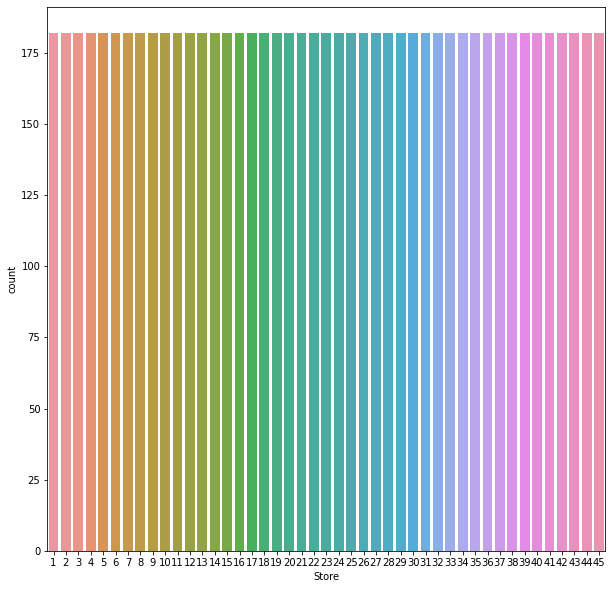

In [9]:
plt.figure(figsize= (10, 10))
sns.countplot(FTD['Store'])

## 시각화를 진행해서 보면 점포를 보면 총 45개의 점포로 이루어져있으며, 점포별로 2010년 2월부터 2013년 7월까지 동일하게 182개의 데이터가 있다는 것을 파악할 수 있음.

In [10]:
FTD[0:182].isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1        92
MarkDown2       109
MarkDown3        93
MarkDown4        92
MarkDown5        92
CPI              13
Unemployment     13
IsHoliday         0
dtype: int64

In [11]:
FTD['Temperature'] = round((FTD['Temperature']-32)*5/9,2)
##화씨를 섭씨로 변경하였음.

In [12]:
FTD[182-14 : 182]

Store        Date  Temperature  ...        CPI  Unemployment  IsHoliday
168      1  26/04/2013        15.13  ...  225.17016         6.314      False
169      1  03/05/2013        19.26  ...        NaN           NaN      False
170      1  10/05/2013        17.72  ...        NaN           NaN      False
171      1  17/05/2013        20.85  ...        NaN           NaN      False
172      1  24/05/2013        25.11  ...        NaN           NaN      False
173      1  31/05/2013        25.57  ...        NaN           NaN      False
174      1  07/06/2013        24.69  ...        NaN           NaN      False
175      1  14/06/2013        26.59  ...        NaN           NaN      False
176      1  21/06/2013        27.42  ...        NaN           NaN      False
177      1  28/06/2013        28.86  ...        NaN           NaN      False
178      1  05/07/2013        26.58  ...        NaN           NaN      False
179      1  12/07/2013        28.40  ...        NaN           NaN      False
180      1  19/07/2013        26.26  ...        NaN           NaN      False
181      1  26/07/2013        27.52  ...        NaN           NaN      False

[14 rows x 12 columns]

In [13]:
FTD[(182*2-14) : 182*2]

Store        Date  Temperature  ...         CPI  Unemployment  IsHoliday
350      2  26/04/2013        14.52  ...  224.802531         6.112      False
351      2  03/05/2013        18.48  ...         NaN           NaN      False
352      2  10/05/2013        17.51  ...         NaN           NaN      False
353      2  17/05/2013        21.42  ...         NaN           NaN      False
354      2  24/05/2013        24.91  ...         NaN           NaN      False
355      2  31/05/2013        25.58  ...         NaN           NaN      False
356      2  07/06/2013        24.56  ...         NaN           NaN      False
357      2  14/06/2013        27.17  ...         NaN           NaN      False
358      2  21/06/2013        27.28  ...         NaN           NaN      False
359      2  28/06/2013        29.65  ...         NaN           NaN      False
360      2  05/07/2013        26.38  ...         NaN           NaN      False
361      2  12/07/2013        29.67  ...         NaN           NaN      False
362      2  19/07/2013        26.20  ...         NaN           NaN      False
363      2  26/07/2013        28.43  ...         NaN           NaN      False

[14 rows x 12 columns]

In [14]:
13*45 #13개의 결측치와 45개의 점포

585

## 데이터를 확인해보면 2013년 5월부터 2013년 7월까지 소비자 물가 지수와 실업률의 결측치가 동일하게 없는 것을 볼 수 있음. 결측치를 처리할 수 있는지 이전 데이터를 시각화하여 확인해보겠음.

In [15]:
FTD[['Date', 'CPI']][0:182-13]

Date         CPI
0    05/02/2010  211.096358
1    12/02/2010  211.242170
2    19/02/2010  211.289143
3    26/02/2010  211.319643
4    05/03/2010  211.350143
..          ...         ...
164  29/03/2013  225.002920
165  05/04/2013  225.086540
166  12/04/2013  225.170160
167  19/04/2013  225.170160
168  26/04/2013  225.170160

[169 rows x 2 columns]

In [16]:
FTD[(182*4)-182:(182*4)-13]

Store        Date  Temperature  ...         CPI  Unemployment  IsHoliday
546      4  05/02/2010         6.53  ...  126.442065         8.623      False
547      4  12/02/2010        -1.76  ...  126.496258         8.623       True
548      4  19/02/2010         2.47  ...  126.526286         8.623      False
549      4  26/02/2010         5.20  ...  126.552286         8.623      False
550      4  05/03/2010         6.38  ...  126.578286         8.623      False
..     ...         ...          ...  ...         ...           ...        ...
710      4  29/03/2013        10.20  ...  132.591452         3.921      False
711      4  05/04/2013        14.28  ...  132.653774         3.896      False
712      4  12/04/2013        15.59  ...  132.716097         3.896      False
713      4  19/04/2013        17.38  ...  132.716097         3.896      False
714      4  26/04/2013        14.53  ...  132.716097         3.896      False

[169 rows x 12 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

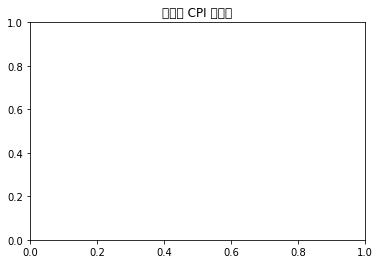

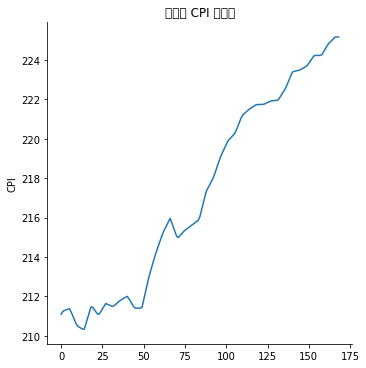

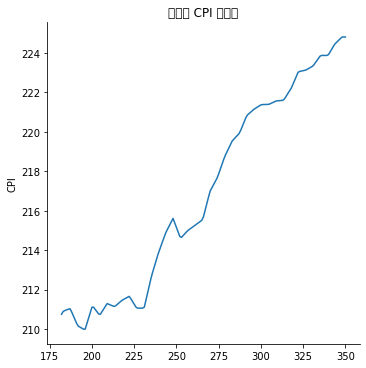

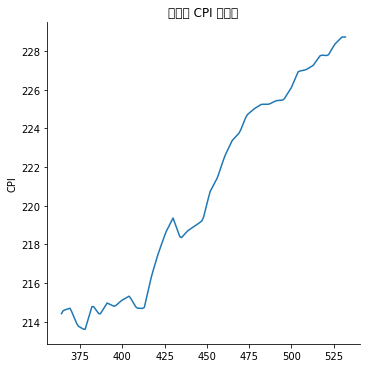

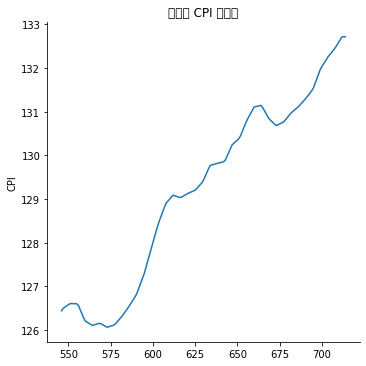

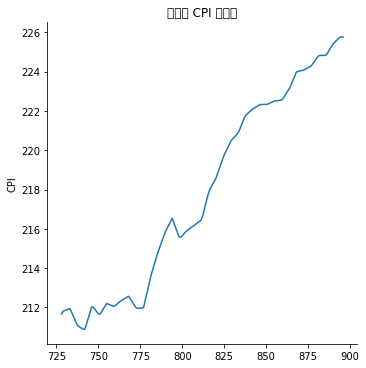

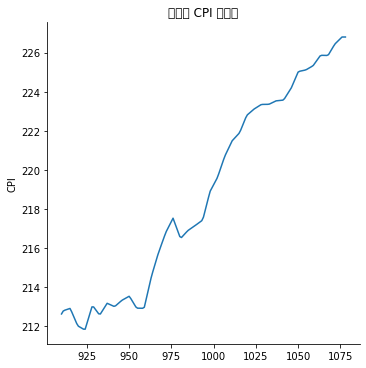

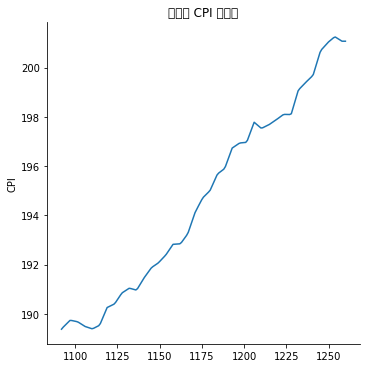

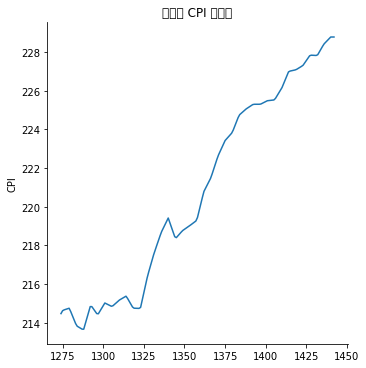

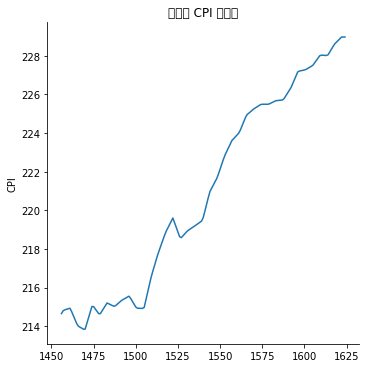

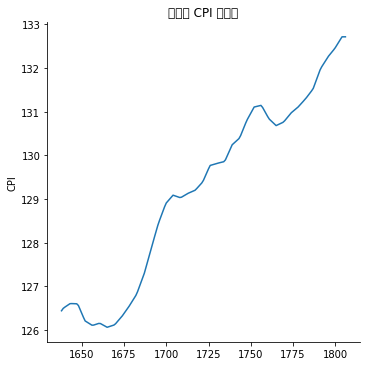

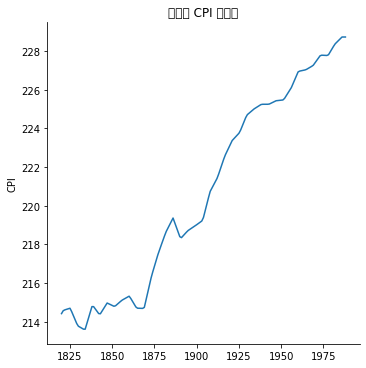

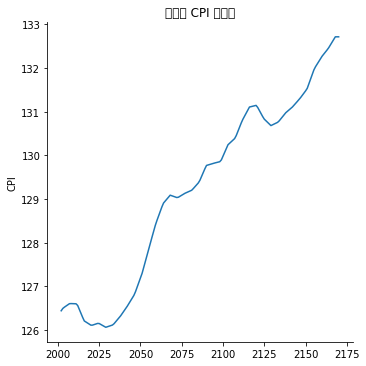

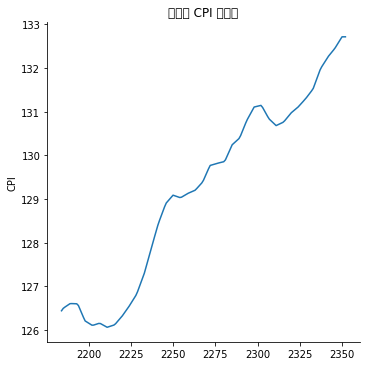

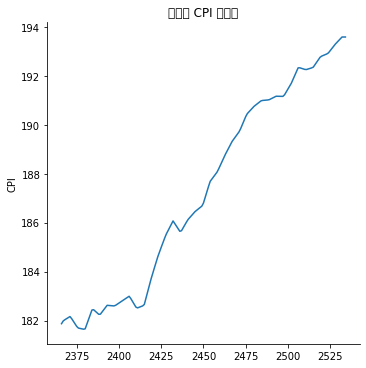

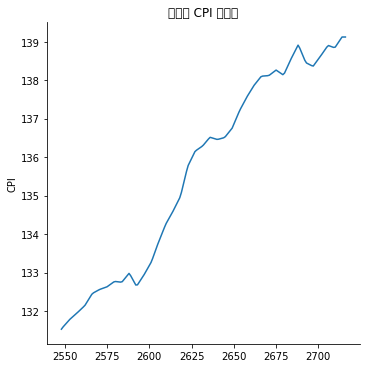

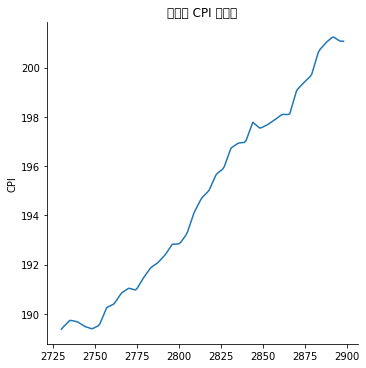

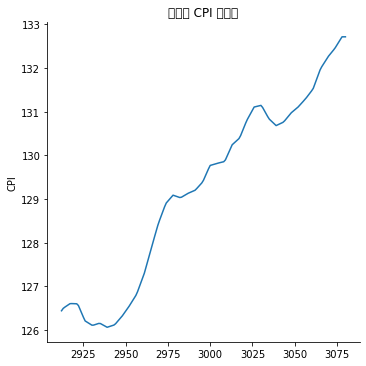

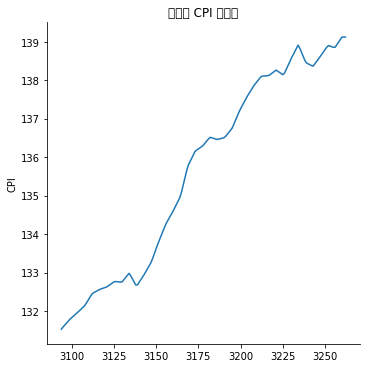

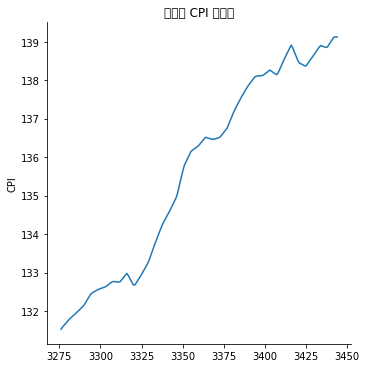

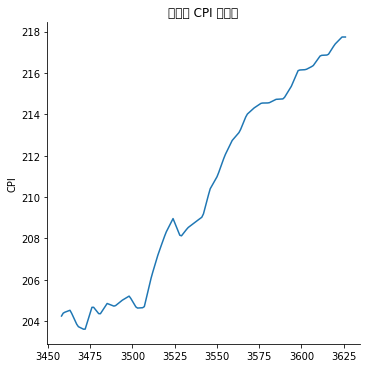

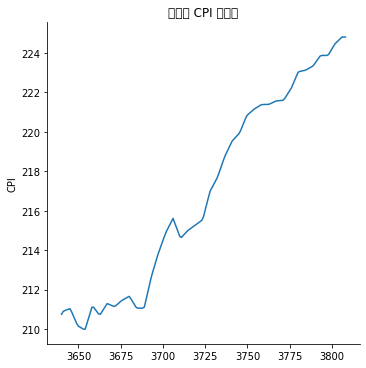

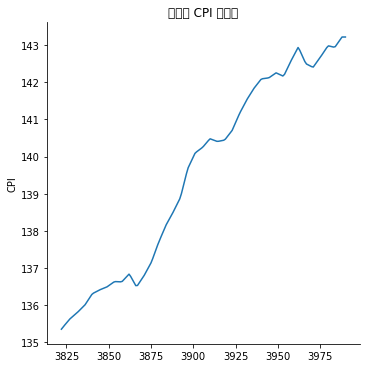

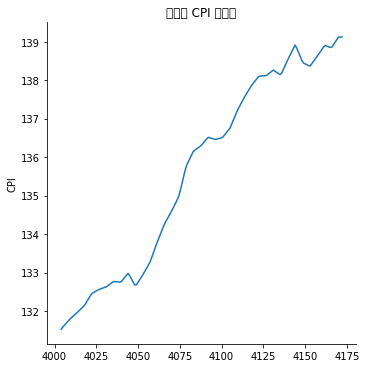

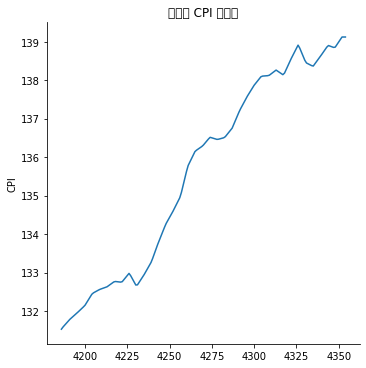

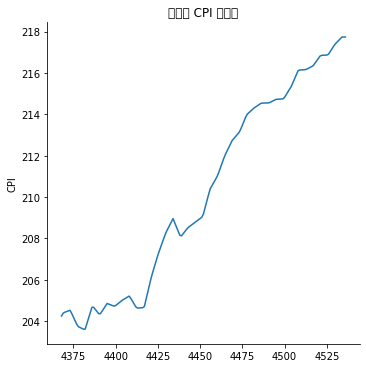

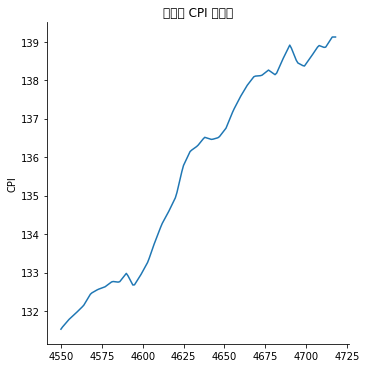

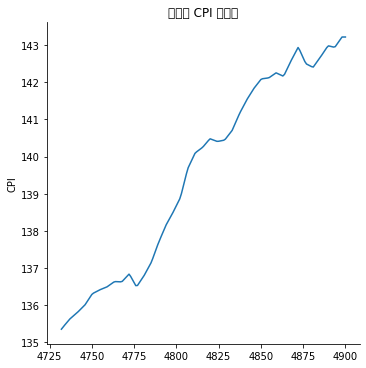

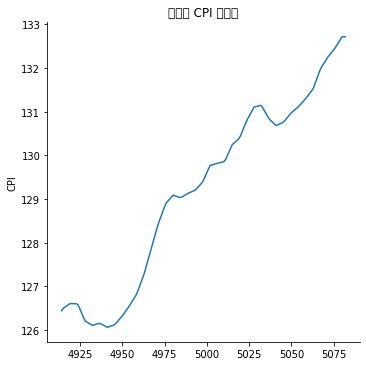

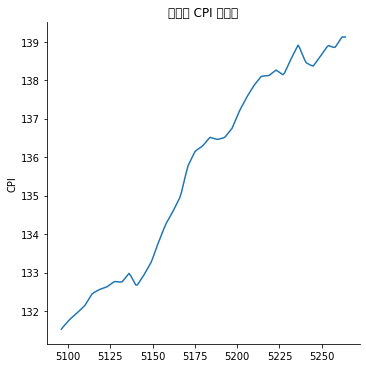

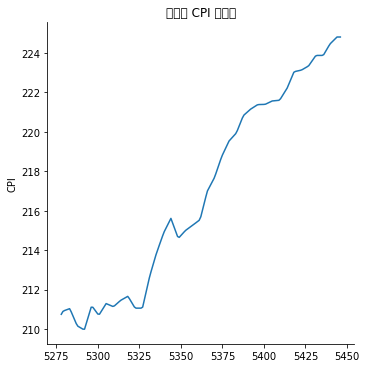

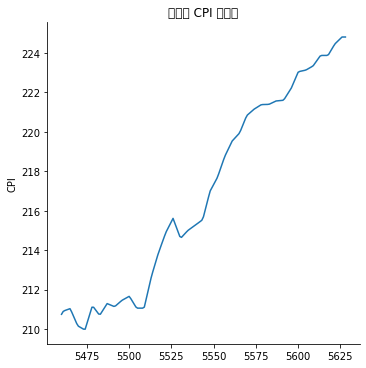

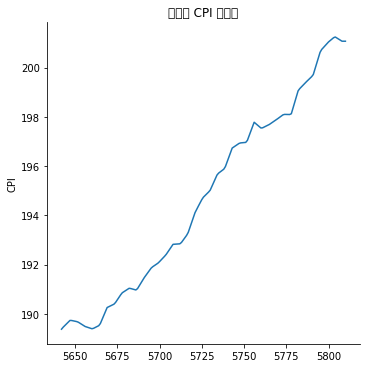

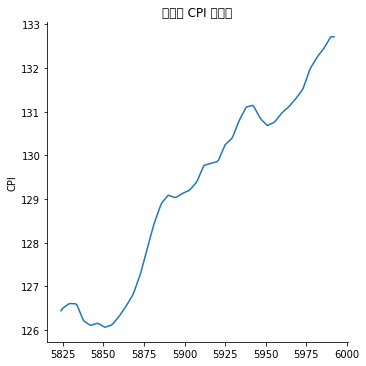

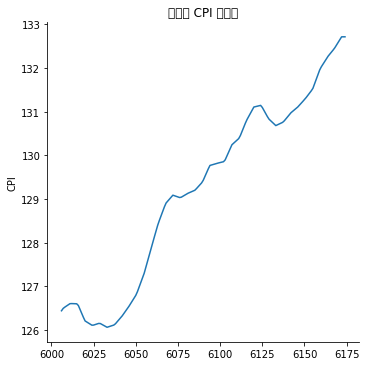

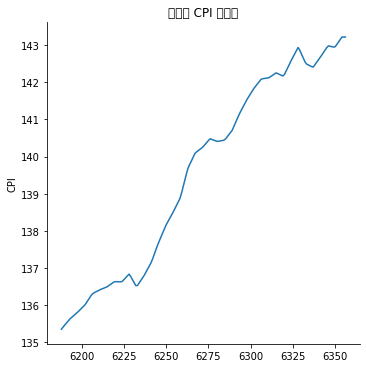

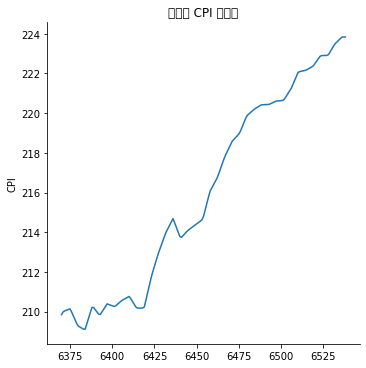

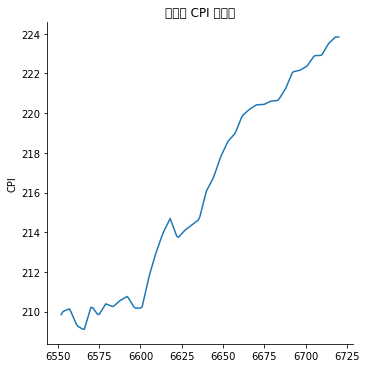

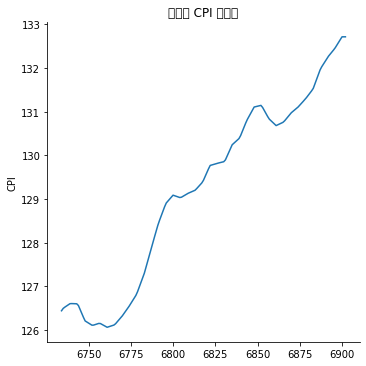

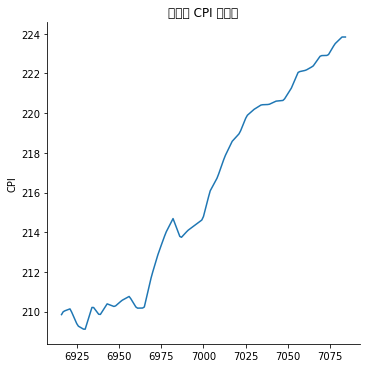

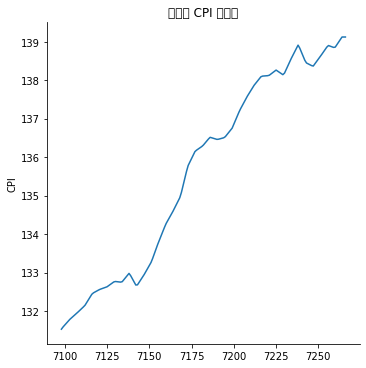

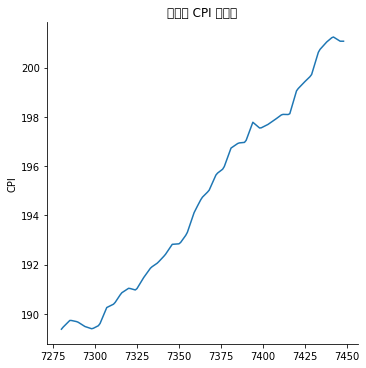

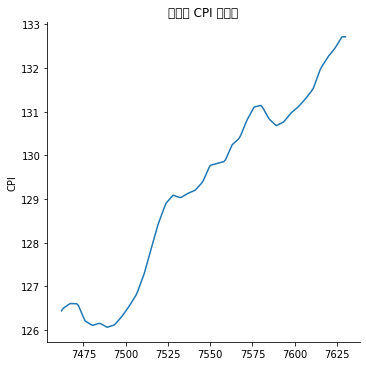

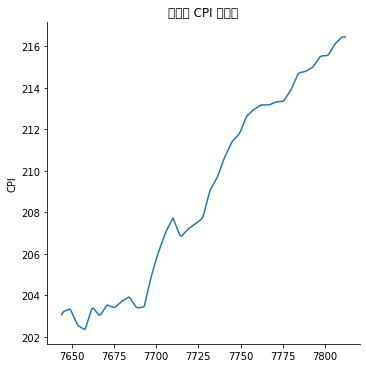

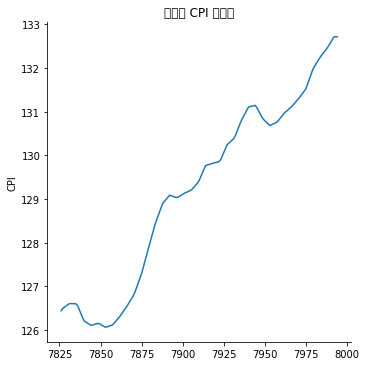

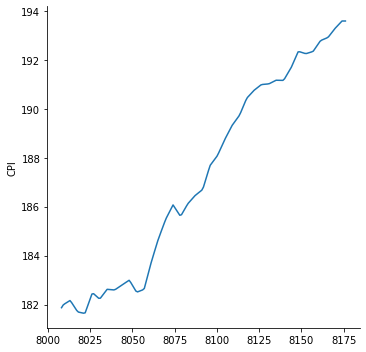

In [17]:
for i in np.arange(1,46):
    plt.title('점포별 CPI 그래프')
    sns.relplot(x = FTD.index[(182*i)-182:(182*i)-13], y = 'CPI', data = FTD[['CPI']][(182*i)-182:(182*i)-13], kind = 'line')

## 그래프를 확인해보면 점포별로 CPI가 다르긴 하지만, 공통적인 것은 전부 우상향을 하고 있다는 것을 파악할 수 있음.

## 최근 2010년부터 2013년 5월 이전까지 미국의 경제 상황이 좋은 것으로 확인할 수 있음.

## 그리고 점포별로 소비자 물가 지수가 다른 걸로 보아, 지역마다 CPI가 다른 것을 확인할 수 있음.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

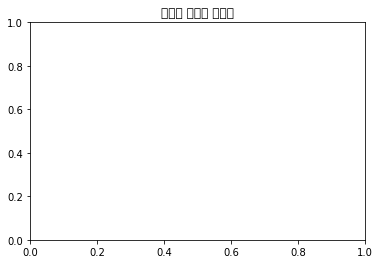

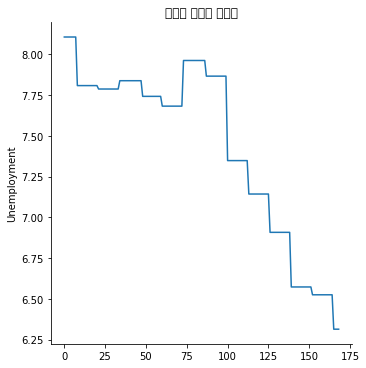

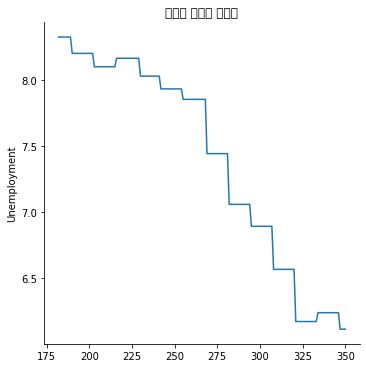

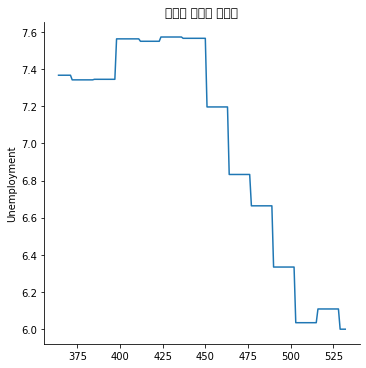

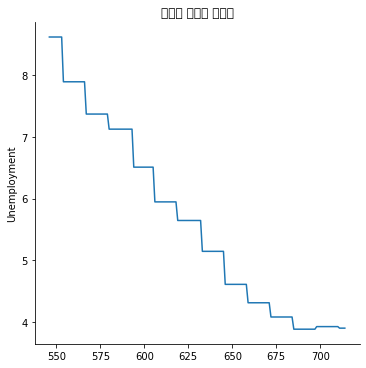

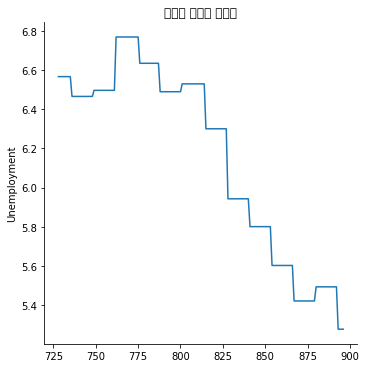

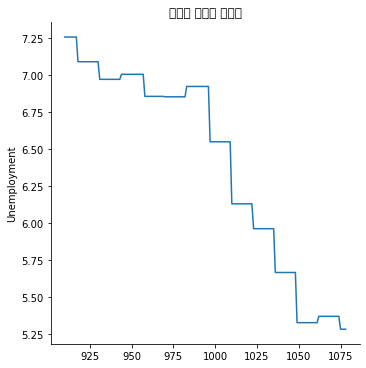

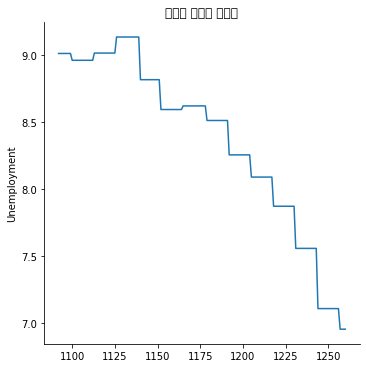

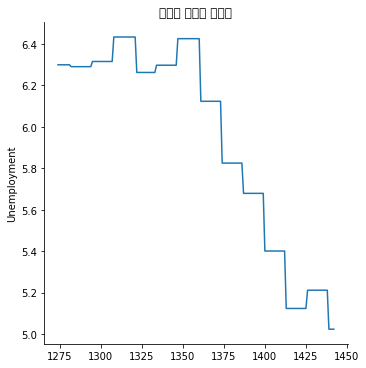

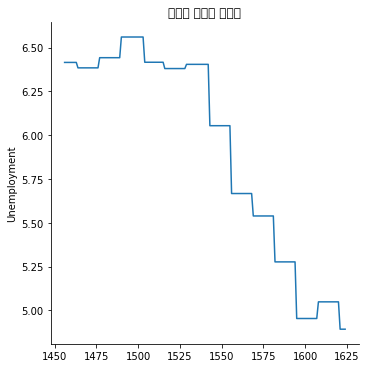

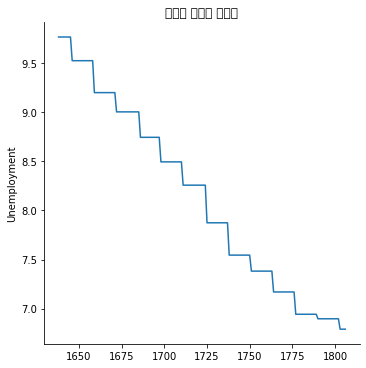

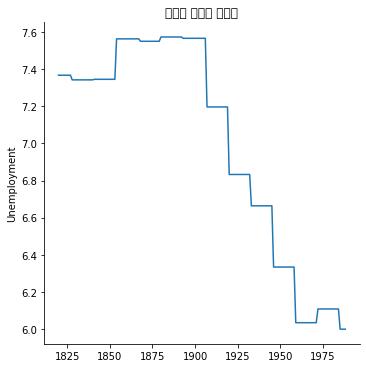

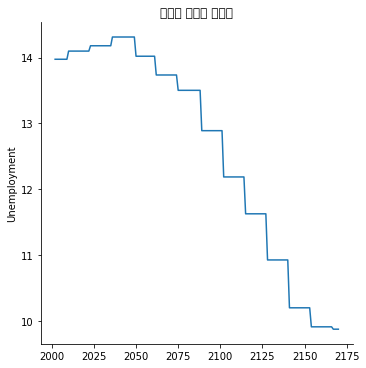

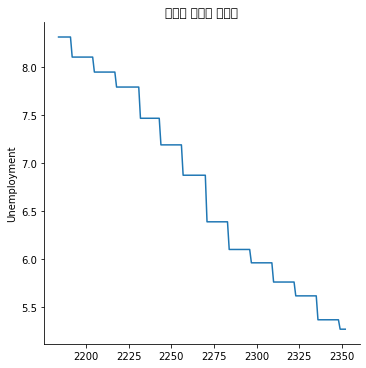

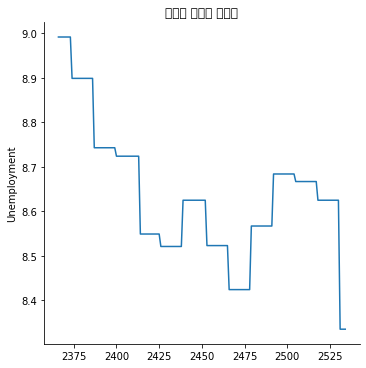

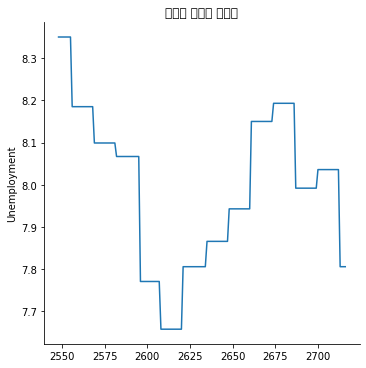

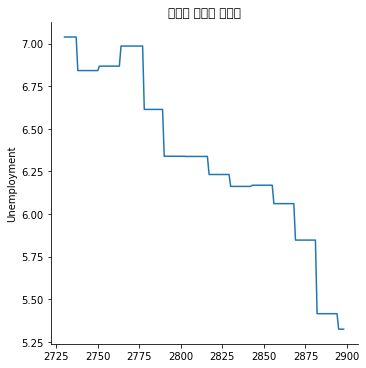

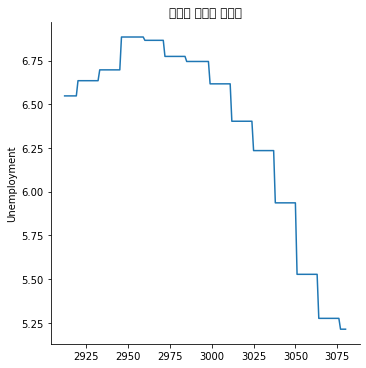

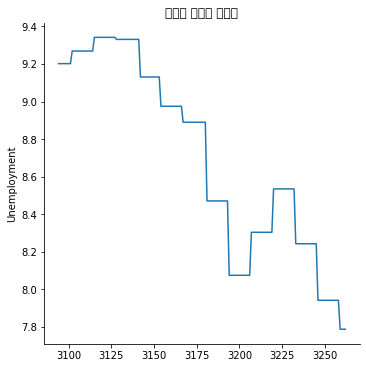

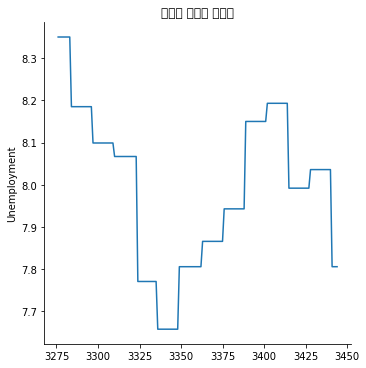

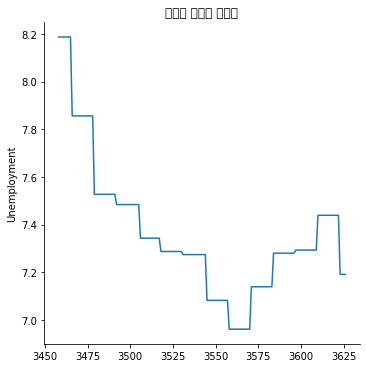

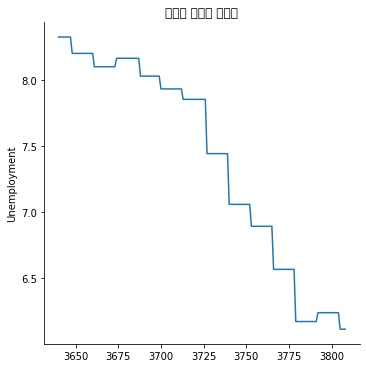

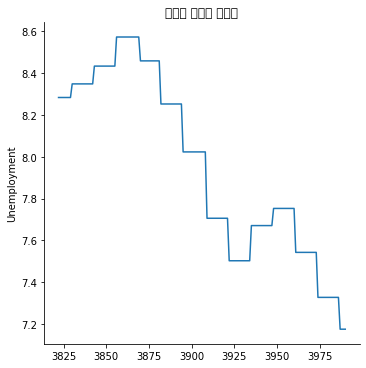

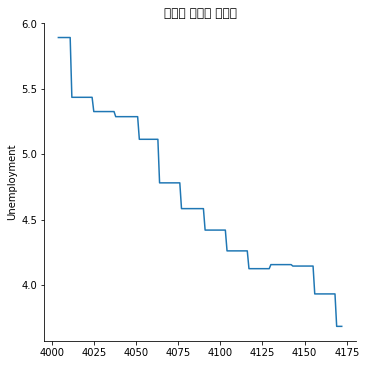

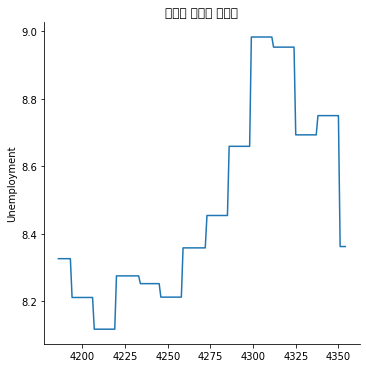

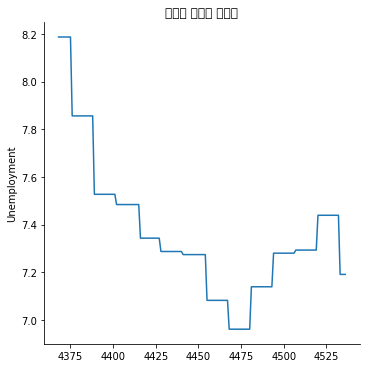

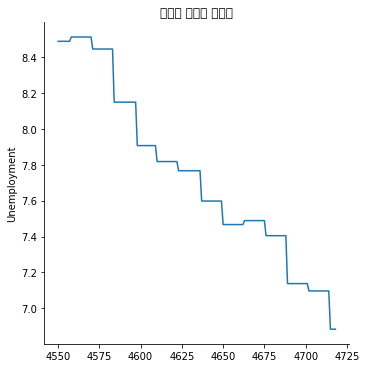

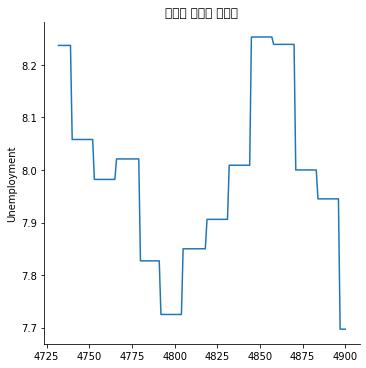

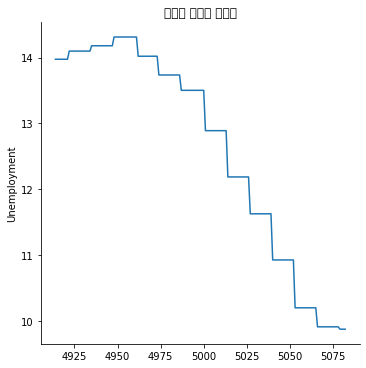

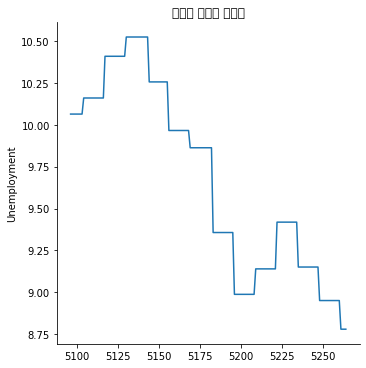

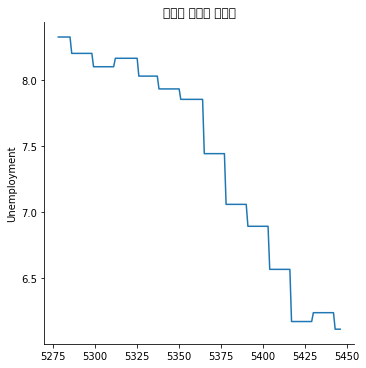

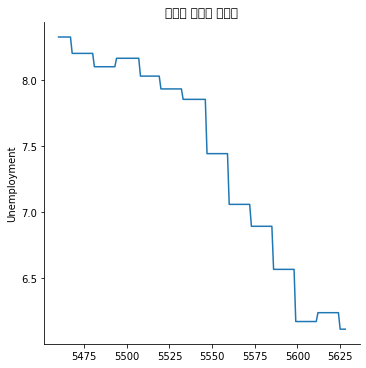

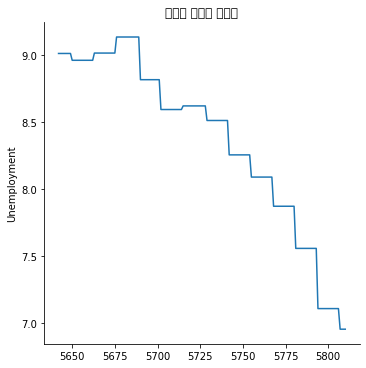

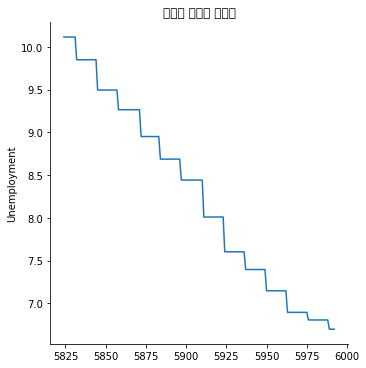

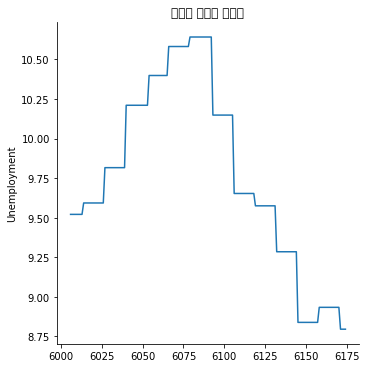

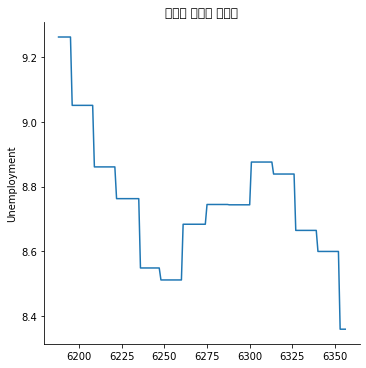

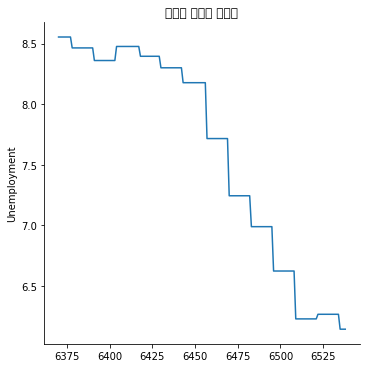

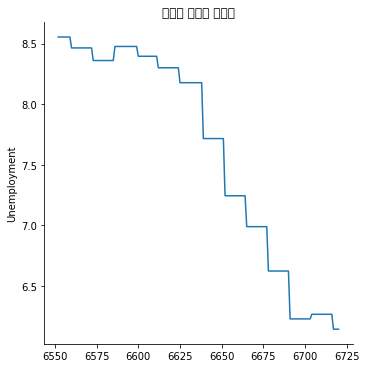

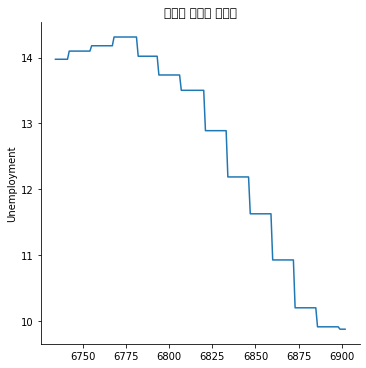

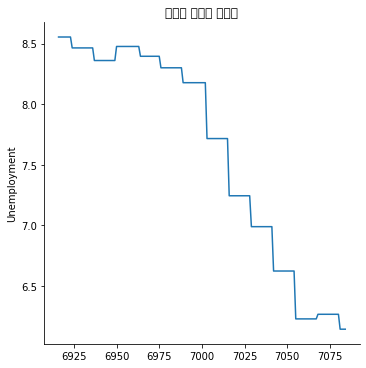

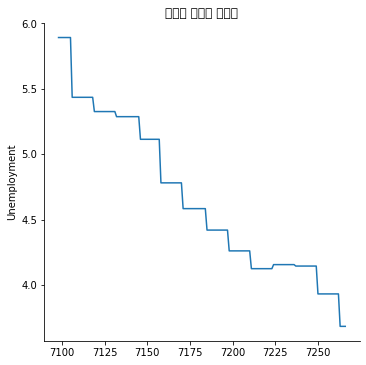

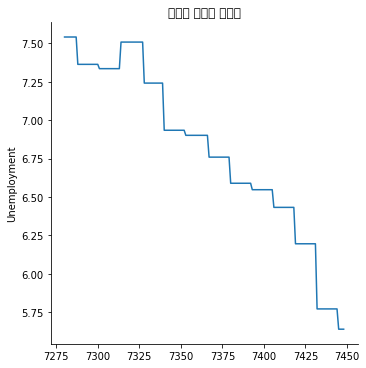

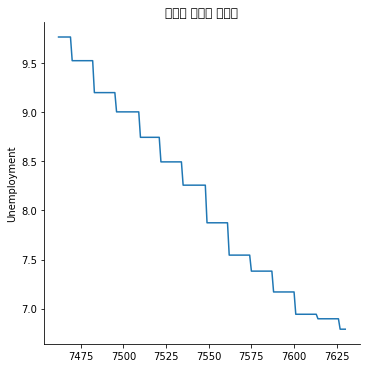

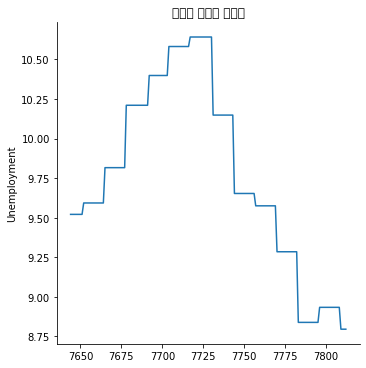

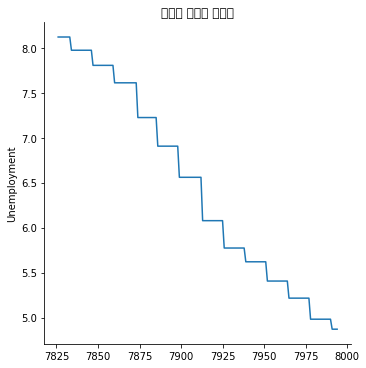

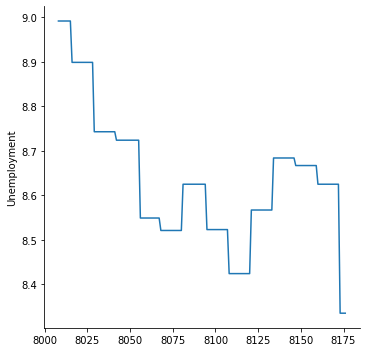

In [18]:
for i in np.arange(1,46):
    plt.title('점포별 실업률 그래프')
    sns.relplot(x = FTD.index[(182*i)-182:(182*i)-13], y = 'Unemployment', data = FTD[['Unemployment']][(182*i)-182:(182*i)-13], kind = 'line')

In [19]:
FTD[160:182]

Store        Date  Temperature  ...         CPI  Unemployment  IsHoliday
160      1  01/03/2013         8.89  ...  224.564526         6.525      False
161      1  08/03/2013        10.45  ...  224.708763         6.525      False
162      1  15/03/2013        12.96  ...  224.835681         6.525      False
163      1  22/03/2013        17.46  ...  224.919300         6.525      False
164      1  29/03/2013        10.56  ...  225.002920         6.525      False
165      1  05/04/2013        14.77  ...  225.086540         6.314      False
166      1  12/04/2013        17.07  ...  225.170160         6.314      False
167      1  19/04/2013        19.50  ...  225.170160         6.314      False
168      1  26/04/2013        15.13  ...  225.170160         6.314      False
169      1  03/05/2013        19.26  ...         NaN           NaN      False
170      1  10/05/2013        17.72  ...         NaN           NaN      False
171      1  17/05/2013        20.85  ...         NaN           NaN      False
172      1  24/05/2013        25.11  ...         NaN           NaN      False
173      1  31/05/2013        25.57  ...         NaN           NaN      False
174      1  07/06/2013        24.69  ...         NaN           NaN      False
175      1  14/06/2013        26.59  ...         NaN           NaN      False
176      1  21/06/2013        27.42  ...         NaN           NaN      False
177      1  28/06/2013        28.86  ...         NaN           NaN      False
178      1  05/07/2013        26.58  ...         NaN           NaN      False
179      1  12/07/2013        28.40  ...         NaN           NaN      False
180      1  19/07/2013        26.26  ...         NaN           NaN      False
181      1  26/07/2013        27.52  ...         NaN           NaN      False

[22 rows x 12 columns]

##실업률 그래프를 확인해보면 계단식의 일직선으로 이어지는 구간들이 있음,
##이를 확인해보면, 분기별로 실업률이 달라지는 것을 파악할 수 있음.
##그러므로, 결측치 처리를 동일한 분기는 같은 값으로 처리하고, 남는 한달(2013년 7월)도 이전 분기랑 동일하게 처리해주겠음.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

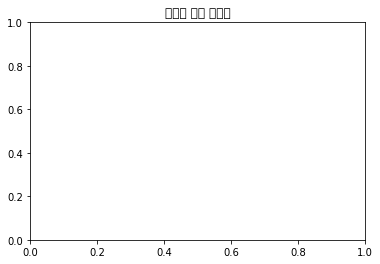

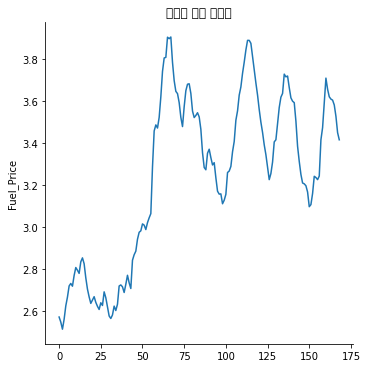

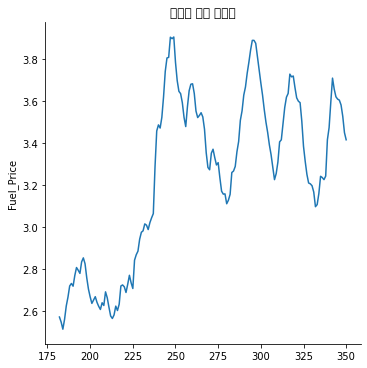

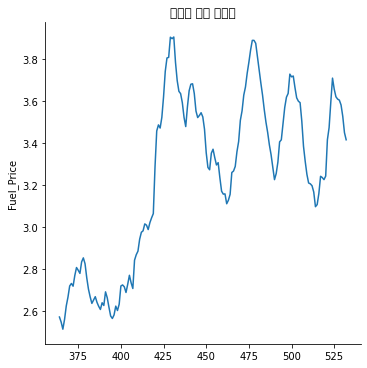

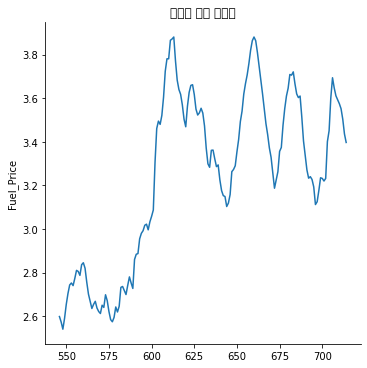

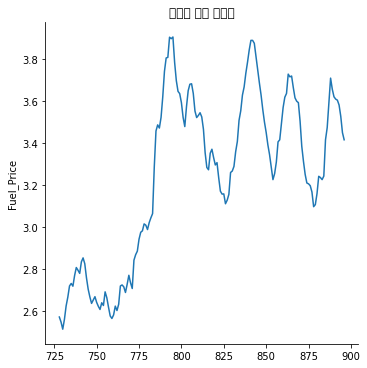

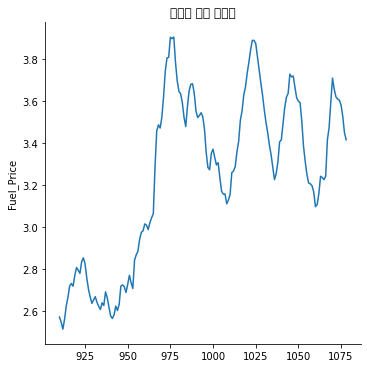

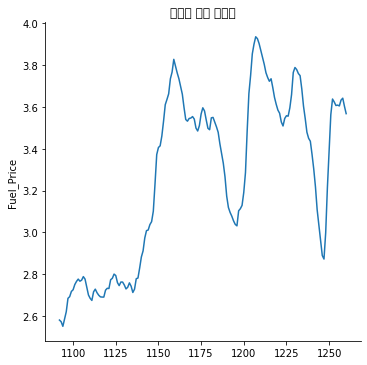

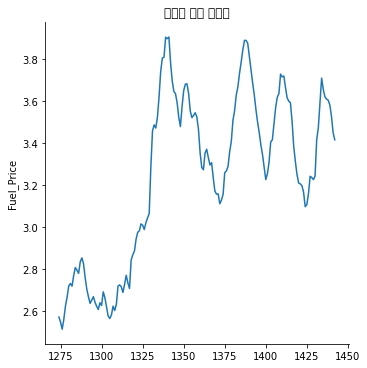

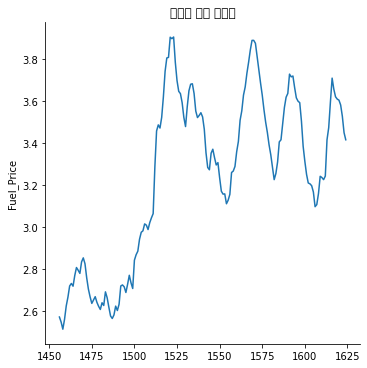

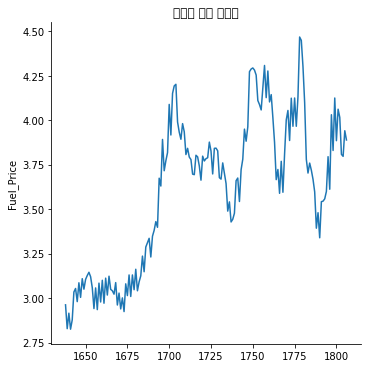

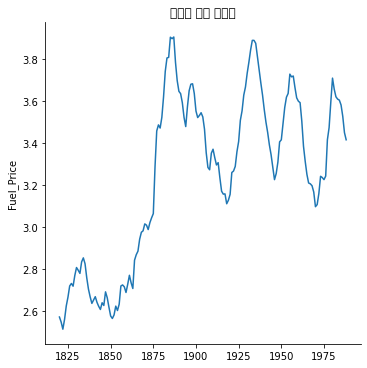

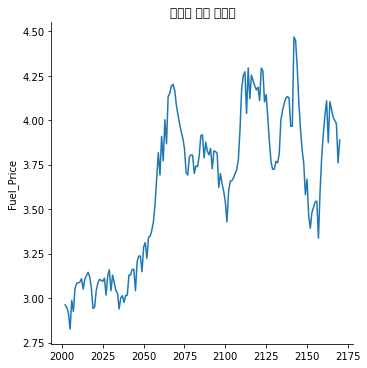

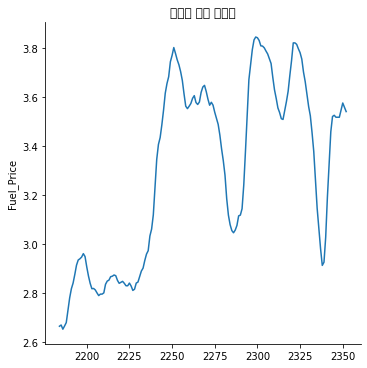

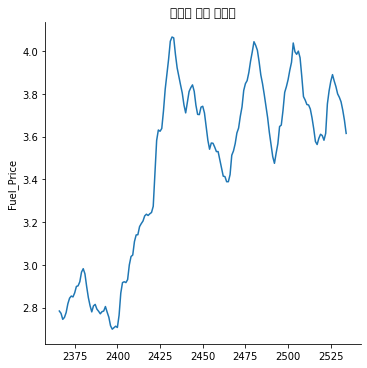

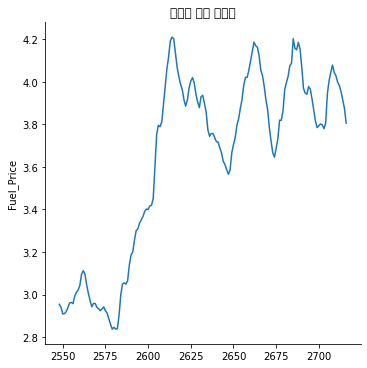

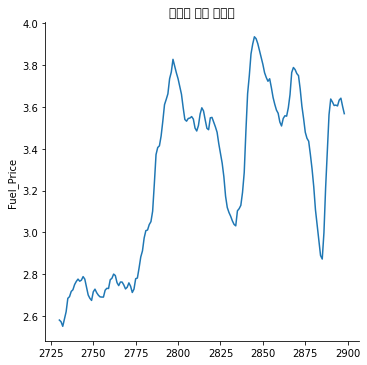

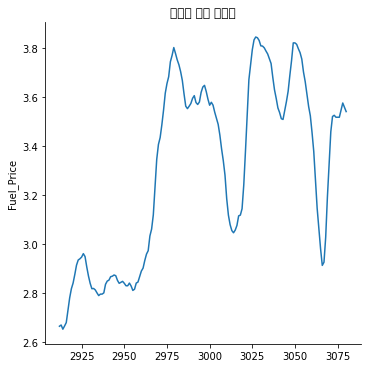

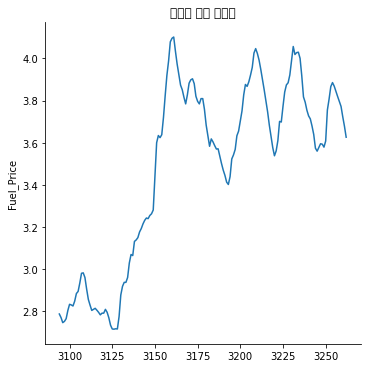

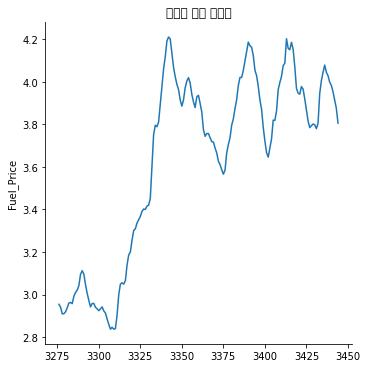

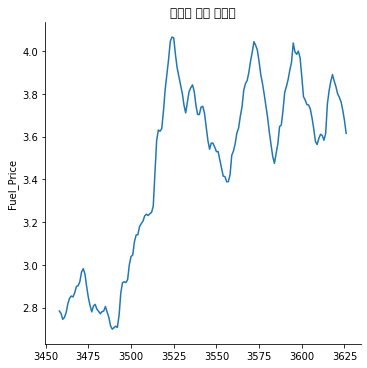

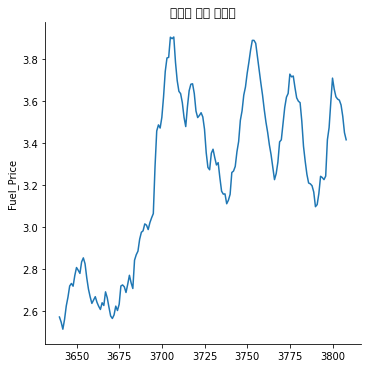

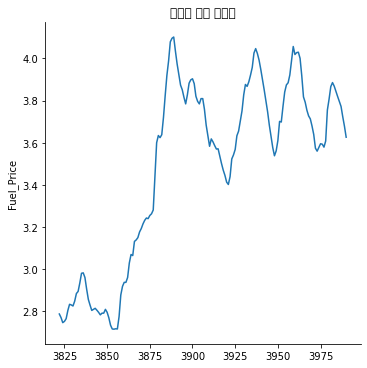

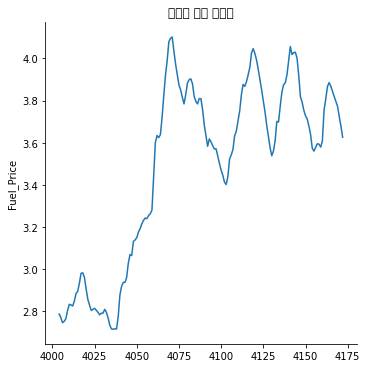

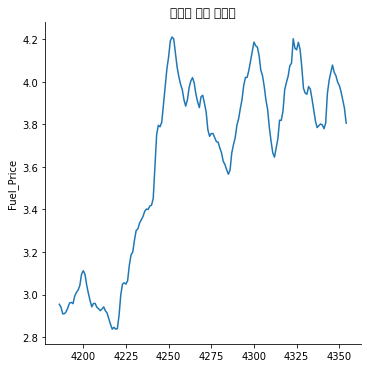

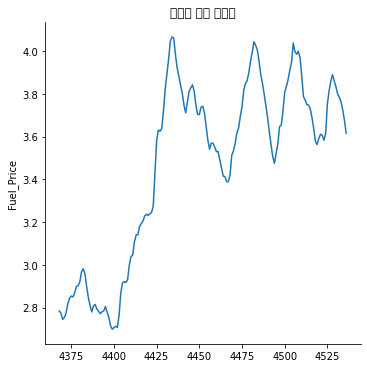

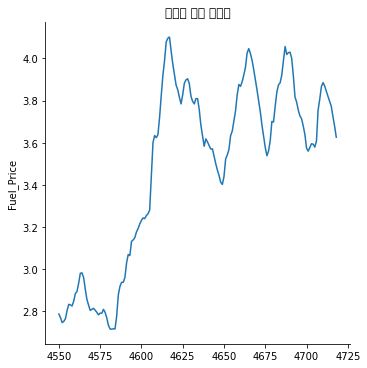

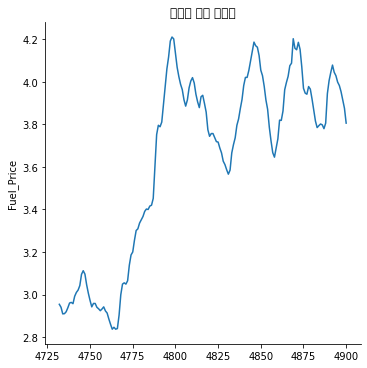

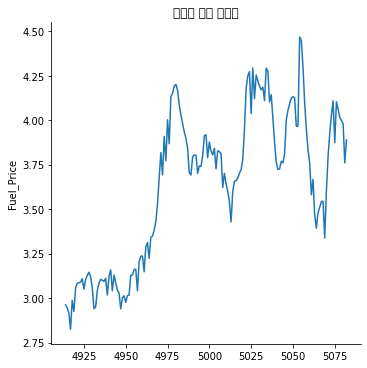

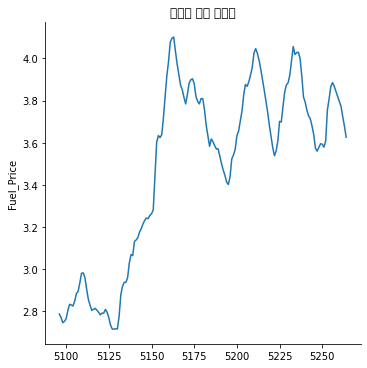

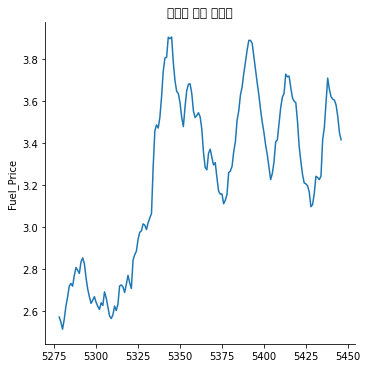

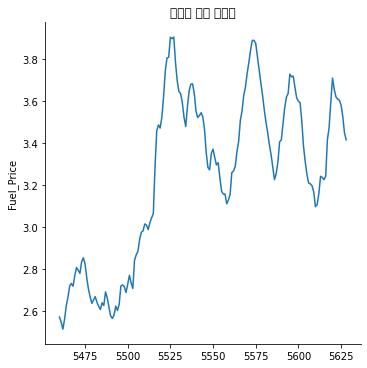

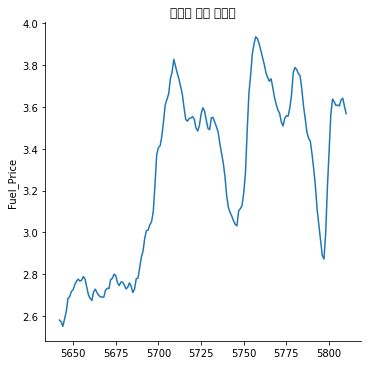

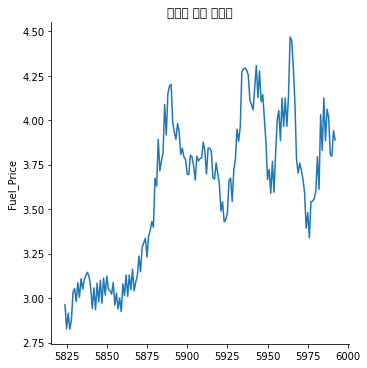

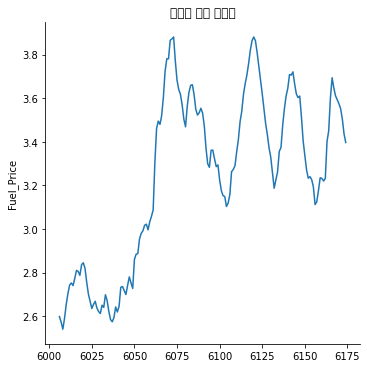

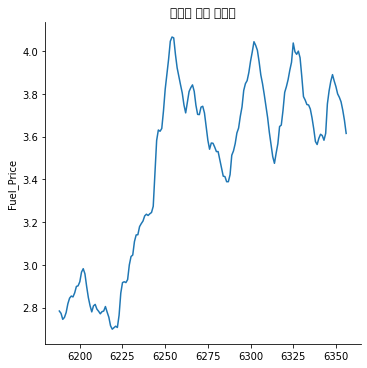

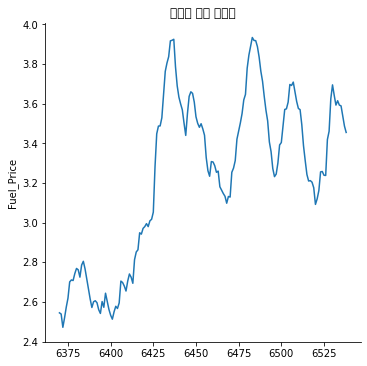

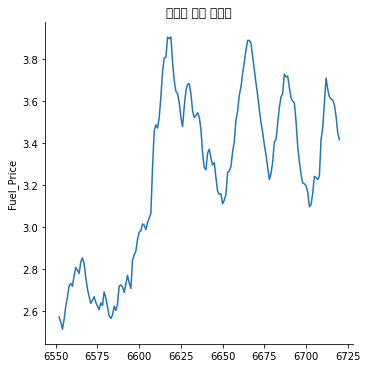

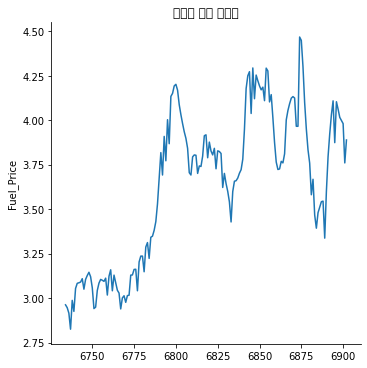

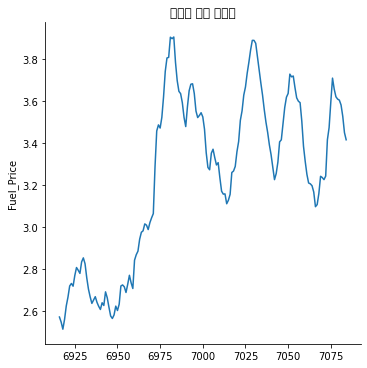

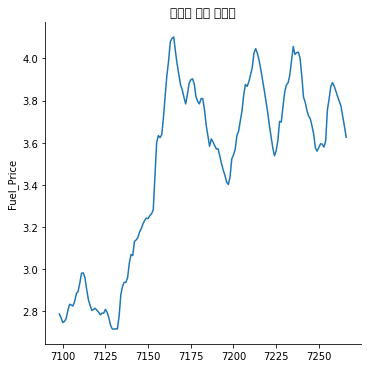

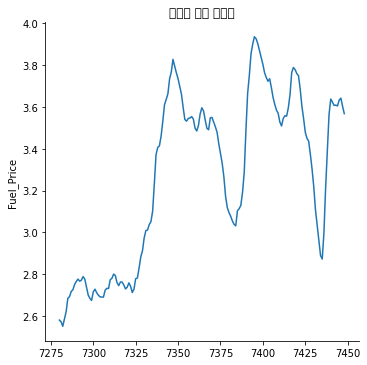

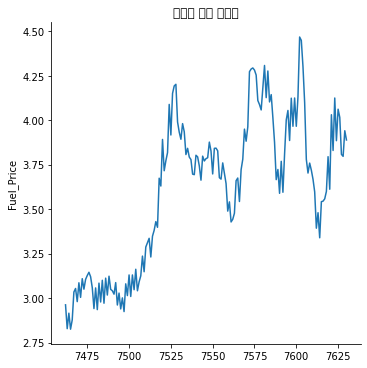

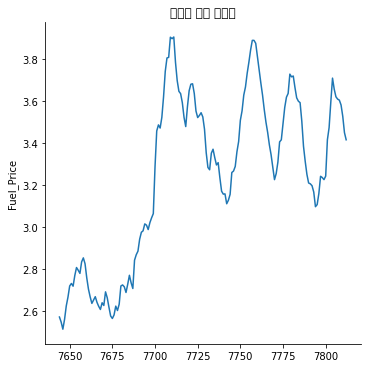

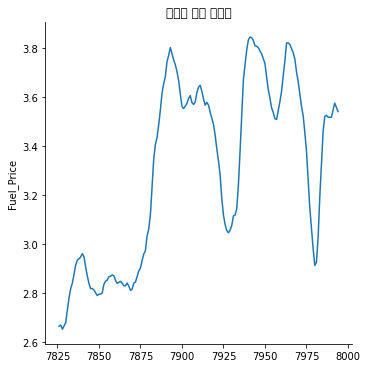

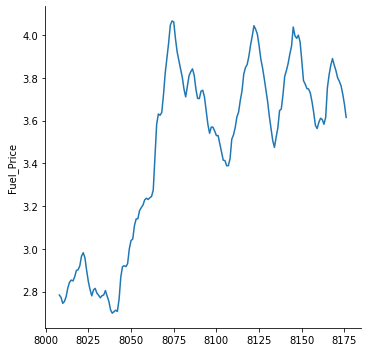

In [20]:
for i in np.arange(1,46):
    plt.title('점포별 유가 그래프')
    sns.relplot(x = FTD.index[(182*i)-182:(182*i)-13], y = 'Fuel_Price', data = FTD[['Fuel_Price']][(182*i)-182:(182*i)-13], kind = 'line')

##점포별 유가 변동을 비교해본 결과, 그래프 상에서 대체적으로 변동폭이 줄어드는 것을 볼 수 있음.
##하지만, 이것만으로 과연 유가가 안정됐다라고 판단하기엔 어려움이 있음

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

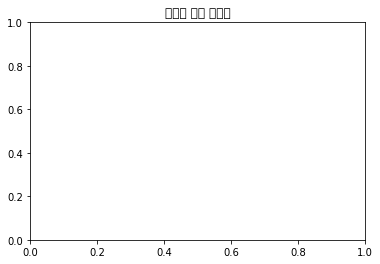

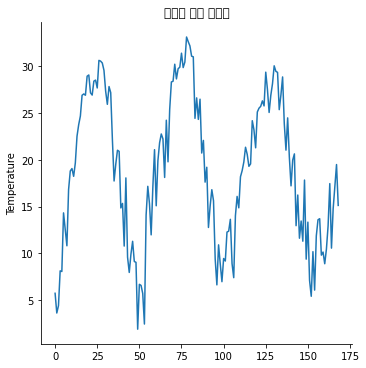

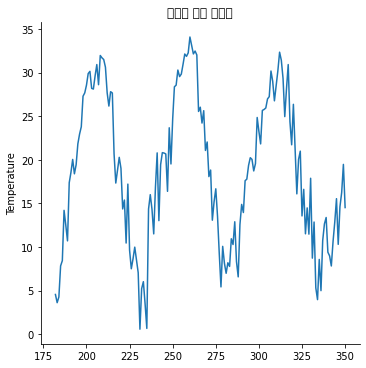

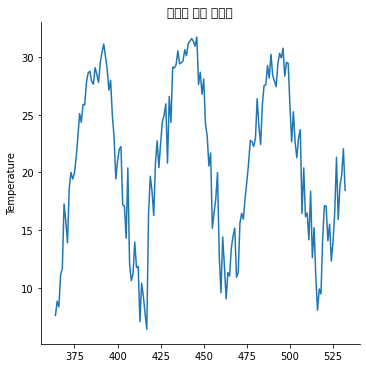

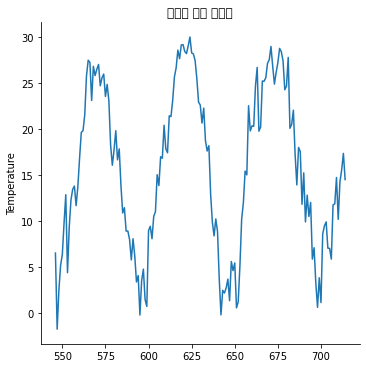

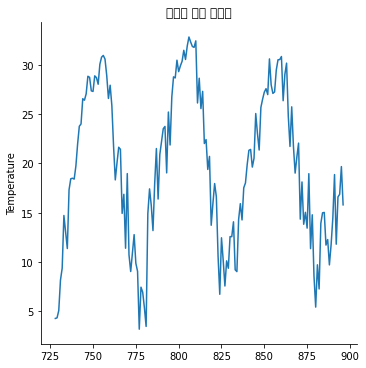

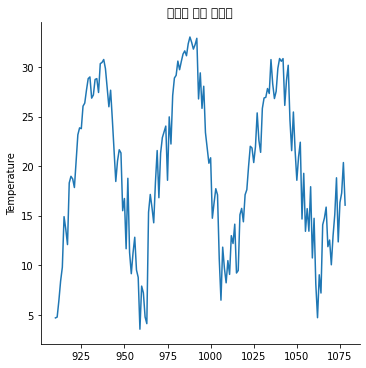

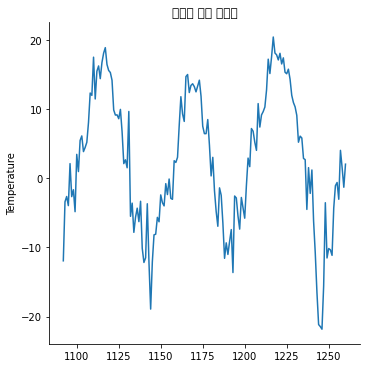

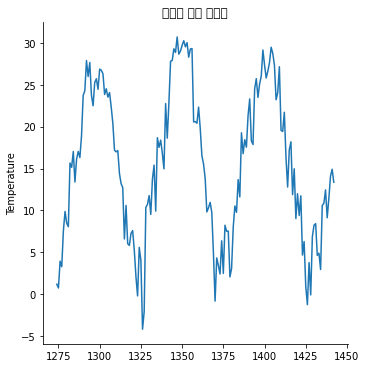

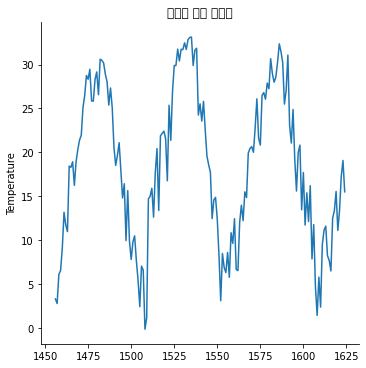

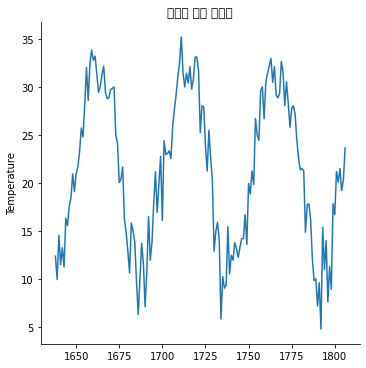

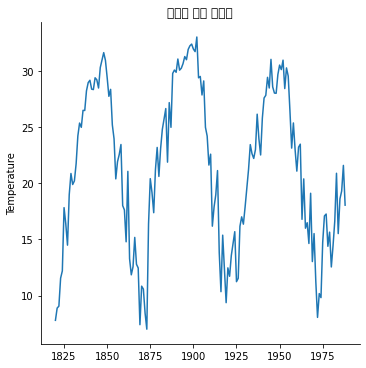

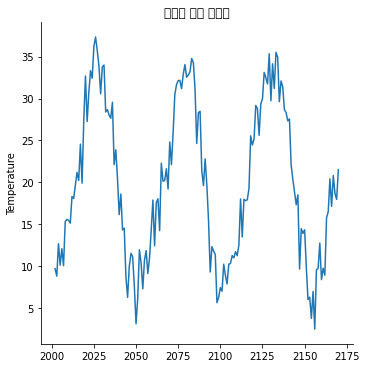

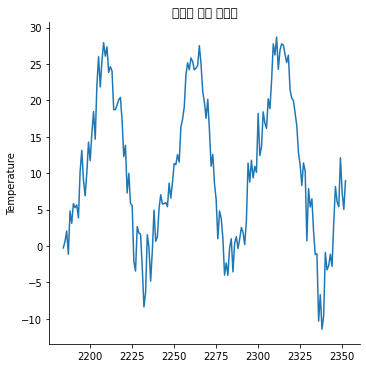

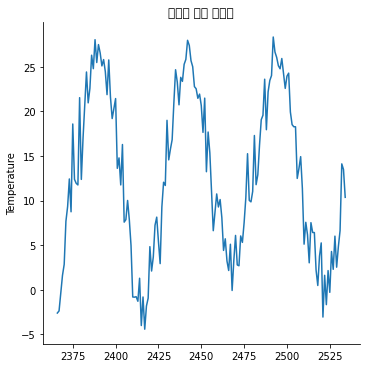

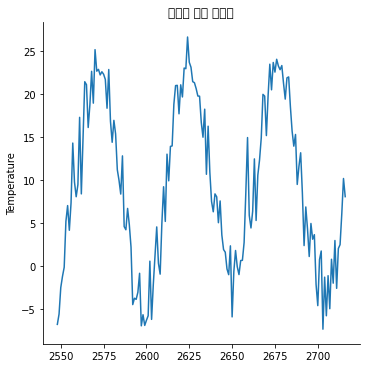

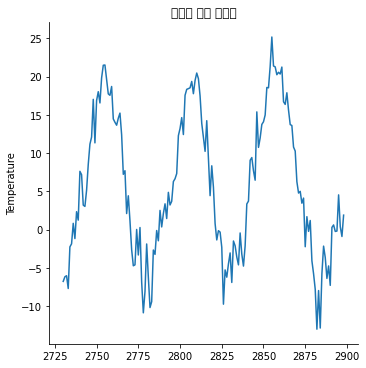

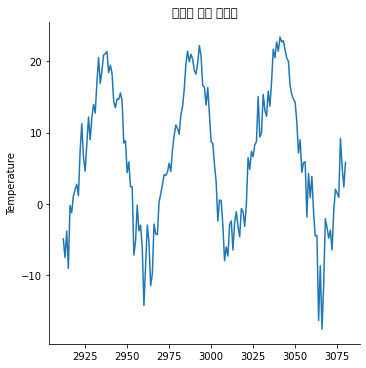

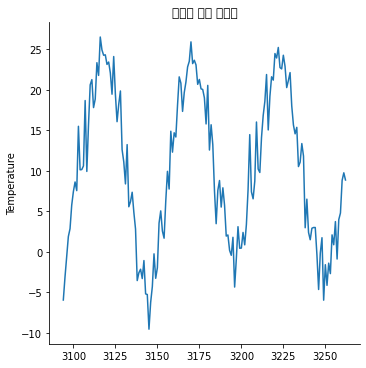

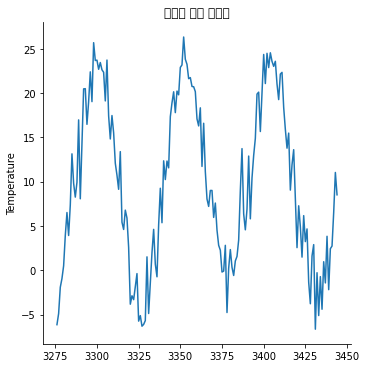

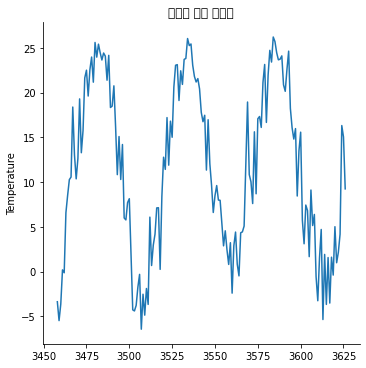

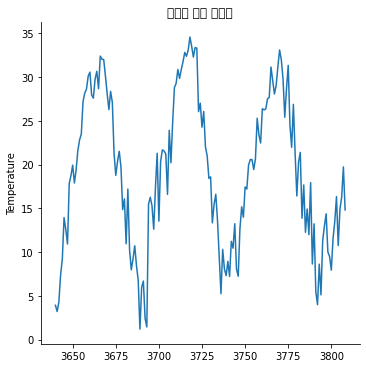

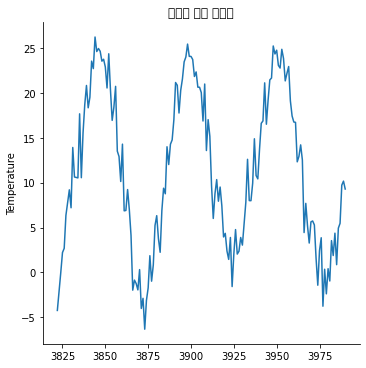

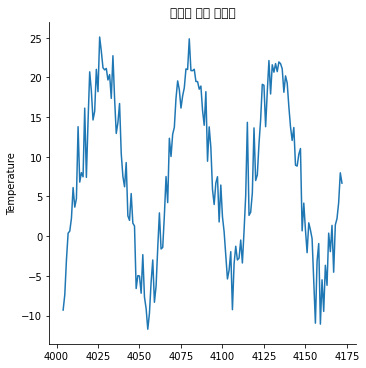

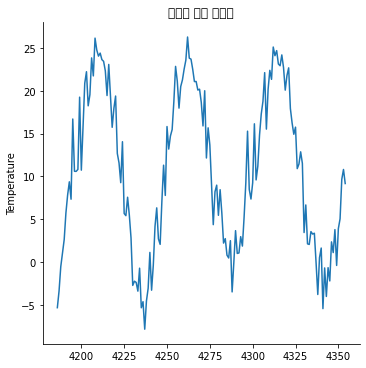

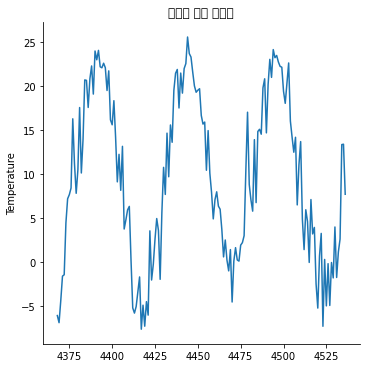

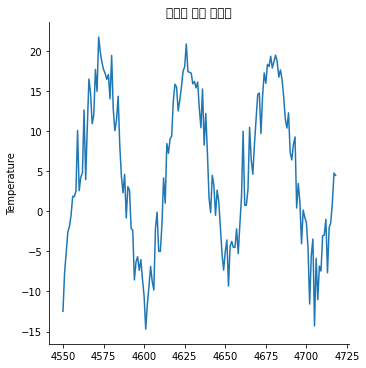

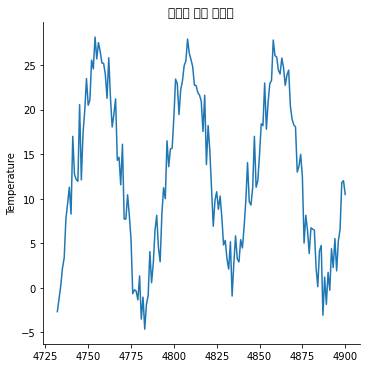

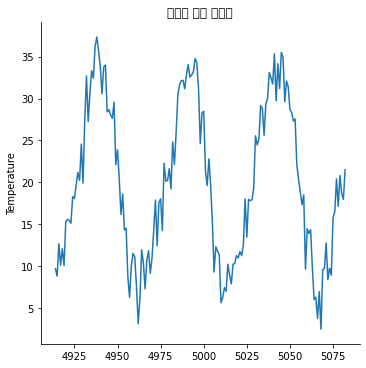

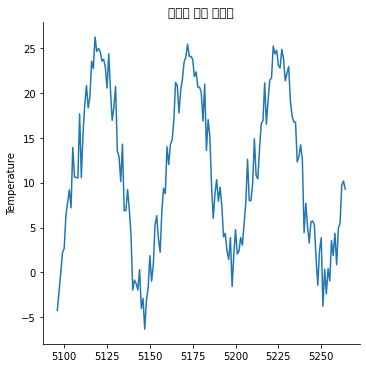

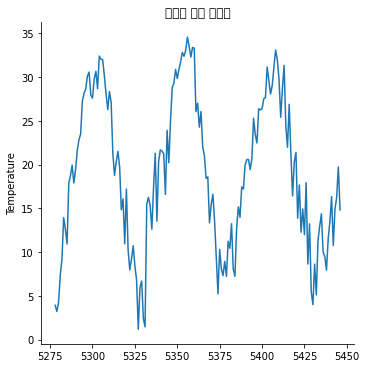

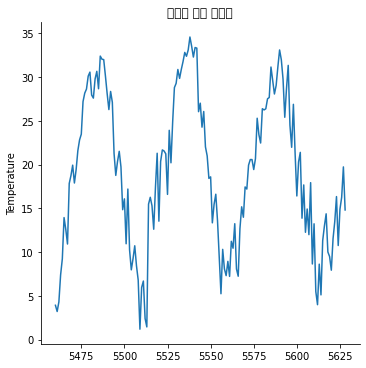

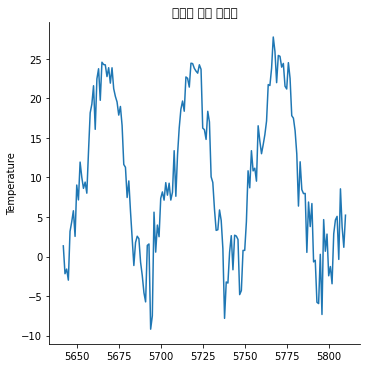

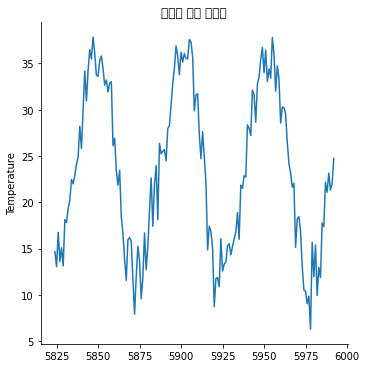

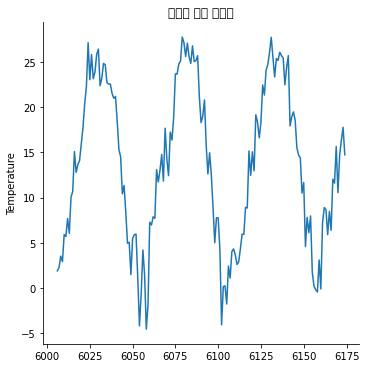

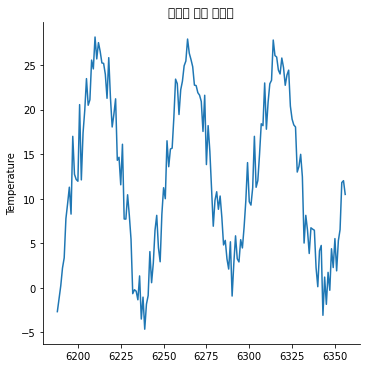

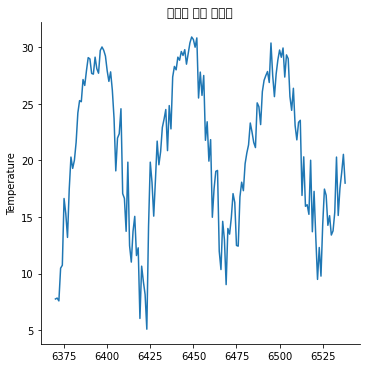

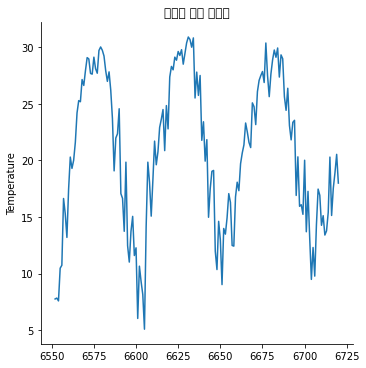

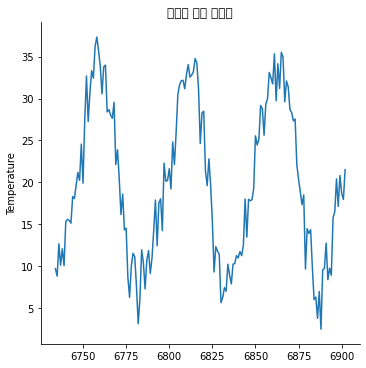

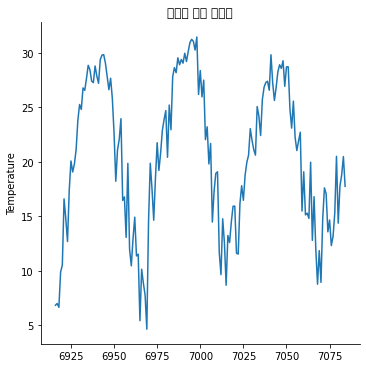

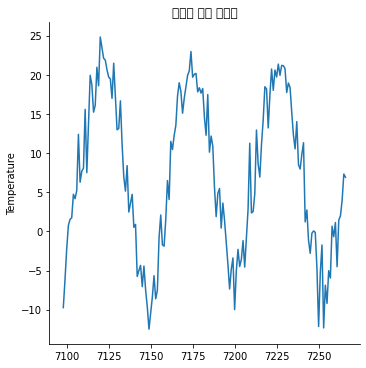

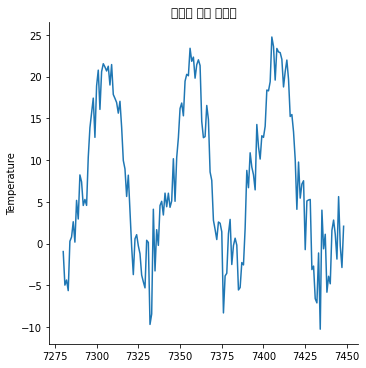

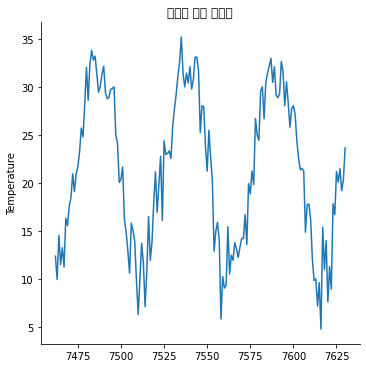

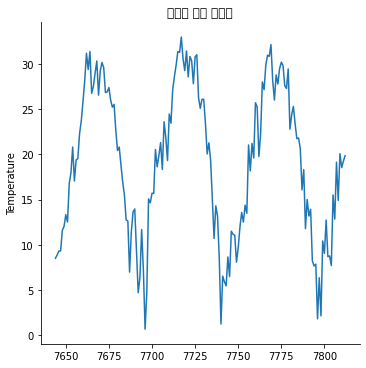

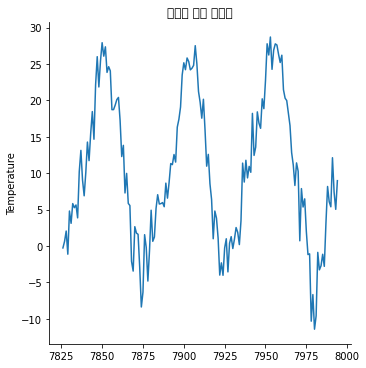

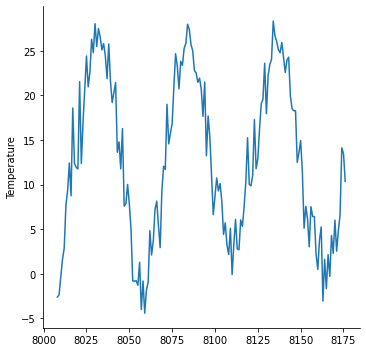

In [21]:
for i in np.arange(1,46):
    plt.title('점포별 기온 그래프')
    sns.relplot(x = FTD.index[(182*i)-182:(182*i)-13], y = 'Temperature', data = FTD[['Temperature']][(182*i)-182:(182*i)-13], kind = 'line')

##지역마다 기온의 특징은 다르지만, 몇몇 지역은 특정 여름에 더 덥고, 특정 겨울에 덜춥거나 더 추운 경우가 있음.
##기온 또한 매출에 영향이 있을 것이라 추측됨.

In [22]:
FTD['Diff'] = FTD['CPI'].diff().mean()

In [23]:
for i in np.arange(1, 45) :
    FTD['Diff'][(i*182)-182:182*i] = FTD['CPI'][(i*182)-182:182*i].diff().mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
FTD

Store        Date  Temperature  ...  Unemployment  IsHoliday      Diff
0         1  05/02/2010         5.73  ...         8.106      False  0.083773
1         1  12/02/2010         3.62  ...         8.106       True  0.083773
2         1  19/02/2010         4.41  ...         8.106      False  0.083773
3         1  26/02/2010         8.13  ...         8.106      False  0.083773
4         1  05/03/2010         8.06  ...         8.106      False  0.083773
...     ...         ...          ...  ...           ...        ...       ...
8185     45  28/06/2013        24.47  ...           NaN      False  0.061070
8186     45  05/07/2013        25.28  ...           NaN      False  0.061070
8187     45  12/07/2013        26.32  ...           NaN      False  0.061070
8188     45  19/07/2013        28.24  ...           NaN      False  0.061070
8189     45  26/07/2013        24.48  ...           NaN      False  0.061070

[8190 rows x 13 columns]

In [25]:
for i in np.arange(0,8190) :
    if FTD['CPI'].isnull()[i] == True :
        FTD['CPI'][i] = FTD['CPI'][i-1] + FTD['Diff'][i]
    else :
        quit



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
FTD

Store        Date  Temperature  ...  Unemployment  IsHoliday      Diff
0         1  05/02/2010         5.73  ...         8.106      False  0.083773
1         1  12/02/2010         3.62  ...         8.106       True  0.083773
2         1  19/02/2010         4.41  ...         8.106      False  0.083773
3         1  26/02/2010         8.13  ...         8.106      False  0.083773
4         1  05/03/2010         8.06  ...         8.106      False  0.083773
...     ...         ...          ...  ...           ...        ...       ...
8185     45  28/06/2013        24.47  ...           NaN      False  0.061070
8186     45  05/07/2013        25.28  ...           NaN      False  0.061070
8187     45  12/07/2013        26.32  ...           NaN      False  0.061070
8188     45  19/07/2013        28.24  ...           NaN      False  0.061070
8189     45  26/07/2013        24.48  ...           NaN      False  0.061070

[8190 rows x 13 columns]

In [27]:
for i in np.arange(1, 46) :
    FTD['Unemployment'][(i*182)-13:182*i] = FTD['Unemployment'][(182*i)-14]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
FTD = FTD.drop(['MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5'], axis = 1)

In [29]:
FTD.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Diff            0
dtype: int64

#FTD 데이터 결측치 모두 처리해주었음.(마크다운은 결측치로 표기된 부분과 기재된 부분과의 비교하기엔 어려움이 있어서 drop하여 진행)
#대신, 공휴일(True)로 판단하여 매출과의 연관성을 판단하도록 해보겠음.

#소비자 물가 지수의 결측치를 확인해보면 시계열 형태로, 가장 마지막 시기에 결측치가 발생하는 것을 볼 수 있음

#그래프를 그린 결과, 시간이 증가함에 따라 소비자 물가 지수는 우상향 형태의 그래프가 나타나기 때문에, 결측치 이전의 각 값들의 차이를 평균화하여 그 평균만큼 더하여 나타내어 결측치를 처리해줌

In [30]:
FTD[150:200]

Store        Date  Temperature  ...  Unemployment  IsHoliday      Diff
150      1  21/12/2012        13.34  ...         6.573      False  0.083773
151      1  28/12/2012         7.11  ...         6.573       True  0.083773
152      1  04/01/2013         5.41  ...         6.525      False  0.083773
153      1  11/01/2013        10.18  ...         6.525      False  0.083773
154      1  18/01/2013         6.07  ...         6.525      False  0.083773
155      1  25/01/2013        11.87  ...         6.525      False  0.083773
156      1  01/02/2013        13.59  ...         6.525      False  0.083773
157      1  08/02/2013        13.71  ...         6.525       True  0.083773
158      1  15/02/2013         9.81  ...         6.525      False  0.083773
159      1  22/02/2013        10.14  ...         6.525      False  0.083773
160      1  01/03/2013         8.89  ...         6.525      False  0.083773
161      1  08/03/2013        10.45  ...         6.525      False  0.083773
162      1  15/03/2013        12.96  ...         6.525      False  0.083773
163      1  22/03/2013        17.46  ...         6.525      False  0.083773
164      1  29/03/2013        10.56  ...         6.525      False  0.083773
165      1  05/04/2013        14.77  ...         6.314      False  0.083773
166      1  12/04/2013        17.07  ...         6.314      False  0.083773
167      1  19/04/2013        19.50  ...         6.314      False  0.083773
168      1  26/04/2013        15.13  ...         6.314      False  0.083773
169      1  03/05/2013        19.26  ...         6.314      False  0.083773
170      1  10/05/2013        17.72  ...         6.314      False  0.083773
171      1  17/05/2013        20.85  ...         6.314      False  0.083773
172      1  24/05/2013        25.11  ...         6.314      False  0.083773
173      1  31/05/2013        25.57  ...         6.314      False  0.083773
174      1  07/06/2013        24.69  ...         6.314      False  0.083773
175      1  14/06/2013        26.59  ...         6.314      False  0.083773
176      1  21/06/2013        27.42  ...         6.314      False  0.083773
177      1  28/06/2013        28.86  ...         6.314      False  0.083773
178      1  05/07/2013        26.58  ...         6.314      False  0.083773
179      1  12/07/2013        28.40  ...         6.314      False  0.083773
180      1  19/07/2013        26.26  ...         6.314      False  0.083773
181      1  26/07/2013        27.52  ...         6.314      False  0.083773
182      2  05/02/2010         4.55  ...         8.324      False  0.083631
183      2  12/02/2010         3.61  ...         8.324       True  0.083631
184      2  19/02/2010         4.27  ...         8.324      False  0.083631
185      2  26/02/2010         7.83  ...         8.324      False  0.083631
186      2  05/03/2010         8.43  ...         8.324      False  0.083631
187      2  12/03/2010        14.20  ...         8.324      False  0.083631
188      2  19/03/2010        12.51  ...         8.324      False  0.083631
189      2  26/03/2010        10.70  ...         8.324      False  0.083631
190      2  02/04/2010        17.37  ...         8.200      False  0.083631
191      2  09/04/2010        18.56  ...         8.200      False  0.083631
192      2  16/04/2010        20.04  ...         8.200      False  0.083631
193      2  23/04/2010        18.39  ...         8.200      False  0.083631
194      2  30/04/2010        19.43  ...         8.200      False  0.083631
195      2  07/05/2010        21.82  ...         8.200      False  0.083631
196      2  14/05/2010        22.95  ...         8.200      False  0.083631
197      2  21/05/2010        23.79  ...         8.200      False  0.083631
198      2  28/05/2010        27.29  ...         8.200      False  0.083631
199      2  04/06/2010        27.67  ...         8.200      False  0.083631

[50 rows x 8 columns]

In [31]:
FTD['Date'] = pd.to_datetime(FTD['Date'], format="%d/%m/%Y")

In [32]:
FTD.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Diff                   float64
dtype: object

In [33]:
FTD

Store       Date  Temperature  ...  Unemployment  IsHoliday      Diff
0         1 2010-02-05         5.73  ...         8.106      False  0.083773
1         1 2010-02-12         3.62  ...         8.106       True  0.083773
2         1 2010-02-19         4.41  ...         8.106      False  0.083773
3         1 2010-02-26         8.13  ...         8.106      False  0.083773
4         1 2010-03-05         8.06  ...         8.106      False  0.083773
...     ...        ...          ...  ...           ...        ...       ...
8185     45 2013-06-28        24.47  ...         8.335      False  0.061070
8186     45 2013-07-05        25.28  ...         8.335      False  0.061070
8187     45 2013-07-12        26.32  ...         8.335      False  0.061070
8188     45 2013-07-19        28.24  ...         8.335      False  0.061070
8189     45 2013-07-26        24.48  ...         8.335      False  0.061070

[8190 rows x 8 columns]

<Figure size 720x720 with 0 Axes>

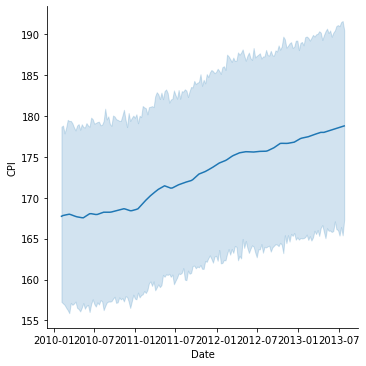

In [34]:
plt.figure(figsize = (10,10))
sns.relplot(x= 'Date', y = 'CPI', data = FTD, kind = 'line')

<Figure size 576x576 with 0 Axes>

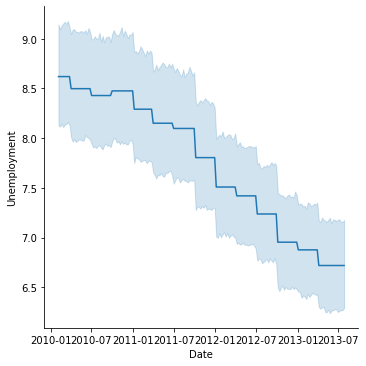

In [35]:
plt.figure(figsize = (8,8))
sns.relplot(x= 'Date', y = 'Unemployment', data = FTD , kind = 'line')

<Figure size 720x720 with 0 Axes>

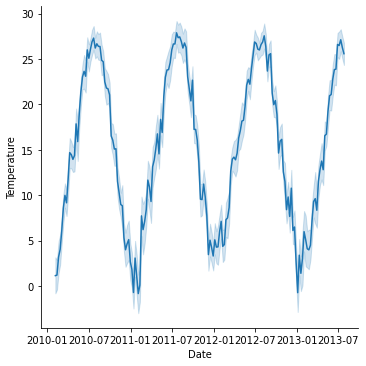

In [36]:
plt.figure(figsize = (10,10))
sns.relplot(x= 'Date', y = 'Temperature', data = FTD , kind = 'line')

<Figure size 720x720 with 0 Axes>

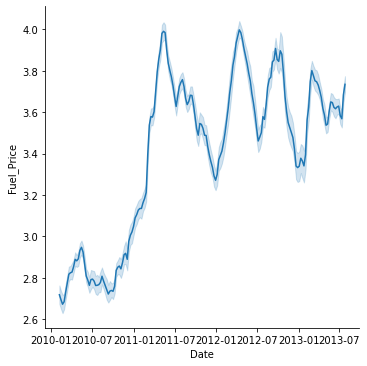

In [37]:
plt.figure(figsize = (10,10))
sns.relplot(x= 'Date', y = 'Fuel_Price', data = FTD , kind = 'line')

In [38]:
holiday = FTD[8191:]
for i in np.arange(0, 8190) :
    if FTD['IsHoliday'][i] == True :
        holiday = holiday.append(FTD[i:i+1])
    else :
        continue
# 특별 공휴일에는 가격 인하 프로모션이 진행이 됨. 1년간 총 4번이 있으며, 이 4번의 대략적인 기간을 파악하고자 함수 적용

In [39]:
holiday[0:20]

Store       Date  Temperature  ...  Unemployment  IsHoliday      Diff
1        1 2010-02-12         3.62  ...         8.106       True  0.083773
31       1 2010-09-10        25.94  ...         7.787       True  0.083773
42       1 2010-11-26        18.07  ...         7.838       True  0.083773
47       1 2010-12-31         9.13  ...         7.838       True  0.083773
53       1 2011-02-11         2.44  ...         7.742       True  0.083773
83       1 2011-09-09        24.44  ...         7.962       True  0.083773
94       1 2011-11-25        15.63  ...         7.866       True  0.083773
99       1 2011-12-30         6.97  ...         7.866       True  0.083773
105      1 2012-02-10         8.90  ...         7.348       True  0.083773
135      1 2012-09-07        28.87  ...         6.908       True  0.083773
146      1 2012-11-23        13.46  ...         6.573       True  0.083773
151      1 2012-12-28         7.11  ...         6.573       True  0.083773
157      1 2013-02-08        13.71  ...         6.525       True  0.083773
183      2 2010-02-12         3.61  ...         8.324       True  0.083631
213      2 2010-09-10        26.16  ...         8.099       True  0.083631
224      2 2010-11-26        17.21  ...         8.163       True  0.083631
229      2 2010-12-31         8.50  ...         8.163       True  0.083631
235      2 2011-02-11         0.66  ...         8.028       True  0.083631
265      2 2011-09-09        25.54  ...         7.852       True  0.083631
276      2 2011-11-25        13.53  ...         7.441       True  0.083631

[20 rows x 8 columns]

##2월 둘쨋주 금요일 (슈퍼볼)
##9월 둘쨋주 금요일 (노동절)
##11월 넷쨋주 금요일 (추수감사절)
##12월 넷쨋주 금요일 (크리스마스)

### Date 결과를 바탕으로 구글링하여 해당 요일을 파악함.

#Sale & Store

In [40]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [41]:
sale.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [42]:
sale

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  05/02/2010      24924.50      False
1           1     1  12/02/2010      46039.49       True
2           1     1  19/02/2010      41595.55      False
3           1     1  26/02/2010      19403.54      False
4           1     1  05/03/2010      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  28/09/2012        508.37      False
421566     45    98  05/10/2012        628.10      False
421567     45    98  12/10/2012       1061.02      False
421568     45    98  19/10/2012        760.01      False
421569     45    98  26/10/2012       1076.80      False

[421570 rows x 5 columns]

In [43]:
store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [44]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [45]:
store

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

##sale과 store의 결측치가 없기 때문에, 메인 데이터로 활용하고자 store을 기준으로 merge 진행

In [46]:
df = sale.merge(store, how = 'inner', on = 'Store')
df

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size
0           1     1  05/02/2010      24924.50      False    A  151315
1           1     1  12/02/2010      46039.49       True    A  151315
2           1     1  19/02/2010      41595.55      False    A  151315
3           1     1  26/02/2010      19403.54      False    A  151315
4           1     1  05/03/2010      21827.90      False    A  151315
...       ...   ...         ...           ...        ...  ...     ...
421565     45    98  28/09/2012        508.37      False    B  118221
421566     45    98  05/10/2012        628.10      False    B  118221
421567     45    98  12/10/2012       1061.02      False    B  118221
421568     45    98  19/10/2012        760.01      False    B  118221
421569     45    98  26/10/2012       1076.80      False    B  118221

[421570 rows x 7 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


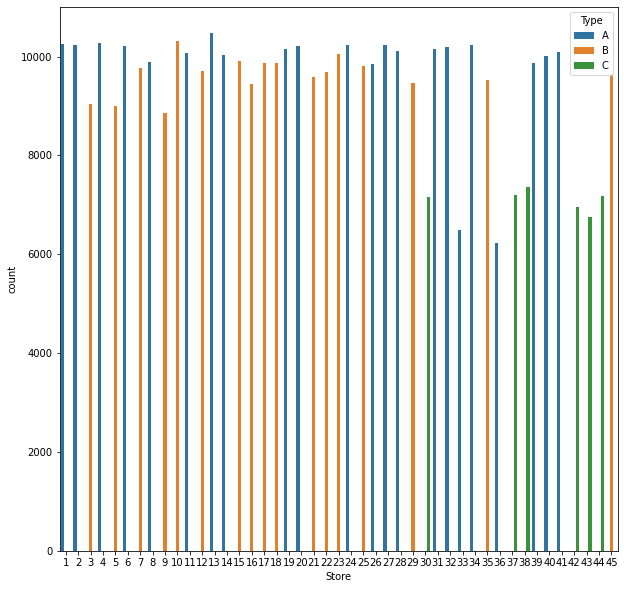

In [47]:
plt.figure(figsize=(10,10))
sns.countplot(df['Store'], hue = df['Type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


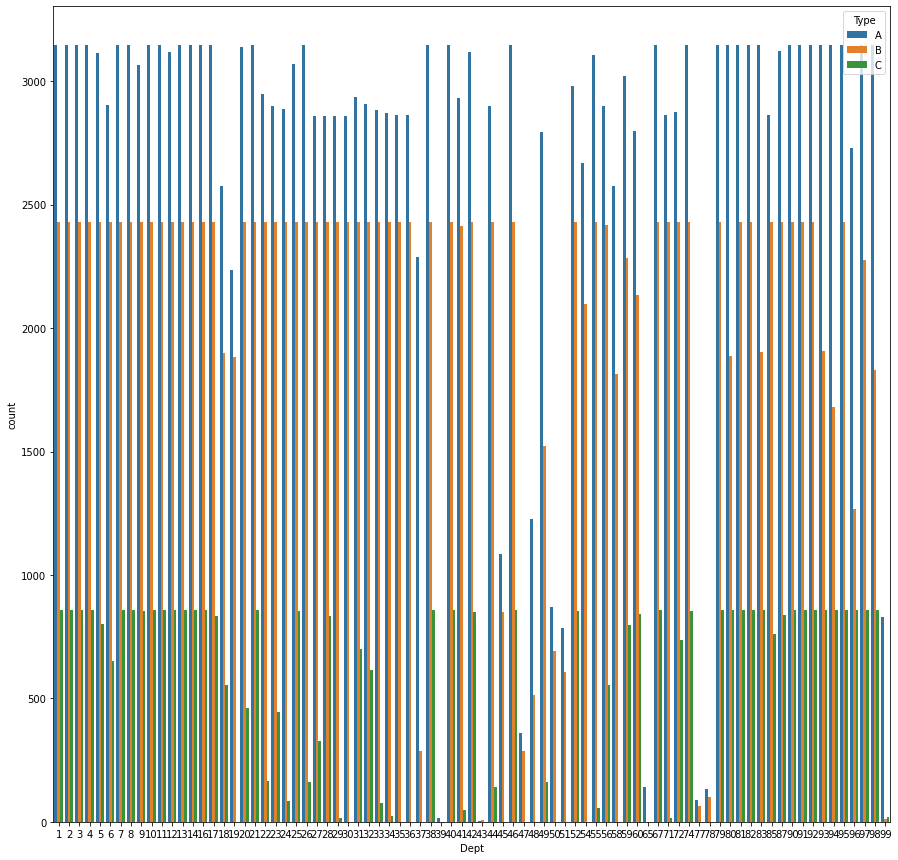

In [48]:
plt.figure(figsize=(15,15))
sns.countplot(df['Dept'], hue = df['Type'])

#점포에 따라서 부서의 갯수가 다르다는 것을 볼 수 있음.
#점포 A, B, C 순으로 많은 부서를 가지고 있다는 것을 볼 수 있음. 즉, 부서가 많을수록 점포의 규모가 크다는 것을 유추할 수 있음.

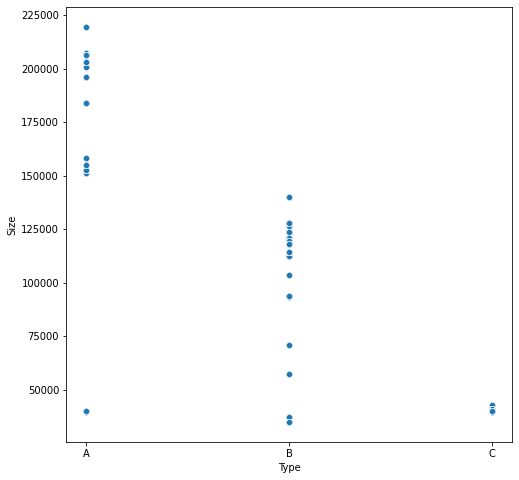

In [51]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'Type', y = 'Size', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


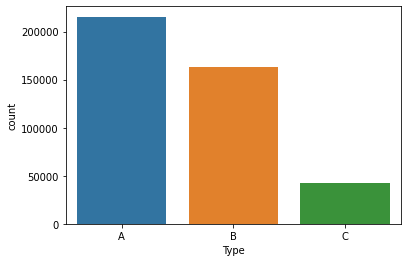

In [52]:
sns.countplot(df['Type'])

In [53]:
df.groupby('Type').Weekly_Sales.sum() 

Type
A    4.331015e+09
B    2.000701e+09
C    4.055035e+08
Name: Weekly_Sales, dtype: float64

In [54]:
df.groupby('Type').Store.count()

Type
A    215478
B    163495
C     42597
Name: Store, dtype: int64

In [55]:
df.groupby('Type').Weekly_Sales.sum()  /  df.groupby('Type').Store.count()

Type
A    20099.568043
B    12237.075977
C     9519.532538
dtype: float64

#유추한 내용을 보면 A의 이상치 하나를 제외하고는 A, B, C 순으로 규모가 크다는 것을 확인할 수 있음.
#그리고, 실제 주간 매출 상으로도 A, B, C 순으로 나타나는 것을 볼 수 있음.

In [56]:
sale['Store'].value_counts()

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64

#sale과 store merge한 데이터에 FTD까지 merge 해주어야 하기 때문에, 그렇게 되면 데이터가 너무 커져서, store을 20까지로 모델링을 진행하겠음.

In [57]:
for i in np.arange(0, 8000) :
    if FTD['Store'][i] == 20 :
        print(i)
    else :
        continue

3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639


#FTD의 store 20까지 해서 다시 저장

In [58]:
FTD = FTD[:3640]
FTD

Store       Date  Temperature  ...  Unemployment  IsHoliday      Diff
0         1 2010-02-05         5.73  ...         8.106      False  0.083773
1         1 2010-02-12         3.62  ...         8.106       True  0.083773
2         1 2010-02-19         4.41  ...         8.106      False  0.083773
3         1 2010-02-26         8.13  ...         8.106      False  0.083773
4         1 2010-03-05         8.06  ...         8.106      False  0.083773
...     ...        ...          ...  ...           ...        ...       ...
3635     20 2013-06-28        23.34  ...         7.191      False  0.080328
3636     20 2013-07-05        22.76  ...         7.191      False  0.080328
3637     20 2013-07-12        22.55  ...         7.191      False  0.080328
3638     20 2013-07-19        25.28  ...         7.191      False  0.080328
3639     20 2013-07-26        20.83  ...         7.191      False  0.080328

[3640 rows x 8 columns]

In [59]:
for i in np.arange(0, 300000) :
    if df['Store'][i] == 20 :
        print(i)
    else :
        continue

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
192549
192550
192551
192552
192553
192554
192555
192556
192557
192558
192559
192560
192561
192562
192563
192564
192565
192566
192567
192568
192569
192570
192571
192572
192573
192574
192575
192576
192577
192578
192579
192580
192581
192582
192583
192584
192585
192586
192587
192588
192589
192590
192591
192592
192593
192594
192595
192596
192597
192598
192599
192600
192601
192602
192603
192604
192605
192606
192607
192608
192609
192610
192611
192612
192613
192614
192615
192616
192617
192618
192619
192620
192621
192622
192623
192624
192625
192626
192627
192628
192629
192630
192631
192632
192633
192634
192635
192636
192637
192638
192639
192640
192641
192642
192643
192644
192645
192646
192647
192648
192649
192650
192651
192652
192653
192654
192655
192656
192657
192658
192659
192660
192661
192662
192663
192664
192665
192666
192667
192668
192669
192670
192671
192672
192673
192674
192675
192676
192677
192678
192679
192680
192681
192682
192683
192684
192685
19268

In [60]:
df = df[:197549]
df

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size
0           1     1  05/02/2010      24924.50      False    A  151315
1           1     1  12/02/2010      46039.49       True    A  151315
2           1     1  19/02/2010      41595.55      False    A  151315
3           1     1  26/02/2010      19403.54      False    A  151315
4           1     1  05/03/2010      21827.90      False    A  151315
...       ...   ...         ...           ...        ...  ...     ...
197544     20    99  07/09/2012          0.67       True    A  203742
197545     20    99  14/09/2012          0.05      False    A  203742
197546     20    99  21/09/2012         29.91      False    A  203742
197547     20    99  05/10/2012        660.00      False    A  203742
197548     20    99  12/10/2012        200.00      False    A  203742

[197549 rows x 7 columns]

In [61]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size
0           1     1 2010-02-05      24924.50      False    A  151315
1           1     1 2010-02-12      46039.49       True    A  151315
2           1     1 2010-02-19      41595.55      False    A  151315
3           1     1 2010-02-26      19403.54      False    A  151315
4           1     1 2010-03-05      21827.90      False    A  151315
...       ...   ...        ...           ...        ...  ...     ...
197544     20    99 2012-09-07          0.67       True    A  203742
197545     20    99 2012-09-14          0.05      False    A  203742
197546     20    99 2012-09-21         29.91      False    A  203742
197547     20    99 2012-10-05        660.00      False    A  203742
197548     20    99 2012-10-12        200.00      False    A  203742

[197549 rows x 7 columns]

In [62]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
dtype: int64

In [63]:
df['week'] = df.Date.dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
df['year'] = df.Date.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
FTD['year'] = FTD.Date.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
FTD['week'] = FTD.Date.dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
df[:145]

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  week  year
0        1     1 2010-02-05      24924.50      False    A  151315     5  2010
1        1     1 2010-02-12      46039.49       True    A  151315     6  2010
2        1     1 2010-02-19      41595.55      False    A  151315     7  2010
3        1     1 2010-02-26      19403.54      False    A  151315     8  2010
4        1     1 2010-03-05      21827.90      False    A  151315     9  2010
..     ...   ...        ...           ...        ...  ...     ...   ...   ...
140      1     1 2012-10-12      22764.01      False    A  151315    41  2012
141      1     1 2012-10-19      24185.27      False    A  151315    42  2012
142      1     1 2012-10-26      27390.81      False    A  151315    43  2012
143      1     2 2010-02-05      50605.27      False    A  151315     5  2010
144      1     2 2010-02-12      44682.74       True    A  151315     6  2010

[145 rows x 9 columns]

In [68]:
FTD[:30]

Store       Date  Temperature  Fuel_Price  ...  IsHoliday      Diff  year  week
0       1 2010-02-05         5.73       2.572  ...      False  0.083773  2010     5
1       1 2010-02-12         3.62       2.548  ...       True  0.083773  2010     6
2       1 2010-02-19         4.41       2.514  ...      False  0.083773  2010     7
3       1 2010-02-26         8.13       2.561  ...      False  0.083773  2010     8
4       1 2010-03-05         8.06       2.625  ...      False  0.083773  2010     9
5       1 2010-03-12        14.33       2.667  ...      False  0.083773  2010    10
6       1 2010-03-19        12.54       2.720  ...      False  0.083773  2010    11
7       1 2010-03-26        10.81       2.732  ...      False  0.083773  2010    12
8       1 2010-04-02        16.82       2.719  ...      False  0.083773  2010    13
9       1 2010-04-09        18.81       2.770  ...      False  0.083773  2010    14
10      1 2010-04-16        19.07       2.808  ...      False  0.083773  2010    15
11      1 2010-04-23        18.24       2.795  ...      False  0.083773  2010    16
12      1 2010-04-30        19.67       2.780  ...      False  0.083773  2010    17
13      1 2010-05-07        22.53       2.835  ...      False  0.083773  2010    18
14      1 2010-05-14        23.77       2.854  ...      False  0.083773  2010    19
15      1 2010-05-21        24.69       2.826  ...      False  0.083773  2010    20
16      1 2010-05-28        26.91       2.759  ...      False  0.083773  2010    21
17      1 2010-06-04        27.05       2.705  ...      False  0.083773  2010    22
18      1 2010-06-11        26.91       2.668  ...      False  0.083773  2010    23
19      1 2010-06-18        28.95       2.637  ...      False  0.083773  2010    24
20      1 2010-06-25        29.08       2.653  ...      False  0.083773  2010    25
21      1 2010-07-02        27.17       2.669  ...      False  0.083773  2010    26
22      1 2010-07-09        26.93       2.642  ...      False  0.083773  2010    27
23      1 2010-07-16        28.42       2.623  ...      False  0.083773  2010    28
24      1 2010-07-23        28.53       2.608  ...      False  0.083773  2010    29
25      1 2010-07-30        27.69       2.640  ...      False  0.083773  2010    30
26      1 2010-08-06        30.64       2.627  ...      False  0.083773  2010    31
27      1 2010-08-13        30.56       2.692  ...      False  0.083773  2010    32
28      1 2010-08-20        30.36       2.664  ...      False  0.083773  2010    33
29      1 2010-08-27        29.57       2.619  ...      False  0.083773  2010    34

[30 rows x 10 columns]

In [69]:
FTD[:145]

Store       Date  Temperature  Fuel_Price  ...  IsHoliday      Diff  year  week
0        1 2010-02-05         5.73       2.572  ...      False  0.083773  2010     5
1        1 2010-02-12         3.62       2.548  ...       True  0.083773  2010     6
2        1 2010-02-19         4.41       2.514  ...      False  0.083773  2010     7
3        1 2010-02-26         8.13       2.561  ...      False  0.083773  2010     8
4        1 2010-03-05         8.06       2.625  ...      False  0.083773  2010     9
..     ...        ...          ...         ...  ...        ...       ...   ...   ...
140      1 2012-10-12        17.22       3.601  ...      False  0.083773  2012    41
141      1 2012-10-19        19.98       3.594  ...      False  0.083773  2012    42
142      1 2012-10-26        20.64       3.506  ...      False  0.083773  2012    43
143      1 2012-11-02        12.96       3.386  ...      False  0.083773  2012    44
144      1 2012-11-09        16.24       3.314  ...      False  0.083773  2012    45

[145 rows x 10 columns]

In [70]:
df

Store  Dept       Date  Weekly_Sales  ...  Type    Size  week  year
0           1     1 2010-02-05      24924.50  ...     A  151315     5  2010
1           1     1 2010-02-12      46039.49  ...     A  151315     6  2010
2           1     1 2010-02-19      41595.55  ...     A  151315     7  2010
3           1     1 2010-02-26      19403.54  ...     A  151315     8  2010
4           1     1 2010-03-05      21827.90  ...     A  151315     9  2010
...       ...   ...        ...           ...  ...   ...     ...   ...   ...
197544     20    99 2012-09-07          0.67  ...     A  203742    36  2012
197545     20    99 2012-09-14          0.05  ...     A  203742    37  2012
197546     20    99 2012-09-21         29.91  ...     A  203742    38  2012
197547     20    99 2012-10-05        660.00  ...     A  203742    40  2012
197548     20    99 2012-10-12        200.00  ...     A  203742    41  2012

[197549 rows x 9 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


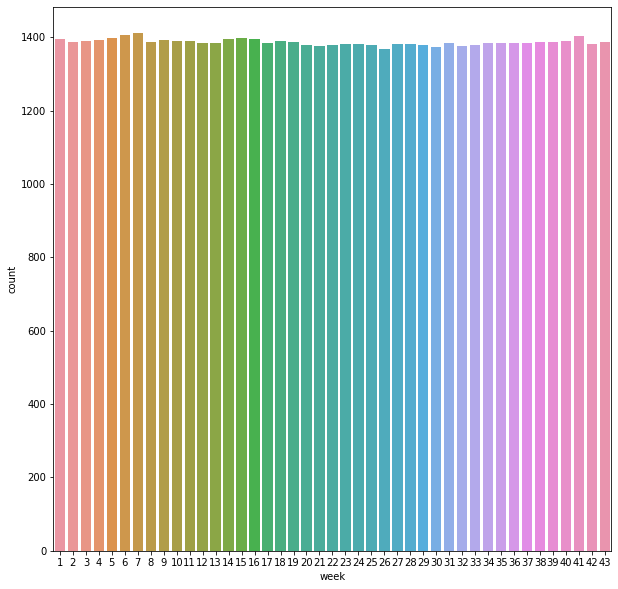

In [71]:
plt.figure(figsize=(10,10))
sns.countplot(df[df['year'] == 2012]['week'])

In [72]:
test = FTD[:0]

for i in np.arange(0, 3640) :
    if int(FTD['Date'].apply(str)[i][0:10].replace('-','')) > 20121101 :
        test = test.append(FTD[i:i+1])
    else :
        continue

##2012년도의 43주차까지 sale&store 데이터에 있기 때문에, 그 이후의 시기는 test 데이터로 활용하겠음.

In [73]:
test

Store       Date  Temperature  ...      Diff  year  week
143       1 2012-11-02        12.96  ...  0.083773  2012    44
144       1 2012-11-09        16.24  ...  0.083773  2012    45
145       1 2012-11-16        11.62  ...  0.083773  2012    46
146       1 2012-11-23        13.46  ...  0.083773  2012    47
147       1 2012-11-30        11.30  ...  0.083773  2012    48
...     ...        ...          ...  ...       ...   ...   ...
3635     20 2013-06-28        23.34  ...  0.080328  2013    26
3636     20 2013-07-05        22.76  ...  0.080328  2013    27
3637     20 2013-07-12        22.55  ...  0.080328  2013    28
3638     20 2013-07-19        25.28  ...  0.080328  2013    29
3639     20 2013-07-26        20.83  ...  0.080328  2013    30

[780 rows x 10 columns]

In [74]:
df.merge(FTD, how = 'inner', on = ['Store', 'year', 'week'])

Store  Dept     Date_x  ...  Unemployment  IsHoliday_y      Diff
0           1     1 2010-02-05  ...         8.106        False  0.083773
1           1     2 2010-02-05  ...         8.106        False  0.083773
2           1     3 2010-02-05  ...         8.106        False  0.083773
3           1     4 2010-02-05  ...         8.106        False  0.083773
4           1     5 2010-02-05  ...         8.106        False  0.083773
...       ...   ...        ...  ...           ...          ...       ...
197544     20    93 2012-10-26  ...         7.293        False  0.080328
197545     20    94 2012-10-26  ...         7.293        False  0.080328
197546     20    95 2012-10-26  ...         7.293        False  0.080328
197547     20    97 2012-10-26  ...         7.293        False  0.080328
197548     20    98 2012-10-26  ...         7.293        False  0.080328

[197549 rows x 16 columns]

In [75]:
df1 = df.merge(FTD, how = 'inner', on = ['Store', 'year', 'week'])
df1

Store  Dept     Date_x  ...  Unemployment  IsHoliday_y      Diff
0           1     1 2010-02-05  ...         8.106        False  0.083773
1           1     2 2010-02-05  ...         8.106        False  0.083773
2           1     3 2010-02-05  ...         8.106        False  0.083773
3           1     4 2010-02-05  ...         8.106        False  0.083773
4           1     5 2010-02-05  ...         8.106        False  0.083773
...       ...   ...        ...  ...           ...          ...       ...
197544     20    93 2012-10-26  ...         7.293        False  0.080328
197545     20    94 2012-10-26  ...         7.293        False  0.080328
197546     20    95 2012-10-26  ...         7.293        False  0.080328
197547     20    97 2012-10-26  ...         7.293        False  0.080328
197548     20    98 2012-10-26  ...         7.293        False  0.080328

[197549 rows x 16 columns]

In [76]:
pd.DataFrame(df1['Date_x'] == df1[ 'Date_y']).value_counts()

True    197549
dtype: int64

In [77]:
pd.DataFrame(df1['IsHoliday_x'] == df1[ 'IsHoliday_y']).value_counts()

True    197549
dtype: int64

##위에서 date가 다른 경우가 있었기 때문에, date가 일치하는지 확인.

In [78]:
df1.columns

Index(['Store', 'Dept', 'Date_x', 'Weekly_Sales', 'IsHoliday_x', 'Type',
       'Size', 'week', 'year', 'Date_y', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'IsHoliday_y', 'Diff'],
      dtype='object')

In [79]:
df1 = df1.drop(['Date_y', 'IsHoliday_y', 'Diff'], axis = 1)
df1

Store  Dept     Date_x  ...  Fuel_Price         CPI Unemployment
0           1     1 2010-02-05  ...       2.572  211.096358        8.106
1           1     2 2010-02-05  ...       2.572  211.096358        8.106
2           1     3 2010-02-05  ...       2.572  211.096358        8.106
3           1     4 2010-02-05  ...       2.572  211.096358        8.106
4           1     5 2010-02-05  ...       2.572  211.096358        8.106
...       ...   ...        ...  ...         ...         ...          ...
197544     20    93 2012-10-26  ...       3.882  216.151590        7.293
197545     20    94 2012-10-26  ...       3.882  216.151590        7.293
197546     20    95 2012-10-26  ...       3.882  216.151590        7.293
197547     20    97 2012-10-26  ...       3.882  216.151590        7.293
197548     20    98 2012-10-26  ...       3.882  216.151590        7.293

[197549 rows x 13 columns]

In [80]:
FTD.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday', 'Diff', 'year', 'week'],
      dtype='object')

df = df.merge(FTD[['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']], how = 'inner', on = ('Store', 'Date'))
df

In [81]:
sale.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [82]:
df

Store  Dept       Date  Weekly_Sales  ...  Type    Size  week  year
0           1     1 2010-02-05      24924.50  ...     A  151315     5  2010
1           1     1 2010-02-12      46039.49  ...     A  151315     6  2010
2           1     1 2010-02-19      41595.55  ...     A  151315     7  2010
3           1     1 2010-02-26      19403.54  ...     A  151315     8  2010
4           1     1 2010-03-05      21827.90  ...     A  151315     9  2010
...       ...   ...        ...           ...  ...   ...     ...   ...   ...
197544     20    99 2012-09-07          0.67  ...     A  203742    36  2012
197545     20    99 2012-09-14          0.05  ...     A  203742    37  2012
197546     20    99 2012-09-21         29.91  ...     A  203742    38  2012
197547     20    99 2012-10-05        660.00  ...     A  203742    40  2012
197548     20    99 2012-10-12        200.00  ...     A  203742    41  2012

[197549 rows x 9 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


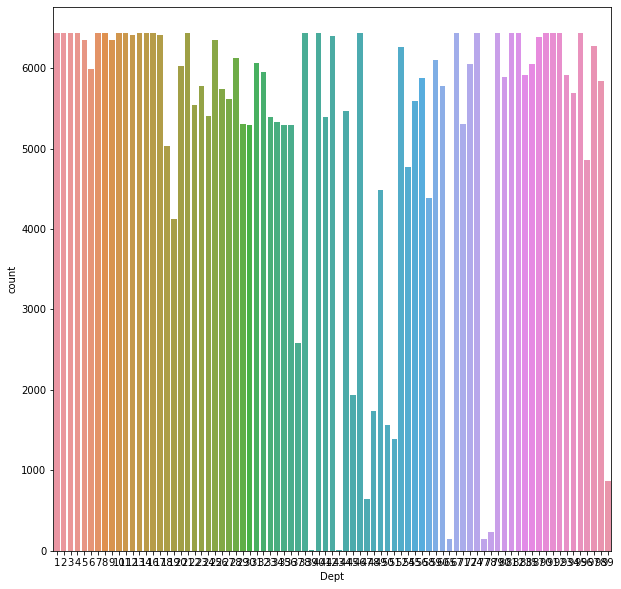

In [83]:
plt.figure(figsize= (10,10))
sns.countplot(sale['Dept'])

In [84]:
df2 = df1[['Store', 'Dept', 'Type', 'Size']].drop_duplicates()


In [85]:
df2

Store  Dept Type    Size
0           1     1    A  151315
1           1     2    A  151315
2           1     3    A  151315
3           1     4    A  151315
4           1     5    A  151315
...       ...   ...  ...     ...
187463     20    78    A  203742
187665     20    47    A  203742
187696     20    99    A  203742
191811     20    77    A  203742
194401     20    96    A  203742

[1531 rows x 4 columns]

In [86]:
for i in np.arange(1,197549) :
    if (df['Store'][i] == 20) & (df['Dept'][i] == 99) :
        print(i)
    else :
        continue

197505
197506
197507
197508
197509
197510
197511
197512
197513
197514
197515
197516
197517
197518
197519
197520
197521
197522
197523
197524
197525
197526
197527
197528
197529
197530
197531
197532
197533
197534
197535
197536
197537
197538
197539
197540
197541
197542
197543
197544
197545
197546
197547
197548


In [87]:
df[197334:197335]

Store  Dept       Date  Weekly_Sales  ...  Type    Size  week  year
197334     20    97 2012-04-20      23908.16  ...     A  203742    16  2012

[1 rows x 9 columns]

In [88]:
df1['Dept'].value_counts()

1     2860
27    2860
52    2860
14    2860
16    2860
      ... 
47     368
78     137
77      73
39      15
43       4
Name: Dept, Length: 80, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


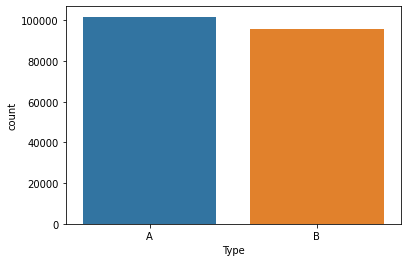

In [89]:
sns.countplot(df1['Type'])

In [90]:
df1.sort_values('Weekly_Sales')[:]

Store  Dept     Date_x  ...  Fuel_Price         CPI Unemployment
155177     16    47 2012-03-09  ...       3.286  196.963160        6.162
12854       2    47 2010-10-15  ...       2.720  211.471329        8.163
13210       2    47 2010-11-19  ...       2.771  211.547030        8.163
12072       2    47 2010-07-30  ...       2.640  211.026468        8.099
25918       3    32 2011-09-30  ...       3.355  220.085696        7.567
...       ...   ...        ...  ...         ...         ...          ...
90886      10     7 2010-12-24  ...       3.236  126.983581        9.003
190370     20    72 2010-11-26  ...       3.039  204.962100        7.484
131088     14    72 2010-11-26  ...       3.039  182.783277        8.724
94393      10    72 2011-11-25  ...       3.760  129.836400        7.874
90645      10    72 2010-11-26  ...       3.162  126.669267        9.003

[197549 rows x 13 columns]

#부서별 매출을 볼 때, 매출이 잘나오고 안나오고의 편차가 크기 때문에, 아무래도 판매량이 잘 나오는 제품을 다루는 부서라고 생각됩니다. 이러한 부서의 경우, 매출에 대비해 인력이 더 많이 필요하기 때문에 적정 인력 배치를 통해 관리가 원활할 수 있도록 해야 한다고 생각합니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


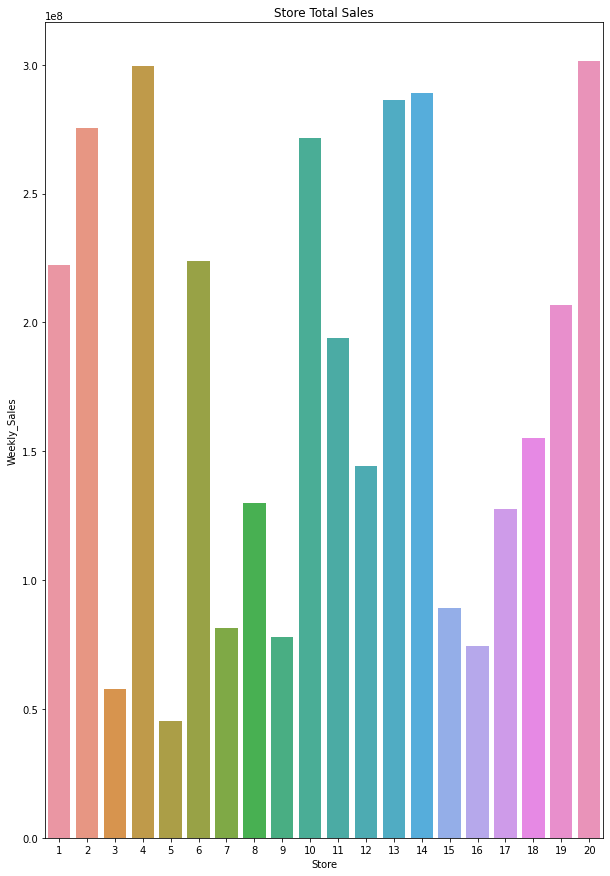

In [91]:
STS = pd.DataFrame(df.groupby('Store').Weekly_Sales.sum().sort_values()).reset_index()
plt.figure(figsize= (10,15))
plt.title('Store Total Sales')
sns.barplot('Store', 'Weekly_Sales', data = STS)


# 점포별 총 매출을 비교해보면, 1, 2, 4, 10, 13, 14, 20이 높은 것을 볼 수 있음. 우리 회사의 가장 매출이 많이 나오는 점포이기 때문에 관리가 잘 이루어져야 하는 곳입니다.

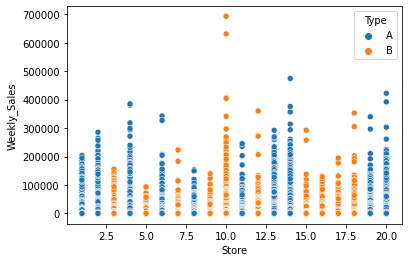

In [92]:
sns.scatterplot(x = 'Store', y = 'Weekly_Sales', hue = 'Type', data = df)

In [93]:
df.corr()

Store      Dept  Weekly_Sales  ...      Size      week      year
Store         1.000000  0.006449      0.013189  ...  0.102460  0.000111  0.001737
Dept          0.006449  1.000000      0.110694  ...  0.028350  0.001198  0.007130
Weekly_Sales  0.013189  0.110694      1.000000  ...  0.274028  0.027483 -0.008564
IsHoliday    -0.000153  0.000904      0.014228  ... -0.000207  0.127848 -0.056817
Size          0.102460  0.028350      0.274028  ...  1.000000 -0.000853 -0.002207
week          0.000111  0.001198      0.027483  ... -0.000853  1.000000 -0.180662
year          0.001737  0.007130     -0.008564  ... -0.002207 -0.180662  1.000000

[7 rows x 7 columns]

#성수기와 비수기를 파악할 수 있음.
#가장 메인 행사를 파악할 수 있음.
#10번 매장 72번의 부서가 매출이 가장 높은 부서임을 파악할 수 있음
#부서별 매출 파악
#점포별 매출 파악
#점포 크기별 매출 파악


In [94]:
df1 = df1.rename(columns = {'Date_x' : 'Date', 'IsHoliday_x' : 'IsHoliday'})
df1 = df1[['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size',
       'week', 'year', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']]
df1.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size', 'week', 'year',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales'],
      dtype='object')

In [95]:
df1

Store  Dept       Date  ...         CPI Unemployment  Weekly_Sales
0           1     1 2010-02-05  ...  211.096358        8.106      24924.50
1           1     2 2010-02-05  ...  211.096358        8.106      50605.27
2           1     3 2010-02-05  ...  211.096358        8.106      13740.12
3           1     4 2010-02-05  ...  211.096358        8.106      39954.04
4           1     5 2010-02-05  ...  211.096358        8.106      32229.38
...       ...   ...        ...  ...         ...          ...           ...
197544     20    93 2012-10-26  ...  216.151590        7.293      45077.00
197545     20    94 2012-10-26  ...  216.151590        7.293      59836.84
197546     20    95 2012-10-26  ...  216.151590        7.293     141644.44
197547     20    97 2012-10-26  ...  216.151590        7.293      22627.70
197548     20    98 2012-10-26  ...  216.151590        7.293      22042.55

[197549 rows x 13 columns]

In [96]:
test = df2.merge(test, how = 'inner', on = 'Store')
test = test[['Store', 'Dept', 'Date', 'IsHoliday', 'Type',
       'Size', 'week', 'year', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment']]
test

Store  Dept       Date  ...  Fuel_Price         CPI  Unemployment
0          1     1 2012-11-02  ...       3.386  223.462779         6.573
1          1     1 2012-11-09  ...       3.314  223.481307         6.573
2          1     1 2012-11-16  ...       3.252  223.512911         6.573
3          1     1 2012-11-23  ...       3.211  223.561947         6.573
4          1     1 2012-11-30  ...       3.207  223.610984         6.573
...      ...   ...        ...  ...         ...         ...           ...
59704     20    96 2013-06-28  ...       3.639  218.465247         7.191
59705     20    96 2013-07-05  ...       3.614  218.545575         7.191
59706     20    96 2013-07-12  ...       3.614  218.625903         7.191
59707     20    96 2013-07-19  ...       3.737  218.706230         7.191
59708     20    96 2013-07-26  ...       3.804  218.786558         7.191

[59709 rows x 12 columns]

##test set 세팅 완료

In [97]:
test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size', 'week', 'year',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [98]:
test.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
week            0
year            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [99]:
for i in np.arange(1,59709) :
    if (test['Store'][i] == 1) & (test['Dept'][i] == 14) :
        print(i)
    else :
        continue

507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545


In [100]:
for i in np.arange(0,197549) :
    if (sale['Store'][i] == 1) & (sale['Dept'][i] == 15) :
        print(i)
    else :
        continue

In [101]:
#test.merge(sale[['Store','Dept']], on = 'Store')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


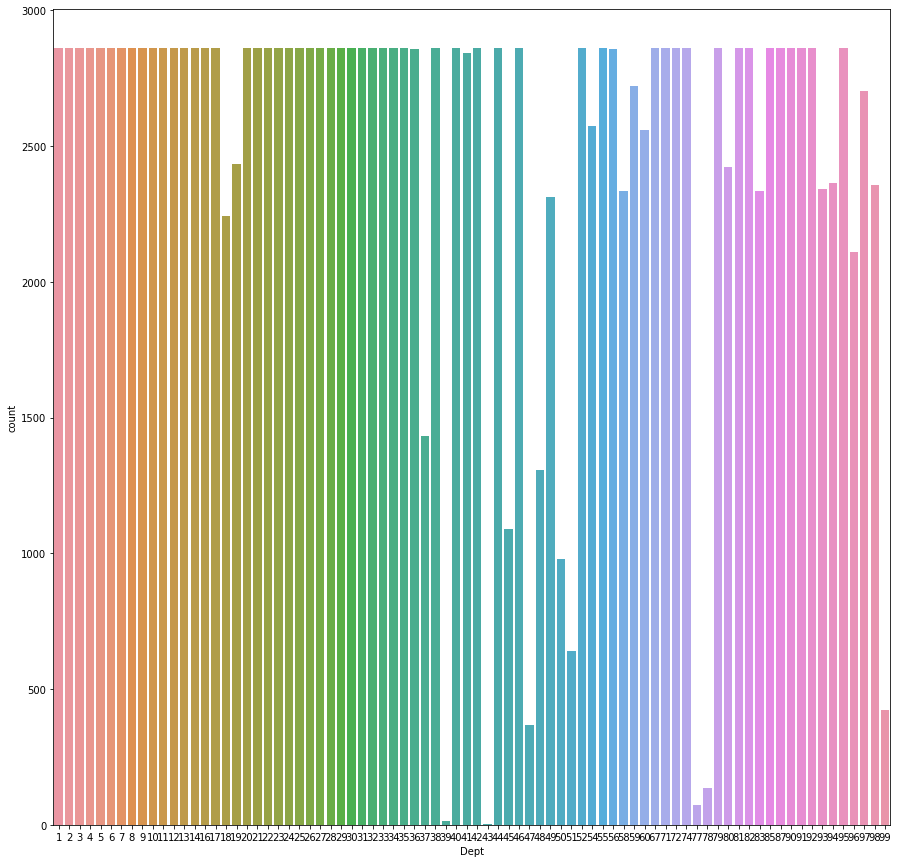

In [102]:
plt.figure(figsize= (15,15))
sns.countplot(df1['Dept'])

#위에서 확인했던 것처럼, 전 점포가 모든 부서를 가지고 있는 것은 아니라는 것을 확인할 수 있음.

In [103]:
#sale[['Store','Dept']].merge(test, how = 'left', on = 'Store')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_

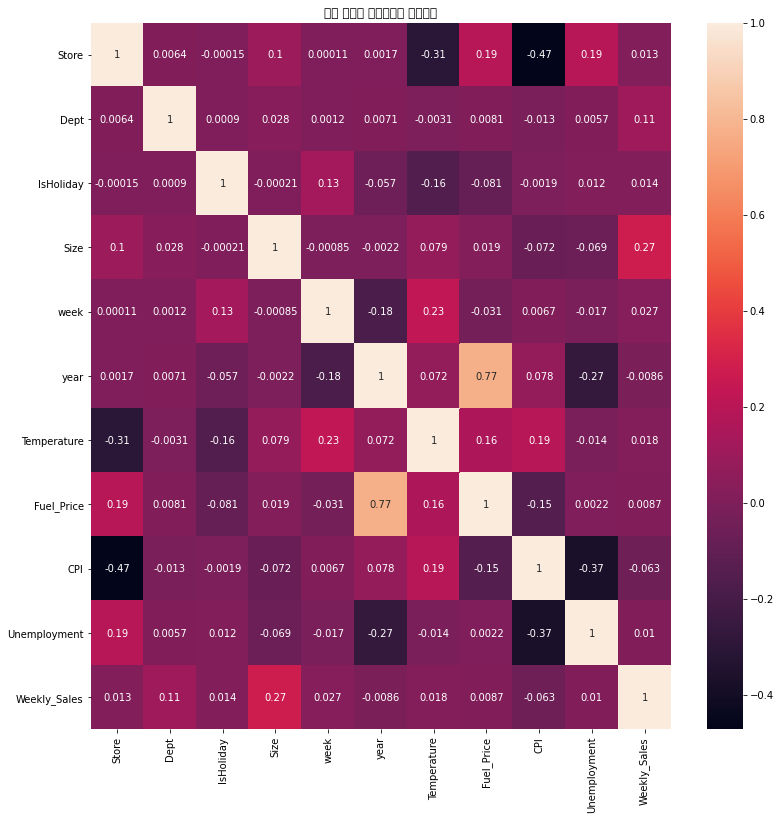

In [104]:
plt.figure(figsize= (13,13))
plt.title('주간 매출과 변수들과의 상관관계')
plt.rc('font', family='NanumBarunGothic') 
sns.heatmap(data = df1.corr(), annot = True);

# 히트맵을 통한 세일스(타겟)과 다른 변수와의 상관관계를 확인해본 결과, 대부분의 변수들이 큰 관계가 없는 수치가 나오는 것을 볼 수 있습니다.

# 해당 그래프는 각각의 독립적인 변수들과 타겟과의 관계이기 때문에 각각의 독립 변수들간에 영향을 주는 요소까지는 알 수 없음. 

In [105]:
df1.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
week            0
year            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Weekly_Sales    0
dtype: int64

In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197549 entries, 0 to 197548
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         197549 non-null  int64         
 1   Dept          197549 non-null  int64         
 2   Date          197549 non-null  datetime64[ns]
 3   IsHoliday     197549 non-null  bool          
 4   Type          197549 non-null  object        
 5   Size          197549 non-null  int64         
 6   week          197549 non-null  int64         
 7   year          197549 non-null  int64         
 8   Temperature   197549 non-null  float64       
 9   Fuel_Price    197549 non-null  float64       
 10  CPI           197549 non-null  float64       
 11  Unemployment  197549 non-null  float64       
 12  Weekly_Sales  197549 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(5), object(1)
memory usage: 24.8+ MB


In [107]:
sale1 = sale.groupby(['Date', 'Store', 'Dept']).agg({'Weekly_Sales': 'sum'}).sort_index().reset_index()
sale1 = sale1.groupby('Store').Weekly_Sales.sum().reset_index()[:20]
sale1 = sale1.merge(store[['Store', 'Type']], how = 'inner', on = 'Store' )

In [108]:
sale2 = sale.groupby(['Date', 'Store', 'Dept']).agg({'Weekly_Sales': 'sum'}).sort_index().reset_index()
sale3 = sale2.groupby('Dept').Weekly_Sales.sum().reset_index()

In [109]:
sale2.groupby('Dept').Weekly_Sales.sum()

Dept
1     1.236388e+08
2     2.806112e+08
3     7.589245e+07
4     1.671467e+08
5     1.356074e+08
          ...     
95    4.493202e+08
96    7.383392e+07
97    8.949651e+07
98    3.982892e+07
99    3.581499e+05
Name: Weekly_Sales, Length: 81, dtype: float64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


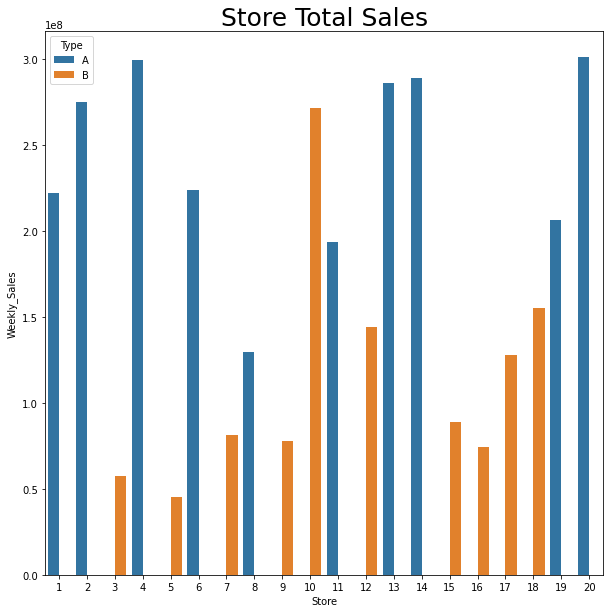

In [110]:
plt.figure(figsize=(10, 10))
plt.title('Store Total Sales', fontsize = 25)
sns.barplot(x = 'Store', y = 'Weekly_Sales', data = sale1, hue = 'Type')

In [111]:
sale3.sort_values(by = 'Weekly_Sales')

Dept  Weekly_Sales
45    47 -4.962930e+03
41    43  1.432000e+01
37    39  1.779800e+02
63    78  1.714710e+03
49    51  3.057283e+04
..   ...           ...
71    90  2.910685e+08
60    72  3.057252e+08
36    38  3.931181e+08
76    95  4.493202e+08
73    92  4.839433e+08

[81 rows x 2 columns]

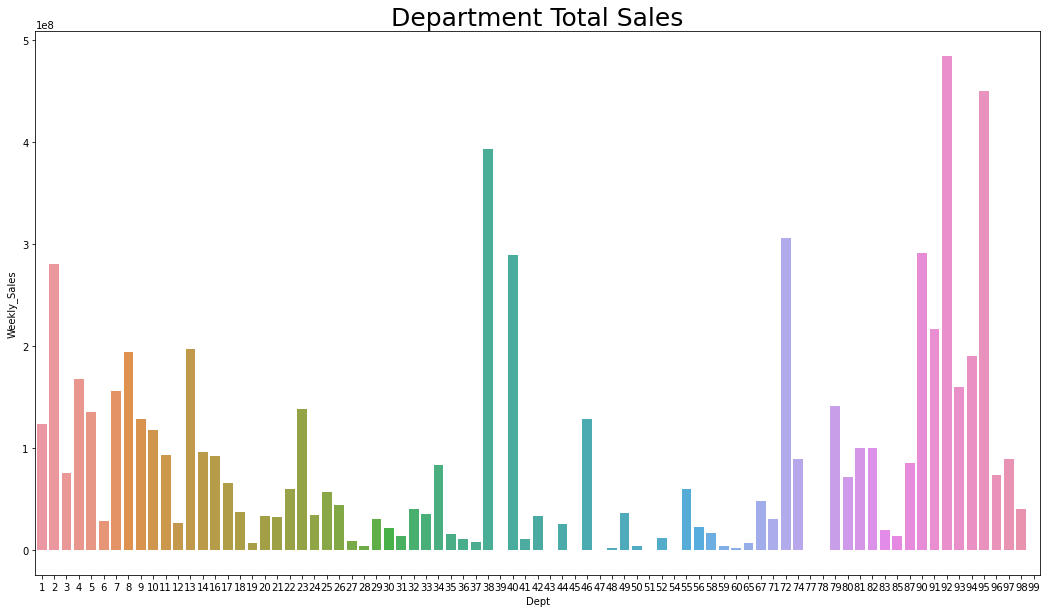

In [112]:
plt.figure(figsize=(18, 10))
plt.title('Department Total Sales', fontsize = 25)
sns.barplot(x = 'Dept', y = 'Weekly_Sales', data = sale3)

##92, 95, 38, 72, 90 순으로 부서별 매출이 높은 것을 볼 수 있음.
##부서들마다 총 주간 매출액이 가지각색이기 때문에, 매출이 높은 곳은 가장 판매가 잘되는 카테고리를 다루는 곳이거나 임대료를 받는 형태의 부서일 수 있음
##매출이 거의 없는 부서들은 매출을 내는 부서라기보다는 다른 부서들을 지원해주는 부서라고 판단할 수 있음.

In [113]:
df1.set_index('Date', inplace=True)

In [114]:
df1

Store  Dept  IsHoliday  ...         CPI  Unemployment  Weekly_Sales
Date                                ...                                        
2010-02-05      1     1      False  ...  211.096358         8.106      24924.50
2010-02-05      1     2      False  ...  211.096358         8.106      50605.27
2010-02-05      1     3      False  ...  211.096358         8.106      13740.12
2010-02-05      1     4      False  ...  211.096358         8.106      39954.04
2010-02-05      1     5      False  ...  211.096358         8.106      32229.38
...           ...   ...        ...  ...         ...           ...           ...
2012-10-26     20    93      False  ...  216.151590         7.293      45077.00
2012-10-26     20    94      False  ...  216.151590         7.293      59836.84
2012-10-26     20    95      False  ...  216.151590         7.293     141644.44
2012-10-26     20    97      False  ...  216.151590         7.293      22627.70
2012-10-26     20    98      False  ...  216.151590         7.293      22042.55

[197549 rows x 12 columns]

In [115]:
test.set_index('Date', inplace= True)
test

Store  Dept  IsHoliday  ... Fuel_Price         CPI  Unemployment
Date                                ...                                     
2012-11-02      1     1      False  ...      3.386  223.462779         6.573
2012-11-09      1     1      False  ...      3.314  223.481307         6.573
2012-11-16      1     1      False  ...      3.252  223.512911         6.573
2012-11-23      1     1       True  ...      3.211  223.561947         6.573
2012-11-30      1     1      False  ...      3.207  223.610984         6.573
...           ...   ...        ...  ...        ...         ...           ...
2013-06-28     20    96      False  ...      3.639  218.465247         7.191
2013-07-05     20    96      False  ...      3.614  218.545575         7.191
2013-07-12     20    96      False  ...      3.614  218.625903         7.191
2013-07-19     20    96      False  ...      3.737  218.706230         7.191
2013-07-26     20    96      False  ...      3.804  218.786558         7.191

[59709 rows x 11 columns]

In [116]:
df1.loc[(df1.index  > '2011-01') & (df1.index  < '2012-01') ]

Store  Dept  IsHoliday  ...         CPI  Unemployment  Weekly_Sales
Date                                ...                                        
2011-01-07      1     1      False  ...  211.404742         7.742      15984.24
2011-01-07      1     2      False  ...  211.404742         7.742      43202.29
2011-01-07      1     3      False  ...  211.404742         7.742      15808.15
2011-01-07      1     4      False  ...  211.404742         7.742      37947.80
2011-01-07      1     5      False  ...  211.404742         7.742      22699.69
...           ...   ...        ...  ...         ...           ...           ...
2011-12-30     20    95       True  ...  212.403576         7.082     117238.26
2011-12-30     20    96       True  ...  212.403576         7.082          5.96
2011-12-30     20    97       True  ...  212.403576         7.082      28304.72
2011-12-30     20    98       True  ...  212.403576         7.082      15773.73
2011-12-30     20    99       True  ...  212.403576         7.082        525.00

[71845 rows x 12 columns]

In [117]:
df2010 = df1.loc[df1.index  < '2011-01']
df2011 = df1.loc[(df1.index  > '2011-01') & (df1.index  < '2012-01') ]
df2012 = df1.loc[(df1.index  > '2012-01') & (df1.index  < '2013-01') ]

print('2010년 월별 평균 매출액:', df2010['Weekly_Sales'].sum()/11)
print('2011년 월별 평균 매출액:', df2011['Weekly_Sales'].sum()/12)
print('2012년 월별 평균 매출액:', df2012['Weekly_Sales'].sum()/10)


2010년 월별 평균 매출액: 109601320.03090906
2011년 월별 평균 매출액: 107745723.87166665
2012년 월별 평균 매출액: 105462420.918


In [118]:
pd.DataFrame(df1.reset_index().groupby('Date').Weekly_Sales.sum().sort_values())[130:144]

Weekly_Sales
Date                    
2010-04-02   26781055.87
2010-02-05   26842324.87
2012-02-10   27163190.90
2012-02-17   27367722.71
2012-04-06   28674856.36
2010-12-10   29813414.00
2011-12-09   29818099.38
2011-12-16   32290874.64
2010-12-17   33305872.34
2010-11-26   34812897.39
2011-11-25   35416102.09
2011-12-23   41838075.31
2010-12-24   43973199.87

In [119]:
df1.sort_values('Weekly_Sales')[197530:197548]

Store  Dept  IsHoliday  ...         CPI  Unemployment  Weekly_Sales
Date                                ...                                        
2011-12-23      4     7      False  ...  129.984548         5.143     318422.01
2011-11-25      6    72       True  ...  220.041741         6.551     326866.60
2010-11-26     19    72       True  ...  132.836933         8.067     339846.03
2011-12-23     10     7      False  ...  129.984548         7.874     341308.00
2010-11-26      6    72       True  ...  213.267296         7.007     342578.65
2010-11-26     18    72       True  ...  132.836933         9.331     353008.64
2010-12-24     14     7      False  ...  182.544590         8.724     356867.25
2010-11-26     12    72       True  ...  126.669267        14.313     359995.60
2011-11-25     12    72       True  ...  129.836400        12.890     360140.66
2011-11-25     14    72       True  ...  188.350400         8.523     375948.31
2010-11-26      4    72       True  ...  126.669267         7.127     381072.11
2011-11-25      4    72       True  ...  129.836400         5.143     385051.04
2011-11-25     20    72       True  ...  211.412076         7.082     392023.02
2010-12-24     10    72      False  ...  126.983581         9.003     404245.03
2010-12-24     10     7      False  ...  126.983581         9.003     406988.63
2010-11-26     20    72       True  ...  204.962100         7.484     422306.25
2010-11-26     14    72       True  ...  182.783277         8.724     474330.10
2011-11-25     10    72       True  ...  129.836400         7.874     630999.19

[18 rows x 12 columns]

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

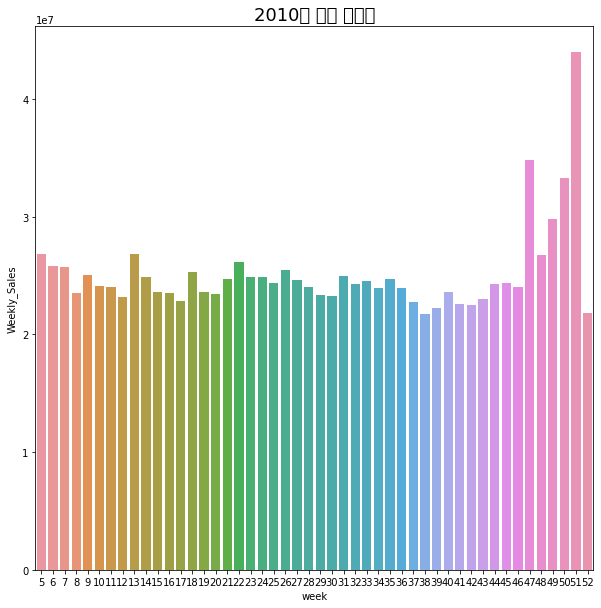

In [120]:
plt.figure(figsize= (10, 10))
plt.title('2010년 주간 매출액', fontsize = 18)
sns.barplot(x = 'week', y = 'Weekly_Sales', data = pd.DataFrame(df2010.groupby('week').Weekly_Sales.sum()).reset_index())

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_

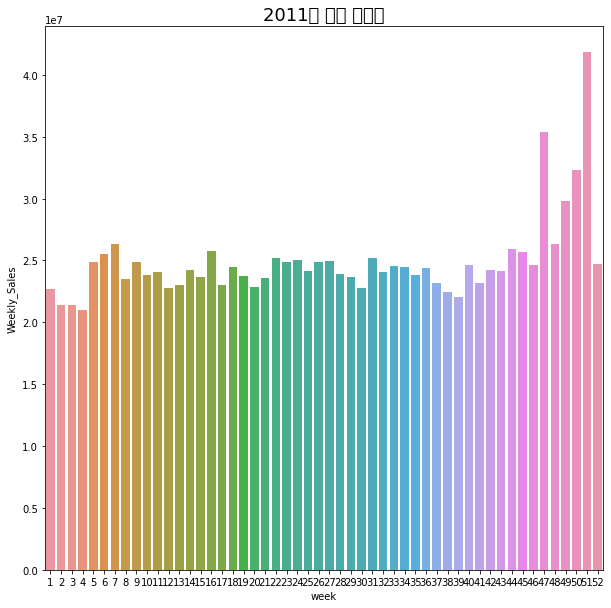

In [121]:
plt.figure(figsize= (10, 10))
plt.title('2011년 주간 매출액', fontsize = 18)
sns.barplot(x = 'week', y = 'Weekly_Sales', data = pd.DataFrame(df2011.groupby('week').Weekly_Sales.sum()).reset_index())

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_

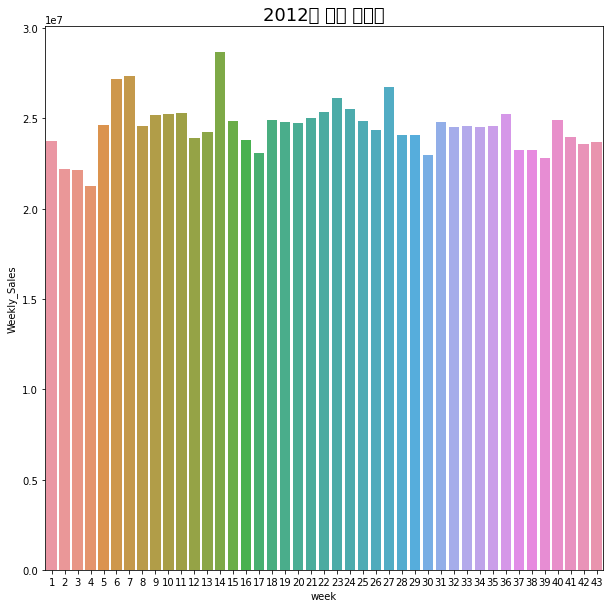

In [122]:
plt.figure(figsize= (10, 10))
plt.title('2012년 주간 매출액', fontsize = 18)
sns.barplot(x = 'week', y = 'Weekly_Sales', data = pd.DataFrame(df2012.groupby('week').Weekly_Sales.sum()).reset_index())

## 한 주에서 가장 높은 매출을 담당하는 부서의 대부분은 72번의 비중이 엄청 높다라는 것을 알 수 있음.
## 한 해의 47주차와 51주차의 매출이 높게 발생한다는 것을 알 수 있음.
## 47주차는 추수감사절 행사이지만, 51주차는 행사는 없지만 크리스마스 직전인 주임.
## 이 그래프를 통해 가장 크게 확인할 수 있는 점은 크리스마스의 행사는 크리스마스가 지난 금요일에 보통 시행했는데, 크리스마스의 행사를 크리스마스 직전주에 하면 매출을 조금 더 올릴 수 있을 것으로 판단됩니다.

In [123]:
df1[df1['IsHoliday'] == True]

Store  Dept  IsHoliday  ...         CPI  Unemployment  Weekly_Sales
Date                                ...                                        
2010-02-12      1     1       True  ...  211.242170         8.106      46039.49
2010-02-12      1     2       True  ...  211.242170         8.106      44682.74
2010-02-12      1     3       True  ...  211.242170         8.106      10887.84
2010-02-12      1     4       True  ...  211.242170         8.106      35351.21
2010-02-12      1     5       True  ...  211.242170         8.106      29620.81
...           ...   ...        ...  ...         ...           ...           ...
2012-09-07     20    95       True  ...  215.218957         7.280     158419.86
2012-09-07     20    96       True  ...  215.218957         7.280         -8.97
2012-09-07     20    97       True  ...  215.218957         7.280      28933.79
2012-09-07     20    98       True  ...  215.218957         7.280      19224.77
2012-09-07     20    99       True  ...  215.218957         7.280          0.67

[13927 rows x 12 columns]

In [124]:
df2010['CPI'].mean()

174.3528798794765

In [125]:
df2011['CPI'].mean()

178.09440081667017

In [126]:
df2012['CPI'].mean()

182.23651621682134

In [127]:
df2010['Unemployment'].mean()

8.081211474739263

In [128]:
df2011['Unemployment'].mean()

7.6539956712356245

In [129]:
df2012['Unemployment'].mean()

6.9574132458820355

In [130]:
df2010['Fuel_Price'].mean()

2.806720061126061

In [131]:
df2011['Fuel_Price'].mean()

3.5358345465933563

In [132]:
df2012['Fuel_Price'].mean()

3.677165472815573

In [133]:
df2012

Store  Dept  IsHoliday  ...         CPI  Unemployment  Weekly_Sales
Date                                ...                                        
2012-01-06      1     1      False  ...  219.714258         7.348      16567.69
2012-01-06      1     2      False  ...  219.714258         7.348      44481.38
2012-01-06      1     3      False  ...  219.714258         7.348      13926.04
2012-01-06      1     4      False  ...  219.714258         7.348      40925.76
2012-01-06      1     5      False  ...  219.714258         7.348      23105.81
...           ...   ...        ...  ...         ...           ...           ...
2012-10-26     20    93      False  ...  216.151590         7.293      45077.00
2012-10-26     20    94      False  ...  216.151590         7.293      59836.84
2012-10-26     20    95      False  ...  216.151590         7.293     141644.44
2012-10-26     20    97      False  ...  216.151590         7.293      22627.70
2012-10-26     20    98      False  ...  216.151590         7.293      22042.55

[59611 rows x 12 columns]

In [134]:
df2010 = df2010.reset_index()

In [135]:
df2010

Date  Store  Dept  ...         CPI Unemployment  Weekly_Sales
0     2010-02-05      1     1  ...  211.096358        8.106      24924.50
1     2010-02-05      1     2  ...  211.096358        8.106      50605.27
2     2010-02-05      1     3  ...  211.096358        8.106      13740.12
3     2010-02-05      1     4  ...  211.096358        8.106      39954.04
4     2010-02-05      1     5  ...  211.096358        8.106      32229.38
...          ...    ...   ...  ...         ...          ...           ...
66088 2010-12-31     20    93  ...  204.643227        7.484      44693.92
66089 2010-12-31     20    94  ...  204.643227        7.484      41640.31
66090 2010-12-31     20    95  ...  204.643227        7.484     119731.41
66091 2010-12-31     20    97  ...  204.643227        7.484      31072.09
66092 2010-12-31     20    98  ...  204.643227        7.484      12470.88

[66093 rows x 13 columns]

In [136]:
pd.DataFrame(df2010.groupby('Type').Size.mean()).reset_index()

Type           Size
0    A  195398.200433
1    B   91193.460566

In [137]:
pd.DataFrame(df2010.groupby('week').Weekly_Sales.sum()).reset_index()

week  Weekly_Sales
0      5   26842324.87
1      6   25812206.72
2      7   25707151.62
3      8   23530977.13
4      9   24998365.51
5     10   24086138.19
6     11   24017749.16
7     12   23130771.54
8     13   26781055.87
9     14   24869808.61
10    15   23615051.91
11    16   23542858.57
12    17   22846468.24
13    18   25325022.43
14    19   23628508.33
15    20   23388551.67
16    21   24717233.91
17    22   26110728.39
18    23   24867618.47
19    24   24839289.43
20    25   24342469.59
21    26   25464387.44
22    27   24594061.84
23    28   24020110.75
24    29   23372347.96
25    30   23266927.44
26    31   24969657.99
27    32   24238761.96
28    33   24501337.62
29    34   23936624.31
30    35   24712647.23
31    36   23964430.31
32    37   22706774.12
33    38   21760271.14
34    39   22265710.07
35    40   23617842.19
36    41   22578600.74
37    42   22514261.59
38    43   22991833.05
39    44   24299014.15
40    45   24375317.13
41    46   24022400.36
42    47   34812897.39
43    48   26727234.06
44    49   29813414.00
45    50   33305872.34
46    51   43973199.87
47    52   21808233.13

## 2010 / 2011 / 2012년 데이터를 보면 매출 추이가 어느 정도 유사한 것을 볼 수 있습니다.
## 4개의 할인 행사를 진행하는 일정 중에서 추수감사절과 크리스마스에 매출이 확실하게 높아지는 것을 볼 수 있습니다.

## 이를 통해, 추수 감사절과 크리스마스에 상품 재고 확보 및 인력 활용 등 상대적으로 더 많은 준비가 필요한 것을 시사하고 있습니다.

In [138]:
df1.shape

(197549, 12)

In [139]:
val = df1.loc[df1.index > '2012-02']
val.shape

(54048, 12)

##전체 데이터에서 약 25%를 검증 세트로 분류하였음.

In [140]:
train = df1.drop(val.index)
train.shape, val.shape

((143501, 12), (54048, 12))

In [266]:
target = 'Weekly_Sales'
features = train.drop(columns = [target]).columns

X_train = train[features]
y_train = train[[target]]
X_val = val[features]
y_val = val[[target]]
X_test = test

<Figure size 720x720 with 0 Axes>

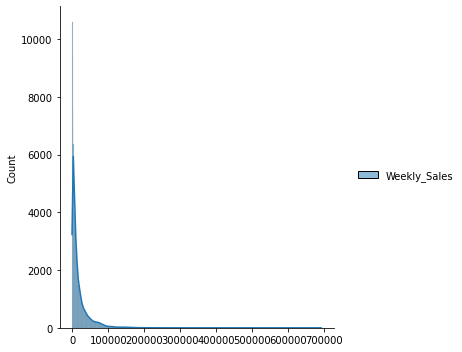

In [142]:

%matplotlib inline
plt.figure(figsize= (10,10))
sns.displot(y_train, kde=True);

In [143]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((143501, 11), (143501, 1), (54048, 11), (54048, 1), (59709, 11))

In [144]:
X_val

Store  Dept  IsHoliday  ... Fuel_Price         CPI  Unemployment
Date                                ...                                     
2012-02-03      1     1      False  ...      3.360  220.172015         7.348
2012-02-03      1     2      False  ...      3.360  220.172015         7.348
2012-02-03      1     3      False  ...      3.360  220.172015         7.348
2012-02-03      1     4      False  ...      3.360  220.172015         7.348
2012-02-03      1     5      False  ...      3.360  220.172015         7.348
...           ...   ...        ...  ...        ...         ...           ...
2012-10-26     20    93      False  ...      3.882  216.151590         7.293
2012-10-26     20    94      False  ...      3.882  216.151590         7.293
2012-10-26     20    95      False  ...      3.882  216.151590         7.293
2012-10-26     20    97      False  ...      3.882  216.151590         7.293
2012-10-26     20    98      False  ...      3.882  216.151590         7.293

[54048 rows x 11 columns]

In [145]:
X_train

Store  Dept  IsHoliday  ... Fuel_Price         CPI  Unemployment
Date                                ...                                     
2010-02-05      1     1      False  ...      2.572  211.096358         8.106
2010-02-05      1     2      False  ...      2.572  211.096358         8.106
2010-02-05      1     3      False  ...      2.572  211.096358         8.106
2010-02-05      1     4      False  ...      2.572  211.096358         8.106
2010-02-05      1     5      False  ...      2.572  211.096358         8.106
...           ...   ...        ...  ...        ...         ...           ...
2012-01-27     20    93      False  ...      3.567  212.928631         6.961
2012-01-27     20    94      False  ...      3.567  212.928631         6.961
2012-01-27     20    95      False  ...      3.567  212.928631         6.961
2012-01-27     20    97      False  ...      3.567  212.928631         6.961
2012-01-27     20    98      False  ...      3.567  212.928631         6.961

[143501 rows x 11 columns]

In [146]:
y_train

Weekly_Sales
Date                    
2010-02-05      24924.50
2010-02-05      50605.27
2010-02-05      13740.12
2010-02-05      39954.04
2010-02-05      32229.38
...                  ...
2012-01-27      44872.20
2012-01-27      57668.77
2012-01-27     125089.71
2012-01-27      22008.78
2012-01-27      16566.46

[143501 rows x 1 columns]

In [147]:
pip install category_encoders

     |████████████████████████████████| 81kB 5.9MB/s 


In [148]:
X_train['IsHoliday'] = X_train['IsHoliday'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
X_val['IsHoliday'] = X_val['IsHoliday'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#모델링 시작
##평가 지표 : r2_score, mae, mse
##사용 모델 : XGboost와 randomforeset
##해당 모델을 선택한 이유 : 머신러닝 모델 중 일반적으로 높은 성능을 내는 모델이기 때문에 선택을 하였음.
##인코딩 : Ordinal encoder 사용
##교차 검증 : RandomizedSearchCV 활용


In [150]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from category_encoders import OrdinalEncoder
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)


boosting = XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.2,
    n_jobs=-1,
    objective='reg:squarederror'
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

boosting.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          
          early_stopping_rounds=30
         )

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[0]	validation_0-rmse:28009.2	validation_1-rmse:26995.3
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 30 rounds.
[1]	validation_0-rmse:25534	validation_1-rmse:24410.9
[2]	validation_0-rmse:23785.1	validation_1-rmse:22560
[3]	validation_0-rmse:22570.3	validation_1-rmse:21309.9
[4]	validation_0-rmse:21566.1	validation_1-rmse:20330.2
[5]	validation_0-rmse:20723.7	validation_1-rmse:19409.6
[6]	validation_0-rmse:19353	validation_1-rmse:18110
[7]	validation_0-rmse:18934.1	validation_1-rmse:17709.3
[8]	validation_0-rmse:18494	validation_1-rmse:17303.6
[9]	validation_0-rmse:18171.5	validation_1-rmse:16929.5
[10]	validation_0-rmse:17961.5	validation_1-rmse:16746.1
[11]	validation_0-rmse:17361.2	validation_1-rmse:16140.6
[12]	validation_0-rmse:17212.3	validation_1-rmse:16081.8
[13]	validation_0-rmse:16953.7	validation_1-rmse:15756.2
[14]	validation_0-rmse:16645.1	validation_1-rmse:15439.4
[15]	v

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

#Baseline(기준모델)

In [270]:
predict = y_train.mean()
y_pred = [predict] * len(y_train)
mae_base = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2_base = r2_score(y_train, y_pred) 

print(f'훈련 에러(mae): {mae_base:.2f}')
print(f'훈련 score(r2): {r2_base:.2f}')

훈련 에러(mae): 17011.66
훈련 score(r2): 0.00


#1. XG boost 모델링

In [152]:
pipe_boost = make_pipeline(
    OrdinalEncoder(),
#     SimpleImputer(strategy='median'), # xgboost 에서는 missing value 처리를 해 줍니다
    XGBRegressor(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe_boost.fit(X_train, y_train);
y_pred = pipe_boost.predict(X_val)

print('검증 mae:', mean_absolute_error(y_val, y_pred))
print('검증 r2_score:',r2_score(y_val, y_pred))

[01:32:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
검증 mae: 3107.5131792951643
검증 r2_score: 0.9459273147683089


#2. XG boost 모델링(early stopping)

In [153]:
y_pred_boost = boosting.predict(X_val_encoded)
print('검증 mae:', mean_absolute_error(y_val, y_pred_boost))
print('검증 mse:',mean_squared_error(y_val, y_pred_boost))
print('검증 r2_score:',r2_score(y_val, y_pred_boost))

검증 mae: 4448.9559080200515
검증 mse: 54835246.880839095
검증 r2_score: 0.9108975559824887


#동일한 XGboost를 사용했지만, 얼리스타핑을 이용한것과 이용하지 않은 것을 비교했을 때, XG boost만을 사용한 것이 에러값도 적고 r2_score가 더 높다는 것을 볼 수 있습니다.
#얼리스타핑을 이용한 것이 과적합을 줄인 것이기 때문에 성능 자체는 조금 더 낮다고 판단할 수 있습니다.

#3. Randomforest 모델링

In [154]:
pipe_ord = make_pipeline(
    OrdinalEncoder(),
    RandomForestRegressor(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7,
                  oob_score = True,
                  verbose = 1

                 )
)

pipe_ord.fit(X_train, y_train)
y_pred = pipe_ord.predict(X_val)

print('검증 mae:', mean_absolute_error(y_val, y_pred))
print('검증 mse:',mean_squared_error(y_val, y_pred))
print('검증 r2_score:',r2_score(y_val, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   32.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


검증 mae: 6775.935511640344
검증 mse: 124161559.74067019
검증 r2_score: 0.798248406723492


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished


In [155]:
pipe_ord['randomforestregressor'].oob_score_

0.8052860191886598

#Feature importance(특성 중요도) / XGBoost

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


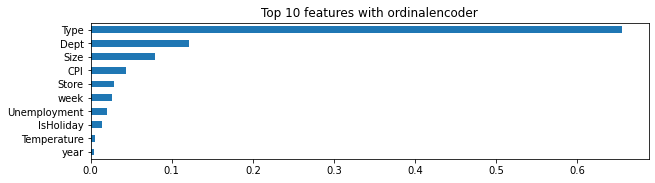

In [156]:
# 특성 중요도(ordinal)
rf_ord = pipe_boost.named_steps['xgbregressor']
importances_ord = pd.Series(rf_ord.feature_importances_, X_train.columns)
n = 10
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with ordinalencoder')
importances_ord.sort_values()[-n:].plot.barh();

##특성 중요도를 확인해보면, Type가 가장 많이 사용된 것을 확인할 수 있습니다.
##그만큼 종속 변수(매출 예측)을 구성하는데 가장 많이 활용된 변수를 순서대로 나열되었다고 볼 수 있습니다.

#Feature importance(특성 중요도) / Randomforest

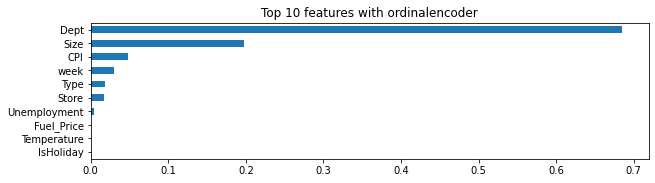

In [157]:
# 특성 중요도(ordinal)
rf_ord = pipe_ord.named_steps['randomforestregressor']
importances_ord = pd.Series(rf_ord.feature_importances_, X_train.columns)
n = 10
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with ordinalencoder')
importances_ord.sort_values()[-n:].plot.barh();

## 반면에, 랜덤 포레스트로 모델링의 특성 중요도를 보면, XGB 모델과는 달리 부서별, 규모별, 소비자 물가지수 순으로 나타나고 있음을 볼 수 있습니다.

#Permutation importance(순열중요도)

#Randomforest 순열 중요도

In [158]:
pip install eli5

     |████████████████████████████████| 112kB 8.0MB/s 


In [159]:
pipe_per_rf = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestRegressor(n_estimators=100,  max_depth = 7, random_state=2, n_jobs=-1)) 
])

In [160]:
pipe_per_rf.named_steps

{'preprocessing': Pipeline(memory=None,
          steps=[('ordinalencoder',
                  OrdinalEncoder(cols=None, drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 mapping=None, return_df=True, verbose=0)),
                 ('simpleimputer',
                  SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                missing_values=nan, strategy='mean',
                                verbose=0))],
          verbose=False),
 'rf': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
          

In [161]:
pipe_per_rf.fit(X_train, y_train)
print('특성 삭제 전 검증 정확도: ', pipe_per_rf.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


특성 삭제 전 검증 정확도:  0.7969006603085537


In [162]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe_per_rf.named_steps['rf'], # model
        scoring= None, 
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe_per_rf.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

In [163]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Fuel_Price     -0.000002
year            0.000000
IsHoliday       0.000011
week            0.000115
Temperature     0.000210
Unemployment    0.003332
Type            0.013677
Store           0.039851
CPI             0.055479
Size            0.472498
Dept            1.343571
dtype: float64

In [164]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

In [165]:
minimum_importance = 0.01
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected_ord = X_train[features]
X_val_selected_ord = X_val[features]

In [166]:
print('특성 삭제 후:', X_train_selected_ord.shape, X_val_selected_ord.shape)

특성 삭제 후: (143501, 5) (54048, 5)


In [167]:
pipe_per_rf = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestRegressor(n_estimators=100,  max_depth = 7, random_state=2, n_jobs=-1)) 
])

pipe_per_rf.fit(X_train_selected_ord, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('ordinalencoder',
                                  OrdinalEncoder(cols=['Type'],
                                                 drop_invariant=False,
                                                 handle_missing='value',
                                                 handle_unknown='value',
                                                 mapping=[{'col': 'Type',
                                                           'data_type': dtype('O'),
                                                           'mapping': A      1
B      2
NaN   -2
dtype: int64}],
                                                 return_df=True, verbose=0)),
                                 ('simpleimputer',
                                  SimpleImputer(add_indicator=False, copy=T...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                       

In [168]:
print('특성 삭제 후, 검증 정확도: ', pipe_per_rf.score(X_val_selected_ord, y_val))

특성 삭제 후, 검증 정확도:  0.7930736988218251


#XGB 순열 중요도

In [169]:
pipe_per = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', XGBRegressor(n_estimators=100, learning_rate = 0.2 , max_depth = 7, random_state=2, n_jobs=-1)) 
])

In [170]:
pipe_per.named_steps

{'preprocessing': Pipeline(memory=None,
          steps=[('ordinalencoder',
                  OrdinalEncoder(cols=None, drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 mapping=None, return_df=True, verbose=0)),
                 ('simpleimputer',
                  SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                missing_values=nan, strategy='mean',
                                verbose=0))],
          verbose=False),
 'rf': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              importance_type='gain', learning_rate=0.2, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=-1, nthread=None, objective='reg:linear', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
 

In [171]:
pipe_per.fit(X_train, y_train)
print('특성 삭제 전 검증 정확도: ', pipe_per.score(X_val, y_val))

[01:34:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
특성 삭제 전 검증 정확도:  0.9405376450522291


In [172]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe_per.named_steps['rf'], # model
        scoring= None, 
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe_per.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

In [173]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Fuel_Price     -0.000126
year            0.000000
IsHoliday       0.000527
Temperature     0.003459
Unemployment    0.012222
week            0.017534
CPI             0.071897
Store           0.079322
Size            0.232431
Type            0.234986
Dept            1.591202
dtype: float64

In [174]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

In [175]:
minimum_importance = 0.01
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_val_selected = X_val[features]

In [176]:
print('특성 삭제 후:', X_train_selected.shape, X_val_selected.shape)

특성 삭제 후: (143501, 7) (54048, 7)


In [177]:
pipe_per = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', XGBRegressor(n_estimators=100, learning_rate = 0.2 , max_depth = 7, random_state=2, n_jobs=-1)) 
])

pipe_per.fit(X_train_selected, y_train)

[01:34:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('ordinalencoder',
                                  OrdinalEncoder(cols=['Type'],
                                                 drop_invariant=False,
                                                 handle_missing='value',
                                                 handle_unknown='value',
                                                 mapping=[{'col': 'Type',
                                                           'data_type': dtype('O'),
                                                           'mapping': A      1
B      2
NaN   -2
dtype: int64}],
                                                 return_df=True, verbose=0)),
                                 ('simpleimputer',
                                  SimpleImputer(add_indicator=False, copy=T...
                              colsample_bylevel=1, colsample_bynode=1,
                      

In [178]:
print('훈련 정확도: ', pipe_per.score(X_train_selected, y_train))

훈련 정확도:  0.9718984678453044


In [179]:
print('특성 삭제 후, 검증 정확도: ', pipe_per.score(X_val_selected, y_val))

특성 삭제 후, 검증 정확도:  0.9431907555416207


In [180]:
y_pred = pipe_per.predict(X_val_selected)
print(mean_absolute_error(y_val, y_pred))
print(r2_score(y_val, y_pred))

3277.430667008046
0.9431907555416207


##XGB에서 관계가 적은 특성을 삭제한 후, 모델링을 다시하여 검증한 결과, 정확도가 0.003정도 오른 것을 볼 수 있습니다.


In [181]:
y_pred = pipe_boost.predict(X_val)
print('XG boost 모델의 검증 mae:', mean_absolute_error(y_val, y_pred))
print('XG boost 모델의 검증 r2:', r2_score(y_val, y_pred))

XG boost 모델의 검증 mae: 3107.5131792951643
XG boost 모델의 검증 r2: 0.9459273147683089


In [182]:
y_pred1 = boosting.predict(X_val_encoded)
print('XG boost(E.T) 모델의 검증 mae:', mean_absolute_error(y_val, y_pred1))
print('XG boost(E.T) 모델의 검증 r2:', r2_score(y_val, y_pred1))

XG boost(E.T) 모델의 검증 mae: 4448.9559080200515
XG boost(E.T) 모델의 검증 r2: 0.9108975559824887


In [183]:
y_pred2 = pipe_ord.predict(X_val)
print('랜덤포레스트 모델의 검증 mae:', mean_absolute_error(y_val, y_pred2))
print('랜덤포레스트 모델의 검증 r2:',r2_score(y_val, y_pred2))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


랜덤포레스트 모델의 검증 mae: 6775.935511640344
랜덤포레스트 모델의 검증 r2: 0.798248406723492


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished


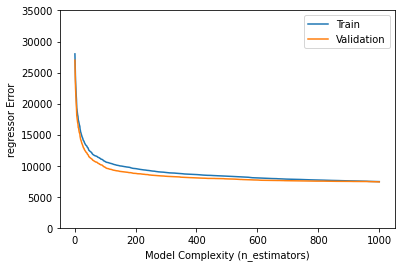

In [184]:
results = boosting.evals_result()
train_error = results['validation_0']['rmse']
val_error = results['validation_1']['rmse']

epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('regressor Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim((0, 35000)) # Zoom in
plt.legend();

#RandomizedSearch CV(랜덤 서치 교차 검증) 실시

In [260]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(max_depth = 10,
                          random_state=2
                           )
)

dists = {
    'randomforestregressor__n_estimators': randint(10, 100), 
    'randomforestregressor__max_depth': [5, 10, 15, None], 
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

ord = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=5, 
    cv=3, 
    scoring='neg_mean_absolute_error',   
    verbose=1,
    n_jobs=-1,
    refit = True
)

ord.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.8min finished


In [186]:
print('최적 하이퍼파라미터: ', ord.best_params_)
print('MAE: ', -ord.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 0.24771888971471734, 'randomforestregressor__n_estimators': 51}
MAE:  8672.226743959553


In [261]:
model_ord = ord.best_estimator_
y_pred = model_ord.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print('랜덤 서치(랜덤포레스트)도 이용한 검증 세트 MAE:', mae)
print('랜덤 서치(랜덤포레스트)도 이용한 검증 세트 R2:', r2)

랜덤 서치(랜덤포레스트)도 이용한 검증 세트 MAE: 2760.2770199965116
랜덤 서치(랜덤포레스트)도 이용한 검증 세트 R2: 0.9502881408874861


##랜덤포레스트 모델은 랜덤서치를 활용하여 하이퍼파라미터를 튜닝했을 때, 성능이 확연하게 좋아지는 것을 볼 수 있습니다.

In [262]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    XGBRegressor(max_depth = 10,
                          random_state=2
                           )
)

dists = {
    'xgbregressor__n_estimators': randint(10, 100), 
    'xgbregressor__max_depth': [5, 10, 15, None], 
    'xgbregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=5, 
    cv=3, 
    scoring='neg_mean_absolute_error',   
    verbose=1,
    n_jobs=-1,
    refit = True
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.6min finished


[02:52:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [189]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'xgbregressor__max_depth': 15, 'xgbregressor__max_features': 0.16093807179962472, 'xgbregressor__n_estimators': 22}
MAE:  6911.500903569053


In [263]:
model_boost = clf.best_estimator_
y_pred = model_boost.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print('랜덤 서치(XGB)도 이용한 검증 세트 MAE:', mae)
print('랜덤 서치(XGB)도 이용한 검증 세트 R2:', r2)

랜덤 서치(XGB)도 이용한 검증 세트 MAE: 2938.646725582081
랜덤 서치(XGB)도 이용한 검증 세트 R2: 0.9468288823510738


##XGB는 큰 차이는 없지만, 소폭 성능이 감소한 것을 확인할 수 있습니다.

In [191]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 52kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp37-none-any.whl size=57690722 sha256=c9105303e71c5cb5a6b908f954bb06160baf78e6bc0e3e9fc7720b2fb9514c19
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [192]:
!pip install shap

     |████████████████████████████████| 358kB 7.4MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490494 sha256=2dd2342799cc281c09852d86d6679687782f47b4b52e872c43b5827e72d8643a
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [193]:
X_train.columns

Index(['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'week', 'year',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

#PDP 

In [194]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [195]:
feature = 'Dept'

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


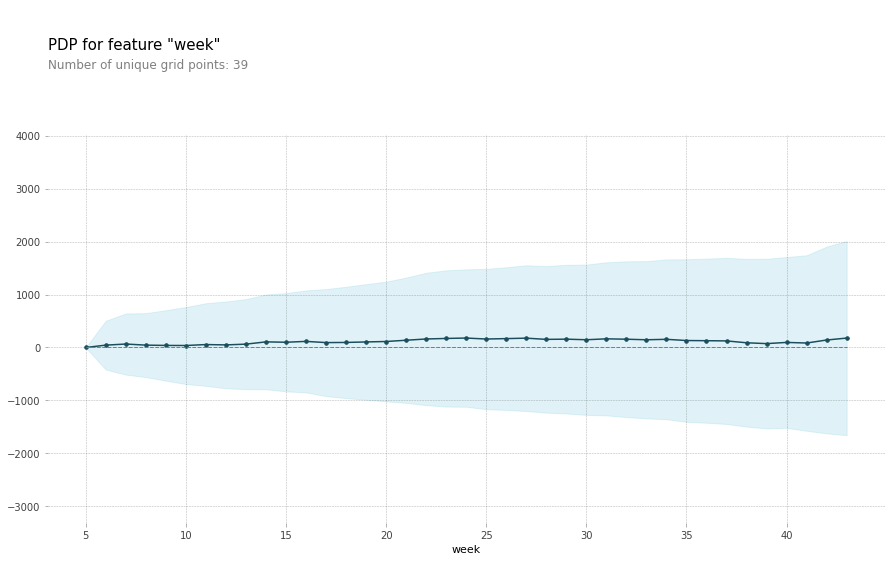

In [196]:
isolated = pdp_isolate(
    model = model_ord,
    dataset = X_val,
    model_features = X_val.columns,
    feature = 'week',
    grid_type = 'percentile',
    num_grid_points = 100
)

pdp_plot(isolated, feature_name='week');

In [197]:
X_test

Store  Dept  IsHoliday  ... Fuel_Price         CPI  Unemployment
Date                                ...                                     
2012-11-02      1     1      False  ...      3.386  223.462779         6.573
2012-11-09      1     1      False  ...      3.314  223.481307         6.573
2012-11-16      1     1      False  ...      3.252  223.512911         6.573
2012-11-23      1     1       True  ...      3.211  223.561947         6.573
2012-11-30      1     1      False  ...      3.207  223.610984         6.573
...           ...   ...        ...  ...        ...         ...           ...
2013-06-28     20    96      False  ...      3.639  218.465247         7.191
2013-07-05     20    96      False  ...      3.614  218.545575         7.191
2013-07-12     20    96      False  ...      3.614  218.625903         7.191
2013-07-19     20    96      False  ...      3.737  218.706230         7.191
2013-07-26     20    96      False  ...      3.804  218.786558         7.191

[59709 rows x 11 columns]

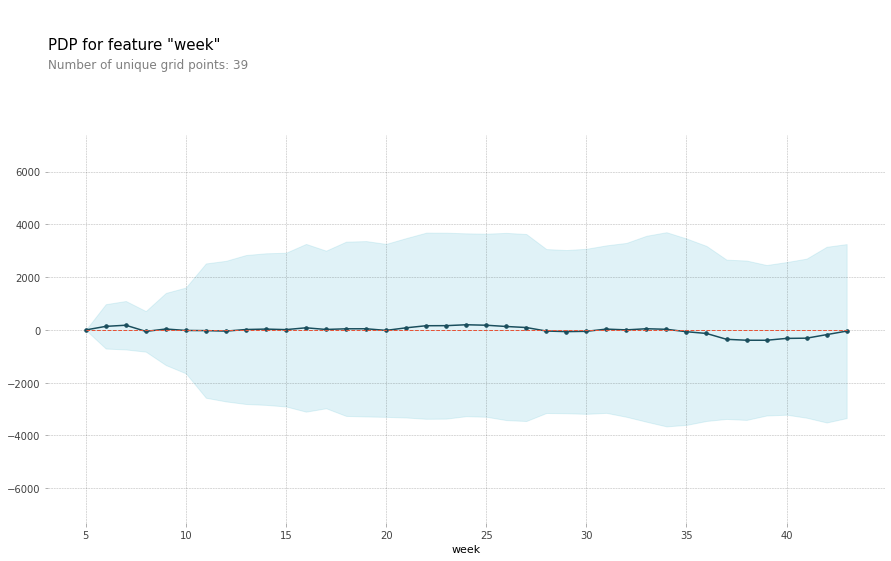

In [198]:
isolated = pdp_isolate(
    model = model_boost,
    dataset = X_val,
    model_features = X_val.columns,
    feature = 'week',
    grid_type = 'percentile',
    num_grid_points = 100
)

pdp_plot(isolated, feature_name='week');

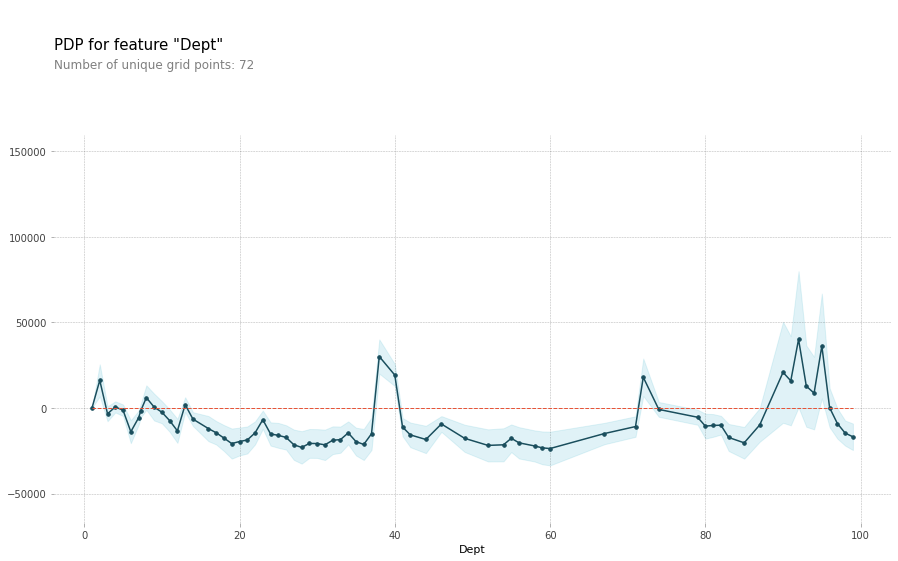

In [199]:
isolated = pdp_isolate(
    model = model_ord,
    dataset = X_val,
    model_features = X_val.columns,
    feature = feature,
    grid_type = 'percentile',
    num_grid_points = 100
)

pdp_plot(isolated, feature_name=feature);

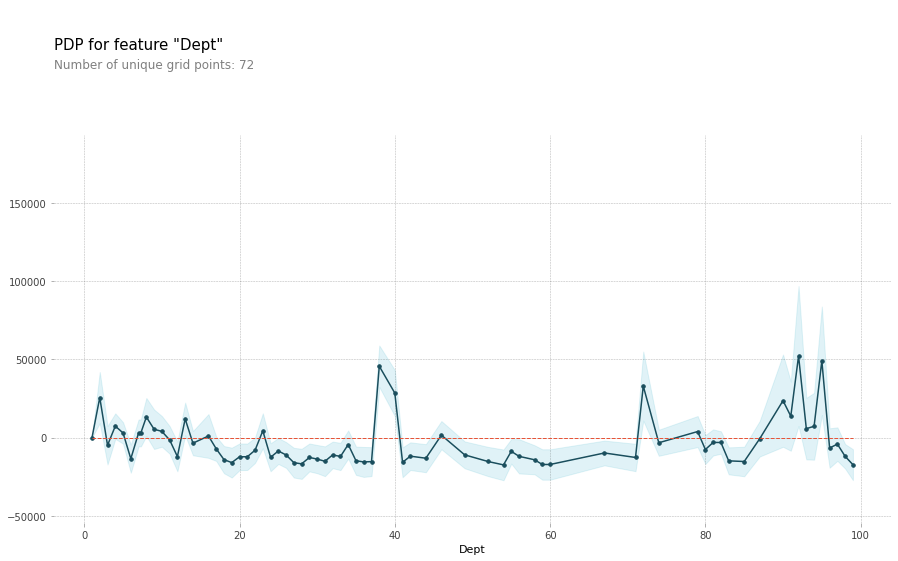

In [200]:
isolated = pdp_isolate(
    model = model_boost,
    dataset = X_val,
    model_features = X_val.columns,
    feature = feature,
    grid_type = 'percentile',
    num_grid_points = 100
)

pdp_plot(isolated, feature_name=feature);

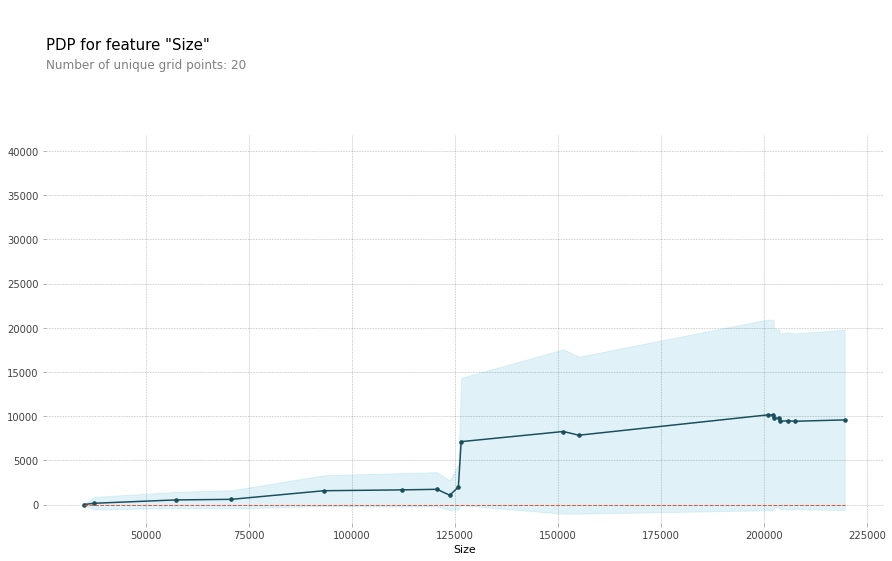

In [201]:
isolated = pdp_isolate(
    model = model_ord,
    dataset = X_val,
    model_features = X_val.columns,
    feature = 'Size',
    grid_type = 'percentile',
    num_grid_points = 100
)

pdp_plot(isolated, feature_name='Size');

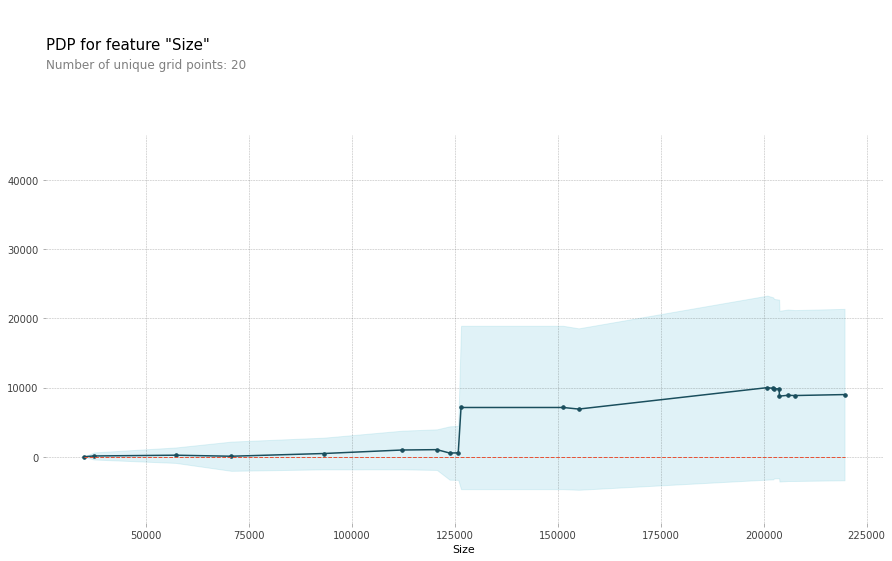

In [202]:
isolated = pdp_isolate(
    model = model_boost,
    dataset = X_val,
    model_features = X_val.columns,
    feature = 'Size',
    grid_type = 'percentile',
    num_grid_points = 100
)

pdp_plot(isolated, feature_name='Size');

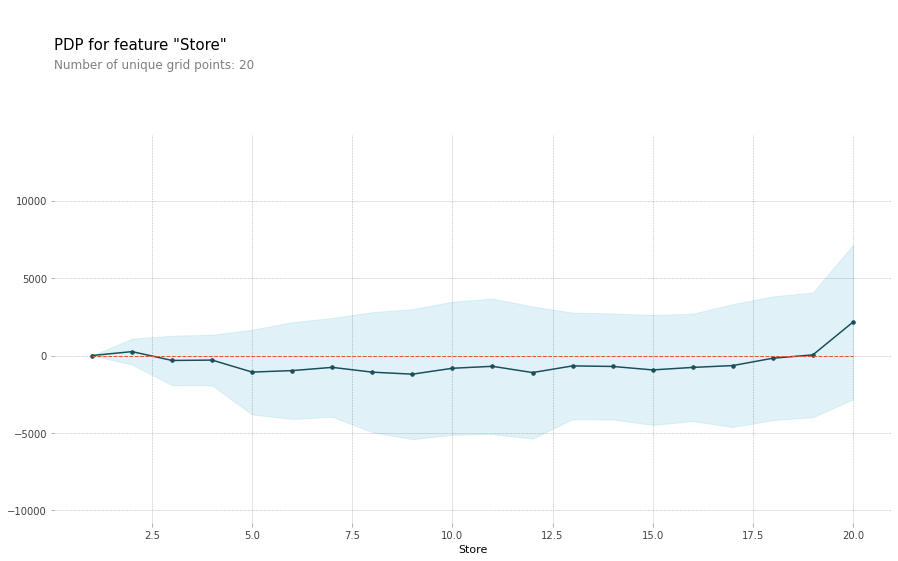

In [203]:
isolated = pdp_isolate(
    model = model_ord,
    dataset = X_val,
    model_features = X_val.columns,
    feature = 'Store',
    grid_type = 'percentile',
    num_grid_points = 100
)

pdp_plot(isolated, feature_name='Store');

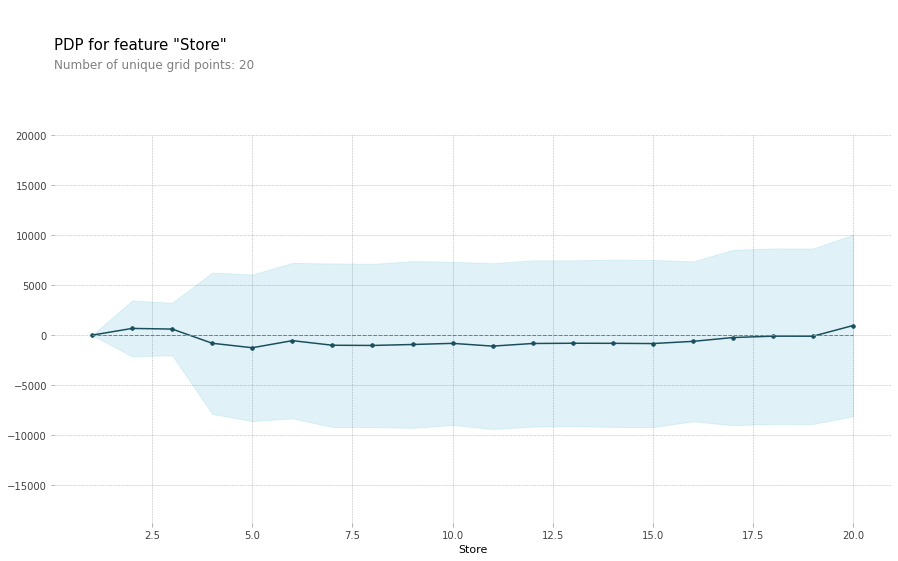

In [204]:
isolated = pdp_isolate(
    model = model_boost,
    dataset = X_val,
    model_features = X_val.columns,
    feature = 'Store',
    grid_type = 'percentile',
    num_grid_points = 100
)

pdp_plot(isolated, feature_name='Store');

In [205]:
X_val

Store  Dept IsHoliday  ... Fuel_Price         CPI  Unemployment
Date                               ...                                     
2012-02-03      1     1     False  ...      3.360  220.172015         7.348
2012-02-03      1     2     False  ...      3.360  220.172015         7.348
2012-02-03      1     3     False  ...      3.360  220.172015         7.348
2012-02-03      1     4     False  ...      3.360  220.172015         7.348
2012-02-03      1     5     False  ...      3.360  220.172015         7.348
...           ...   ...       ...  ...        ...         ...           ...
2012-10-26     20    93     False  ...      3.882  216.151590         7.293
2012-10-26     20    94     False  ...      3.882  216.151590         7.293
2012-10-26     20    95     False  ...      3.882  216.151590         7.293
2012-10-26     20    97     False  ...      3.882  216.151590         7.293
2012-10-26     20    98     False  ...      3.882  216.151590         7.293

[54048 rows x 11 columns]

In [206]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Size' , 'Dept']
features1 = ['CPI' , 'Dept']
features2 = ['year' , 'week']


interaction_ord = pdp_interact(
    model = model_ord,
    dataset = X_val,
    model_features = X_val.columns,
    features = features)

interaction_ord1 = pdp_interact(
    model = model_ord,
    dataset = X_val,
    model_features = X_val.columns,
    features = features1)

interaction_ord2 = pdp_interact(
    model = model_ord,
    dataset = X_val,
    model_features = X_val.columns,
    features = features2)

interaction_boost = pdp_interact(
    model = model_boost,
    dataset = X_val,
    model_features = X_val.columns,
    features = features)    

interaction_boost1 = pdp_interact(
    model = model_boost,
    dataset = X_val,
    model_features = X_val.columns,
    features = features1)    

interaction_boost2 = pdp_interact(
    model = model_boost,
    dataset = X_val,
    model_features = X_val.columns,
    features = features2)  

In [207]:
f1 = ['Dept', 'Size']
f2 = ['Dept', 'Store']
f3 = ['CPI', 'Fuel_Price']

interaction_f1 = pdp_interact(
    model = model_ord,
    dataset = X_val,
    model_features = X_val.columns,
    features = f1)

interaction_f2 = pdp_interact(
    model = model_ord,
    dataset = X_val,
    model_features = X_val.columns,
    features = f2)

interaction_f3 = pdp_interact(
    model = model_ord,
    dataset = X_val,
    model_features = X_val.columns,
    features = f3)


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


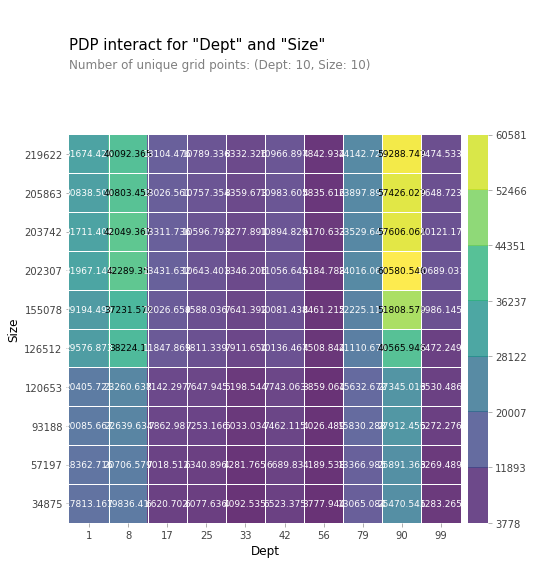

In [208]:
pdp_interact_plot(interaction_f1, plot_type='grid', 
                  feature_names=f1);

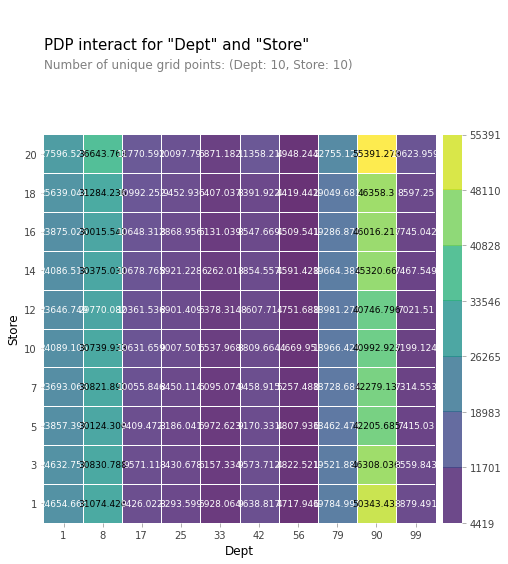

In [209]:
pdp_interact_plot(interaction_f2, plot_type='grid', 
                  feature_names=f2);

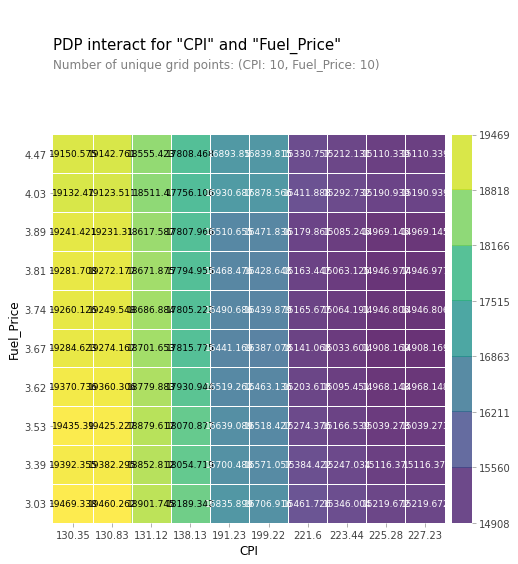

In [210]:
pdp_interact_plot(interaction_f3, plot_type='grid', 
                  feature_names=f3);

In [211]:
pd.DataFrame(df1.groupby('Date').Weekly_Sales.sum()).reset_index()

Date  Weekly_Sales
0   2010-02-05   26842324.87
1   2010-02-12   25812206.72
2   2010-02-19   25707151.62
3   2010-02-26   23530977.13
4   2010-03-05   24998365.51
..         ...           ...
138 2012-09-28   22805484.30
139 2012-10-05   24907872.70
140 2012-10-12   23944603.11
141 2012-10-19   23582344.76
142 2012-10-26   23689385.74

[143 rows x 2 columns]

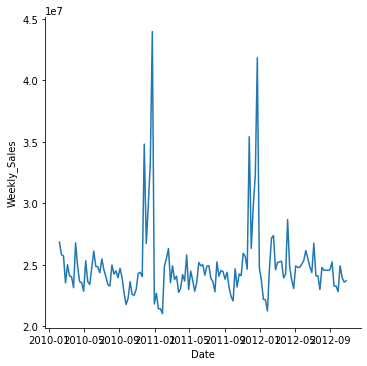

In [212]:
sns.relplot(x = 'Date', y = 'Weekly_Sales', data = pd.DataFrame(df1.groupby('Date').Weekly_Sales.sum()).reset_index(), kind = 'line')

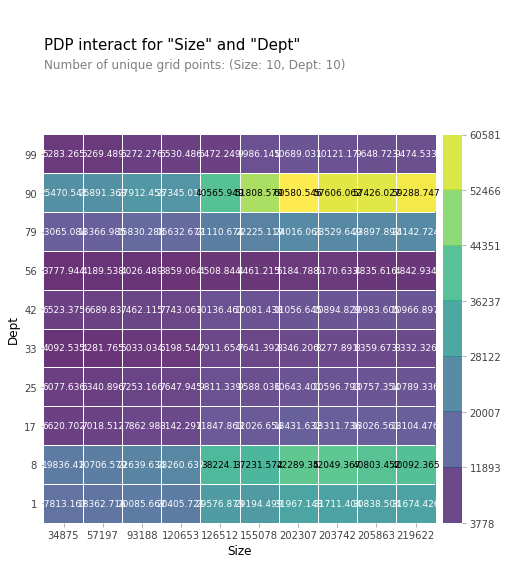

In [213]:
pdp_interact_plot(interaction_ord, plot_type='grid', 
                  feature_names=features);

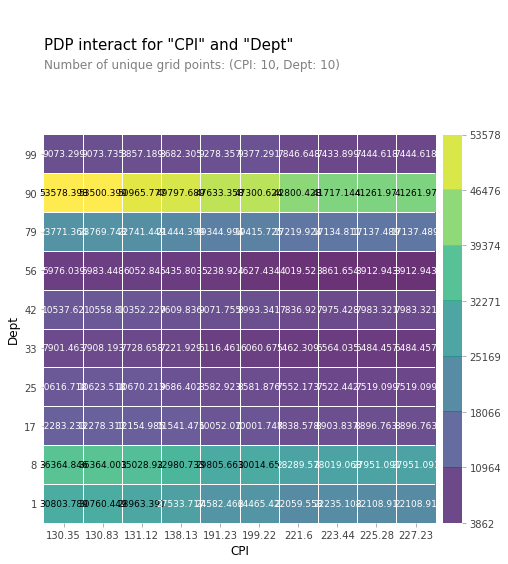

In [214]:
pdp_interact_plot(interaction_ord1, plot_type='grid', 
                  feature_names=features1);

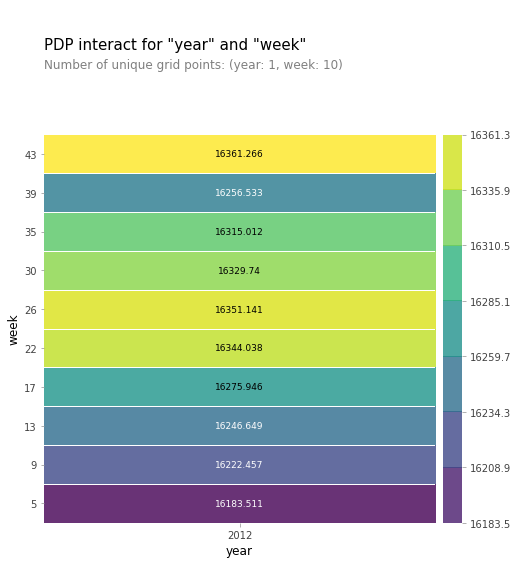

In [215]:
pdp_interact_plot(interaction_ord2, plot_type='grid', 
                  feature_names=features2);

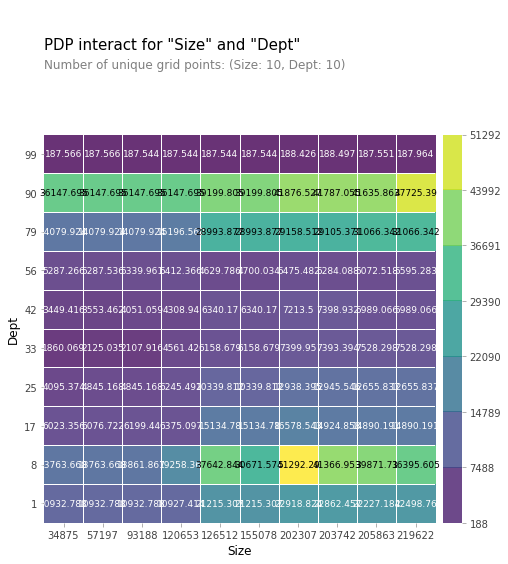

In [216]:
pdp_interact_plot(interaction_boost, plot_type='grid', 
                  feature_names=features);

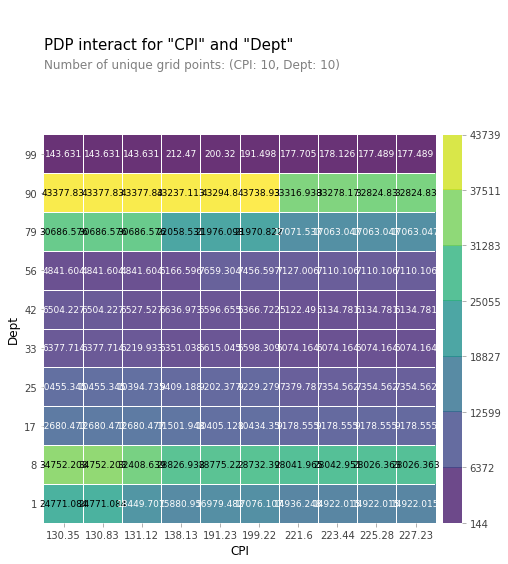

In [278]:
pdp_interact_plot(interaction_boost1, plot_type='grid', 
                  feature_names=features1);

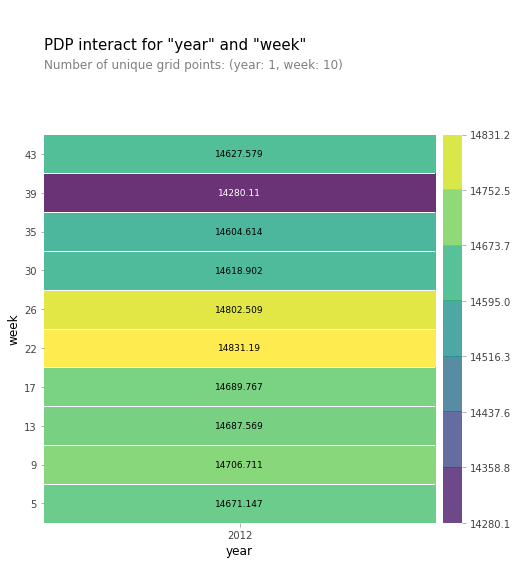

In [218]:
pdp_interact_plot(interaction_boost2, plot_type='grid', 
                  feature_names=features2);

#Shap

In [219]:
#X_train['IsHoliday'] = X_train['IsHoliday'].astype(str)
#X_val['IsHoliday'] = X_val['IsHoliday'].astype(str)


In [220]:
model_ord

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['IsHoliday', 'Type'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'IsHoliday',
                                          'data_type': dtype('O'),
                                          'mapping': False    1
True     2
NaN     -2
dtype: int64},
                                         {'col': 'Type',
                                          'data_type': dtype('O'),
                                          'mapping': A      1
B      2
NaN   -2
dtype: int64}],
                                return_df=True, verbose=0)),
                ('simplei...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features=0.2477188897147

In [224]:
enc = OrdinalEncoder()

X_train = enc.fit_transform(X_train)
X_val = enc.transform(X_val)
X_test = enc.transform(X_test)


param_distributions = { 
    'n_estimators': randint(10, 100), 
    'max_depth': [5, 10, 15, None], 
    'max_features': uniform(0, 1) 
    
}
rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=2),
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=3, 
    scoring='neg_mean_absolute_error',   
    verbose=0,  
    n_jobs=-1,
    refit = True
)

rf.fit(X_train, y_train);

In [ ]:
rf

In [225]:
param_distributions = { 
    'n_estimators': randint(10, 100), 
    'max_depth': [5, 10, 15, None], 
    'max_features': uniform(0, 1), 
}
boost = RandomizedSearchCV(
    XGBRegressor(random_state=2),
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=3, 
    scoring='neg_mean_absolute_error',   
    verbose=1,  
    n_jobs=-1,
    refit = True,
    random_state = 411
)

boost.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.1min finished


[01:50:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [226]:
rf = rf.best_estimator_

In [227]:
boost = boost.best_estimator_

In [228]:
test['IsHoliday'].value_counts()

False    55116
True      4593
Name: IsHoliday, dtype: int64

In [229]:
X_test['IsHoliday'] = test['IsHoliday']

In [230]:
X_test['IsHoliday'][1]

False

In [231]:
X_test['IsHoliday'] = X_test['IsHoliday'].astype(str)

In [232]:
for i in np.arange(0,59709) :
    if X_test['IsHoliday'][i] == 'False' :
        X_test['IsHoliday'][i] = 1
    else :
        X_test['IsHoliday'][i] = 2




In [233]:
test['IsHoliday'].value_counts()

False    55116
True      4593
Name: IsHoliday, dtype: int64

In [234]:
X_test['IsHoliday'].value_counts()

1    55116
2     4593
Name: IsHoliday, dtype: int64

In [235]:
X_val['IsHoliday'].value_counts()

1    51258
2     2790
Name: IsHoliday, dtype: int64

In [236]:
row = X_val.iloc[[500]]
row

Store  Dept  IsHoliday  ...  Fuel_Price         CPI  Unemployment
Date                                ...                                      
2012-03-16      1    94          1  ...       3.734  221.211813         7.348

[1 rows x 11 columns]

In [256]:
row1 = X_val.iloc[[15000]]
row1

Store  Dept  IsHoliday  ...  Fuel_Price         CPI  Unemployment
Date                                ...                                      
2012-07-13      6    85          1  ...       3.256  223.533282         5.668

[1 rows x 11 columns]

In [257]:
rf.predict(row1)

array([2157.37098361])

In [237]:
rf.predict(row)

array([69701.84934426])

In [238]:
boost.predict(row)

array([70877.74], dtype=float32)

In [239]:
y_val.iloc[[500]]

Weekly_Sales
Date                    
2012-03-16      64586.65

In [240]:
y_pred_rf = rf.predict(X_val)
y_pred_boost = boost.predict(X_val)

y_val1 = y_val
y_val1['rf'] = y_pred_rf
y_val1['boost'] = y_pred_boost
y_val1['diff1'] = y_val1['Weekly_Sales'] - y_val1['rf']
y_val1['diff2'] = y_val1['Weekly_Sales'] - y_val1['boost']
y_val1 = y_val1.reset_index()

X_val10 = X_val.reset_index()
X_val10.merge(y_val, how = 'inner', on ='Date')

pd.DataFrame(y_val.groupby('Date').Weekly_Sales.sum()).reset_index()

In [241]:
model_ord.predict(row)

array([66259.63254902])

In [242]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [259]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(row1)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row1
)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


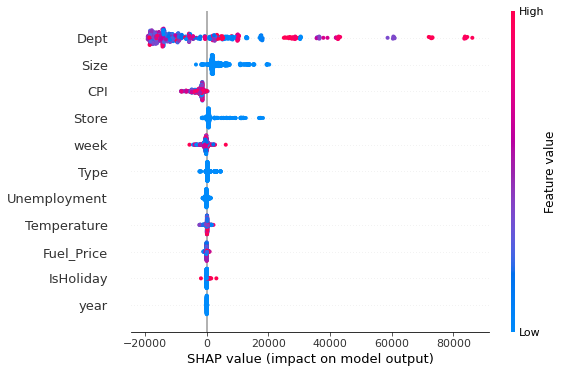

In [243]:
shap_values = explainer.shap_values(X_val.iloc[:500])
shap.summary_plot(shap_values, X_train.iloc[:500])

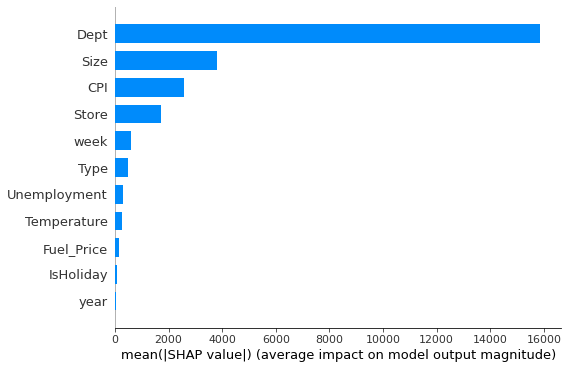

In [244]:
shap.summary_plot(shap_values, X_train.iloc[:500], plot_type="bar")

In [245]:
explainer1 = shap.TreeExplainer(boost)
shap_values = explainer1.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer1.expected_value, 
    shap_values=shap_values,
    features=row
)

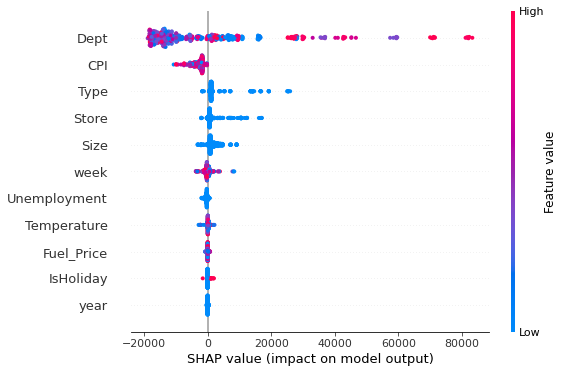

In [246]:
shap_values1 = explainer1.shap_values(X_val.iloc[:500])
shap.summary_plot(shap_values1, X_train.iloc[:500])

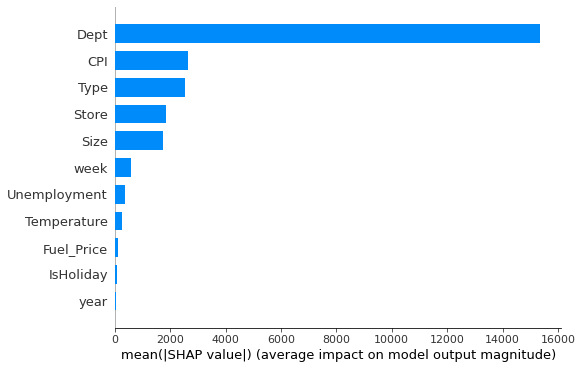

In [273]:
shap.summary_plot(shap_values1, X_train.iloc[:500], plot_type="bar")

##아무래도 점포가 클수록, 그리고 특정 부서일수록 매출에 크게 관계가 있는 것으로 보여집니다.
##부서의 경우, 예를 들어 판매가 잘 되는 카테고리를 담당하는 부서이거나, 임대료를 받고 관리를 하는 부서일 경우 매출 기여에 크게 영향을 미치는 것으로 파악할 수 있습니다.
##결론적으로, 매출 예측 모델링을 통해 외부적인 요소선 소비자 물가 지수에 대한 영향력이 어느 정도 있지만, 그보다 부서에 대한 특성이 압도적으로 높이며, 그 외에도 점포 유형, 점포, 점포크기가 매출 예측에 크게 영향을 끼치는 것을 확인할 수 있습니다. 그러므로, 외부적인 요소에 대한 대응보다는 내부적인 운영 프로세스, 인력 활용, 시설 정비 등 요소에 더 높은 관리를 통해 매출 상승에 기여해나가야 할 것입니다.

##매출 예측에 가장 크게 영향을 끼치는 요소는 내부적인 요소로 부서와 점포의 크기며, 외부적인 요소로써 가장 큰 것은 소비자 물가지수와 Week로 볼 수 있습니다. 그 이외의 요소에는 크게 작용하지 않은 것으로 보아, 생필품을 구매하는 경우가 많기 때문에 경기 변화에 크게 민감하지 않은 것으로 볼 수 있습니다. 
## 앞으로 우리가 초점을 맞추어야 할 것은, 부서와 점포에 대한 효율적인 인력관리, 프로세스 개선 등 이러한 요소에 초점을 맞추어 높은 매출을 올리는데 기여해나가야 할 것입니다.

In [248]:
df!@#!@#

SyntaxError: ignored

In [ ]:
rf.predict(X_test)

In [ ]:
enc.transform(X_test)

In [ ]:
X_val

In [ ]:
X_val_encoded

In [ ]:
X_test1['IsHoliday'] = X_test['IsHoliday'].astype(str)

In [ ]:
fit.enc
enc.transform(X_test)

In [ ]:
X_val

In [ ]:
y_pred_test1 = boost.predict(X_test)

In [ ]:
pd.DataFrame(y_pred_test)

In [ ]:
pd.concat((X_test, pd.DataFrame(y_pred_test)), axis =1)

In [ ]:
sns.relplot(y_pred_test)

In [ ]:
train

In [ ]:
pd.DataFrame(train.reset_index().groupby('Date').CPI.max()).reset_index()

In [ ]:
plt.figure(figsize=(10,10))
sns.relplot(x = 'Date', y = 'CPI', data = pd.DataFrame(train.reset_index().groupby('Date').CPI.max()).reset_index(), kind = 'line')

In [ ]:
plt.figure(figsize=(10,10))
sns.relplot(x = 'Date', y = 'Unemployment', data = pd.DataFrame(train.reset_index().groupby('Date').Unemployment.max()).reset_index(), kind = 'line')

In [ ]:
plt.figure(figsize=(10,10))
sns.relplot(x = 'Date', y = 'Fuel_Price', data = pd.DataFrame(train.reset_index().groupby('Date').Fuel_Price.max()).reset_index(), kind = 'line')

##외부적인 요인을 봤을 때, 소비자 물가 지수는 우상향, 실업률은 우하향의 형태로 나타나기 때문에, 최근 미국의 경제 상황은 좋은 것으로 판단될 수 있습니다.
##다만, 외부적인 경제 상황과는 달리 매출 증대에는 크게 영향이 없는 것으로 판단되고 있습니다.
##이를 통해서 추론할 수 있는 점은, 경제 상황에 크게 민감하게 반응하지 않는 생필품을 주로 판매하는 점포들이거나, 아니면 경제 상황이 좋아짐에 따라 경쟁사들도 증가하여 산업 자체에 포화상태로 더 이상 성장할 수 없는 상황이 있습니다.
## 그리고 매출 자체는 1년의 4번의 큰 할인 행사가 있지만, 실질적인 매출은 추수감사절과 크리스마스 할인 행사에 파급력이 크다는 것을 확인할 수 있습니다.

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize= (20,20))
sns.relplot(x = 'Date', y = 'Weekly_Sales', data = pd.DataFrame(df1.reset_index().groupby('Date').Weekly_Sales.sum()).reset_index(), kind = 'line')

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize= (15,15))
sns.relplot(x = 'Date', y = 'Weekly_Sales', data = pd.DataFrame(df1.reset_index().groupby('Date').Weekly_Sales.sum()).reset_index(), kind = 'line')

In [ ]:
X_test

In [ ]:
y_pred_rf = rf.predict(X_val)
y_pred_boost = boost.predict(X_val)

y_val.shape, y_pred_rf.shape, y_pred_boost.shape

In [ ]:
y_val1 = y_val
y_val1['rf'] = y_pred_rf
y_val1['boost'] = y_pred_boost
y_val1

In [ ]:
rf1 = abs(y_val1['Weekly_Sales'] - y_val1['rf'])

In [272]:
boost1 = abs(y_val1['Weekly_Sales'] - y_val1['boost'])

NameError: ignored

In [ ]:
pd.DataFrame(rf1 > boost1).value_counts()

In [ ]:
sns.countplot(pd.DataFrame(rf1 > boost1).value_counts())

In [ ]:
y_val1 = y_val.reset_index( drop = True)

In [ ]:
pd.concat(y_val1, y_pred_rf)

In [ ]:
y_pred_rf = y_pred_rf.rename(columns= {0 : 'rf'})
y_pred_rf

In [ ]:
y_pred_boost = y_pred_boost.rename(columns= {0 : 'boost'})
y_pred_boost

In [ ]:
boost.predict(test)

In [274]:
y_pred_ord = pipe_ord.predict(X_val)
mae_ord = mean_absolute_error(y_val, y_pred_ord)
r2_ord = r2_score(y_val, y_pred_ord)
print('랜덤포레스트 훈련 r2:', pipe_ord.score(X_train, y_train))
print('랜덤포레스트 검증 r2:',pipe_ord.score(X_val, y_val))
print('-'*100)

y_pred_boost = pipe_boost.predict(X_val)
mae_boost = mean_absolute_error(y_val, y_pred_boost)
r2_boost = r2_score(y_val, y_pred_boost)
print('XGB 훈련 r2:', pipe_boost.score(X_train, y_train))
print('XGB 검증 r2:',pipe_boost.score(X_val, y_val))
print('-'*100)

y_pred_boosting = boosting.predict(X_val_encoded)
mae_boosting = mean_absolute_error(y_val, y_pred_boosting)
r2_boosting = r2_score(y_val, y_pred_boosting)
print('XGB(early stopping) 훈련 r2:', boosting.score(X_train_encoded, y_train))
print('XGB(early stopping) 검증 r2:',boosting.score(X_val_encoded, y_val))
print('-'*100)

y_pred_per_rf = pipe_per_rf.predict(X_val_selected_ord)
mae_per_rf = mean_absolute_error(y_val, y_pred_per_rf)
r2_per_rf = r2_score(y_val, y_pred_per_rf)
print('랜덤포레스트(순열중요도) 훈련 r2:', pipe_per_rf.score(X_train_selected_ord, y_train))
print('랜덤포레스트(순열중요도) 검증 r2:',pipe_per_rf.score(X_val_selected_ord, y_val))
print('-'*100)

y_pred_per = pipe_per.predict(X_val_selected)
mae_per = mean_absolute_error(y_val, y_pred_per)
r2_per = r2_score(y_val, y_pred_per)
print('XGB(순열중요도) 훈련 r2:', pipe_per.score(X_train_selected, y_train))
print('XGB(순열중요도) 검증 r2:',pipe_per.score(X_val_selected, y_val))
print('-'*100)

model_ord.fit(X_train, y_train)
y_pred_model_ord = model_ord.predict(X_val)
mae_model_ord = mean_absolute_error(y_val, y_pred_model_ord)
r2_model_ord = r2_score(y_val, y_pred_model_ord)
print('랜덤포레스트(랜덤서치 CV) 훈련 r2:', model_ord.score(X_train, y_train))
print('랜덤포레스트(랜덤서치 CV) 검증 r2:',model_ord.score(X_val, y_val))
print('-'*100)

model_boost.fit(X_train, y_train)
y_pred_model_boost = model_boost.predict(X_val)
mae_model_boost = mean_absolute_error(y_val, y_pred_model_boost)
r2_model_boost = r2_score(y_val, y_pred_model_boost)
print('XGB(랜덤서치 CV) 훈련 r2:', model_boost.score(X_train, y_train))
print('XGB(랜덤서치 CV) 검증 r2:',model_boost.score(X_val, y_val))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


랜덤포레스트 훈련 r2: 0.8089358565542499


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished


랜덤포레스트 검증 r2: 0.7982326620087539
----------------------------------------------------------------------------------------------------
XGB 훈련 r2: 0.9763723650171586
XGB 검증 r2: 0.94549550375027
----------------------------------------------------------------------------------------------------
XGB(early stopping) 훈련 r2: 0.9164629522894339
XGB(early stopping) 검증 r2: 0.9108975559824887
----------------------------------------------------------------------------------------------------
랜덤포레스트(순열중요도) 훈련 r2: 0.786520076367423
랜덤포레스트(순열중요도) 검증 r2: 0.7930736988218251
----------------------------------------------------------------------------------------------------
XGB(순열중요도) 훈련 r2: 0.9718984678453044
XGB(순열중요도) 검증 r2: 0.9431907555416207
----------------------------------------------------------------------------------------------------


ValueError: ignored

In [250]:
y_pred_ord = pipe_ord.predict(X_val)
mae_ord = mean_absolute_error(y_val, y_pred_ord)
r2_ord = r2_score(y_val, y_pred_ord)

y_pred_boost = pipe_boost.predict(X_val)
mae_boost = mean_absolute_error(y_val, y_pred_boost)
r2_boost = r2_score(y_val, y_pred_boost)

y_pred_boosting = boosting.predict(X_val_encoded)
mae_boosting = mean_absolute_error(y_val, y_pred_boosting)
r2_boosting = r2_score(y_val, y_pred_boosting)


y_pred_per_rf = pipe_per_rf.predict(X_val_selected_ord)
mae_per_rf = mean_absolute_error(y_val, y_pred_per_rf)
r2_per_rf = r2_score(y_val, y_pred_per_rf)


y_pred_per = pipe_per.predict(X_val_selected)
mae_per = mean_absolute_error(y_val, y_pred_per)
r2_per = r2_score(y_val, y_pred_per)

model_ord.fit(X_train, y_train)
y_pred_model_ord = model_ord.predict(X_val)
mae_model_ord = mean_absolute_error(y_val, y_pred_model_ord)
r2_model_ord = r2_score(y_val, y_pred_model_ord)


model_boost.fit(X_train, y_train)
y_pred_model_boost = model_boost.predict(X_val)
mae_model_boost = mean_absolute_error(y_val, y_pred_model_boost)
r2_model_boost = r2_score(y_val, y_pred_model_boost)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished


[02:13:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [269]:
pd.DataFrame([['Baseline', mae_base, r2_base ],['랜덤포레스트', mae_ord, r2_ord],['XGB', mae_boost, r2_boost],['XGB(ES)', mae_boosting, r2_boosting],['랜덤포레스트(순열)', mae_per_rf, r2_per_rf],
              ['XGB(순열)', mae_per, r2_per],['랜덤포레스트(랜덤서치cv)', mae_model_ord, r2_model_ord],['XGB(랜덤서치cv)', mae_model_boost, r2_model_boost]], columns=['model', 'MAE', 'R2'])

model           MAE        R2
0        Baseline  17011.655707  0.000000
1          랜덤포레스트   6875.062717  0.796505
2             XGB   5521.139267  0.719710
3         XGB(ES)   4448.955908  0.910898
4      랜덤포레스트(순열)   6808.367817  0.793074
5         XGB(순열)   3277.430667  0.943191
6  랜덤포레스트(랜덤서치cv)   2760.277020  0.950288
7     XGB(랜덤서치cv)   2938.646726  0.946829

In [ ]:
display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

## 성능이 너무 좋게 나오는 것 같아, 데이터 누수에 대한 이슈가 있을 수 있으므로 피처에서 이슈가 있을 수 있는 피처들을 하나씩 drop 시켜 진행해보겠음.

In [ ]:
 X_train.columns

In [ ]:
X_train1 = X_train[['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'week', 'year', #1번은 실업률 제거
       'Temperature', 'Fuel_Price', 'CPI']]
X_val1 =  X_val[['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'week', 'year',
       'Temperature', 'Fuel_Price', 'CPI']]    

X_train2 = X_train[['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'week', 'year', #2번은 소비자 물가 지수 제거
       'Temperature', 'Fuel_Price', 'Unemployment']]
X_val2 =  X_val[['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'week', 'year',
       'Temperature', 'Fuel_Price', 'Unemployment']]     

X_train3 = X_train[['Store', 'Dept', 'IsHoliday', 'Type', 'week', 'year', #3번은 사이즈 제거
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
X_val3 =  X_val[['Store', 'Dept', 'IsHoliday', 'Type', 'week', 'year',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]     

X_train4 = X_train[['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'year', #4번은 week 제거
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
X_val4 =  X_val[['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'year',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]  

X_train5 = X_train[['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'week',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
X_val5 =  X_val[['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'week',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']] 
#5번은 year 제거

X_train6 = X_train[['Store', 'Dept', 'IsHoliday', 'Size', 'week', 'year',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
X_val6 =  X_val[['Store', 'Dept', 'IsHoliday', 'Size', 'week', 'year',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]                         
 #6번은 Type 제거          

In [ ]:
model_ord.fit(X_train1, y_train)
model_boost.fit(X_train1, y_train)

In [ ]:
print('랜덤포레스트(랜덤서치 CV) 훈련 r2:', model_ord.score(X_train1, y_train))
print('랜덤포레스트(랜덤서치 CV) 검증 r2:',model_ord.score(X_val1, y_val))
print('-'*100)

print('XGB(랜덤서치 CV) 훈련 r2:', model_boost.score(X_train1, y_train))
print('XGB(랜덤서치 CV) 검증 r2:',model_boost.score(X_val1, y_val))

In [ ]:
model_ord.fit(X_train2, y_train)
model_boost.fit(X_train2, y_train)

print('랜덤포레스트(랜덤서치 CV) 훈련 r2:', model_ord.score(X_train2, y_train))
print('랜덤포레스트(랜덤서치 CV) 검증 r2:',model_ord.score(X_val2, y_val))
print('-'*100)

print('XGB(랜덤서치 CV) 훈련 r2:', model_boost.score(X_train2, y_train))
print('XGB(랜덤서치 CV) 검증 r2:',model_boost.score(X_val2, y_val))

In [ ]:
model_ord.fit(X_train3, y_train)
model_boost.fit(X_train3, y_train)

print('랜덤포레스트(랜덤서치 CV) 훈련 r2:', model_ord.score(X_train3, y_train))
print('랜덤포레스트(랜덤서치 CV) 검증 r2:',model_ord.score(X_val3, y_val))
print('-'*100)

print('XGB(랜덤서치 CV) 훈련 r2:', model_boost.score(X_train3, y_train))
print('XGB(랜덤서치 CV) 검증 r2:',model_boost.score(X_val3, y_val))

In [271]:
model_ord.fit(X_train4, y_train)
model_boost.fit(X_train4, y_train)

print('랜덤포레스트(랜덤서치 CV) 훈련 r2:', model_ord.score(X_train4, y_train))
print('랜덤포레스트(랜덤서치 CV) 검증 r2:',model_ord.score(X_val4, y_val))
print('-'*100)

print('XGB(랜덤서치 CV) 훈련 r2:', model_boost.score(X_train4, y_train))
print('XGB(랜덤서치 CV) 검증 r2:',model_boost.score(X_val4, y_val))

NameError: ignored

In [ ]:
model_ord.fit(X_train5, y_train)
model_boost.fit(X_train5, y_train)

print('랜덤포레스트(랜덤서치 CV) 훈련 r2:', model_ord.score(X_train5, y_train))
print('랜덤포레스트(랜덤서치 CV) 검증 r2:',model_ord.score(X_val5, y_val))
print('-'*100)

print('XGB(랜덤서치 CV) 훈련 r2:', model_boost.score(X_train5, y_train))
print('XGB(랜덤서치 CV) 검증 r2:',model_boost.score(X_val5, y_val))

In [ ]:
model_ord.fit(X_train6, y_train)
model_boost.fit(X_train6, y_train)

print('랜덤포레스트(랜덤서치 CV) 훈련 r2:', model_ord.score(X_train6, y_train))
print('랜덤포레스트(랜덤서치 CV) 검증 r2:',model_ord.score(X_val6, y_val))
print('-'*100)

print('XGB(랜덤서치 CV) 훈련 r2:', model_boost.score(X_train6, y_train))
print('XGB(랜덤서치 CV) 검증 r2:',model_boost.score(X_val6, y_val))

In [ ]:
X_train_selected['Type'] = X_train_selected['Type'].astype(str)
X_val_selected['Type'] = X_val_selected['Type'].astype(str)

In [ ]:
X_train_selected.columns

In [ ]:
X_train_s = X_train[['Store', 'Dept', 'Type', 'Size', 'week', 'CPI', 'Unemployment']]
X_val_s = X_val[['Store', 'Dept', 'Type', 'Size', 'week', 'CPI', 'Unemployment']]

In [ ]:
model_boost.fit(X_train_s, y_train)

In [ ]:
model_boost.score(X_train_s, y_train)

In [ ]:
model_boost.score(X_val_s, y_val)

In [ ]:
y_pred_test = model_ord.predict(X_test)
y_pred_test

In [ ]:
X_test1 = X_test
X_test1['Weekly_Sales'] = y_pred_test

In [ ]:
df1

In [ ]:
df2 = df1.reset_index()
X_test1 = X_test1.reset_index()
fulldata = pd.concat((df2, X_test1), axis = 0)

In [ ]:
plt.figure(figsize=(15,15))
sns.relplot(x = 'Date' , y = 'Weekly_Sales', data = pd.DataFrame(fulldata.groupby('Date').Weekly_Sales.sum()).reset_index(), kind = 'line')
plt.axvline(X_test1['Date'][0], color='red')

In [ ]:
X_test1['Date'][0]

In [ ]:
X_test